<a target="_blank" href="https://colab.research.google.com/github/sonder-art/automl_o24/blob/main/ejercicios/04_train_test.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Train & Test


ejemplos train y test

# Introduccion a ML

## Librerias

In [1]:
import numpy as np
import pandas as pd
# ### Graficas
import matplotlib.pyplot as plt
import seaborn as sns

# ### Regresion Lineal
from sklearn import datasets, linear_model

import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(16,6)})

## Funcion de graficacion y regresion lineal

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

def plot_error_dynamics(X, Y, test_size=0.2, validation_size=0.3, random_state=None, print_coefficients=False, plot_coefficients=True, lambda_max=6):
    sns.set(rc={'figure.figsize': (18, 8)})

    # Grid of lambda values
    lambda_values = np.logspace(-3, lambda_max, 100)  # Logarithmic scale from 0.001 to lambda_max

    # Split the data into training and test sets first
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    # Further split the training set to create a validation set
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=validation_size, random_state=random_state)


    train_errors = {'Linear Regression': [], 'Ridge': [], 'Lasso': []}
    val_errors = {'Linear Regression': [], 'Ridge': [], 'Lasso': []}
    test_errors = {'Linear Regression': [], 'Ridge': [], 'Lasso': []}

    ridge_coefficients = []
    lasso_coefficients = []

    # Linear Regression (unregularized)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, Y_train)

    train_errors['Linear Regression'].append(np.sqrt(mean_squared_error(Y_train, lin_reg.predict(X_train))))
    val_errors['Linear Regression'].append(np.sqrt(mean_squared_error(Y_val, lin_reg.predict(X_val))))
    test_errors['Linear Regression'].append(np.sqrt(mean_squared_error(Y_test, lin_reg.predict(X_test))))

    lin_reg_coefficients = lin_reg.coef_

    for lam in lambda_values:
        # Ridge Regression
        ridge = Ridge(alpha=lam)
        ridge.fit(X_train, Y_train)

        train_errors['Ridge'].append(np.sqrt(mean_squared_error(Y_train, ridge.predict(X_train))))
        val_errors['Ridge'].append(np.sqrt(mean_squared_error(Y_val, ridge.predict(X_val))))
        test_errors['Ridge'].append(np.sqrt(mean_squared_error(Y_test, ridge.predict(X_test))))
        ridge_coefficients.append(ridge.coef_.copy())  # Ensure a copy of the coefficients is stored

        # Lasso Regression
        lasso = Lasso(alpha=lam)
        lasso.fit(X_train, Y_train)

        train_errors['Lasso'].append(np.sqrt(mean_squared_error(Y_train, lasso.predict(X_train))))
        val_errors['Lasso'].append(np.sqrt(mean_squared_error(Y_val, lasso.predict(X_val))))
        test_errors['Lasso'].append(np.sqrt(mean_squared_error(Y_test, lasso.predict(X_test))))
        lasso_coefficients.append(lasso.coef_.copy())  # Ensure a copy of the coefficients is stored

    # Find the lambda values where the errors are minimized
    min_train_ridge = lambda_values[np.argmin(train_errors['Ridge'])]
    min_val_ridge = lambda_values[np.argmin(val_errors['Ridge'])]
    min_test_ridge = lambda_values[np.argmin(test_errors['Ridge'])]

    min_train_lasso = lambda_values[np.argmin(train_errors['Lasso'])]
    min_val_lasso = lambda_values[np.argmin(val_errors['Lasso'])]
    min_test_lasso = lambda_values[np.argmin(test_errors['Lasso'])]

    # Table summarizing the RMSE at minima points
    summary_table = {
        'Model': [],
        'Minimizing': [],
        'Lambda': [],
        'Train RMSE': [],
        'Validation RMSE': [],
        'Test RMSE': []
    }

    # Linear Regression Summary
    summary_table['Model'].append('Linear Regression')
    summary_table['Minimizing'].append('N/A')
    summary_table['Lambda'].append('N/A')
    summary_table['Train RMSE'].append(train_errors['Linear Regression'][0])
    summary_table['Validation RMSE'].append(val_errors['Linear Regression'][0])
    summary_table['Test RMSE'].append(test_errors['Linear Regression'][0])

    # Ridge Regression
    summary_table['Model'].extend(['Ridge']*3)
    summary_table['Minimizing'].extend(['Train Minima', 'Validation Minima', 'Test Minima'])
    summary_table['Lambda'].extend([min_train_ridge, min_val_ridge, min_test_ridge])
    summary_table['Train RMSE'].extend([
        np.min(train_errors['Ridge']),
        train_errors['Ridge'][np.argmin(val_errors['Ridge'])],
        train_errors['Ridge'][np.argmin(test_errors['Ridge'])]
    ])
    summary_table['Validation RMSE'].extend([
        val_errors['Ridge'][np.argmin(train_errors['Ridge'])],
        np.min(val_errors['Ridge']),
        val_errors['Ridge'][np.argmin(test_errors['Ridge'])]
    ])
    summary_table['Test RMSE'].extend([
        test_errors['Ridge'][np.argmin(train_errors['Ridge'])],
        test_errors['Ridge'][np.argmin(val_errors['Ridge'])],
        np.min(test_errors['Ridge'])
    ])

    # Lasso Regression
    summary_table['Model'].extend(['Lasso']*3)
    summary_table['Minimizing'].extend(['Train Minima', 'Validation Minima', 'Test Minima'])
    summary_table['Lambda'].extend([min_train_lasso, min_val_lasso, min_test_lasso])
    summary_table['Train RMSE'].extend([
        np.min(train_errors['Lasso']),
        train_errors['Lasso'][np.argmin(val_errors['Lasso'])],
        train_errors['Lasso'][np.argmin(test_errors['Lasso'])]
    ])
    summary_table['Validation RMSE'].extend([
        val_errors['Lasso'][np.argmin(train_errors['Lasso'])],
        np.min(val_errors['Lasso']),
        val_errors['Lasso'][np.argmin(test_errors['Lasso'])]
    ])
    summary_table['Test RMSE'].extend([
        test_errors['Lasso'][np.argmin(train_errors['Lasso'])],
        test_errors['Lasso'][np.argmin(val_errors['Lasso'])],
        np.min(test_errors['Lasso'])
    ])

    # Convert to DataFrame for easy viewing
    summary_df = pd.DataFrame(summary_table)

    # Plotting the dynamics of train, validation, and test errors in the same plot for each model type
    plt.figure(figsize=(18, 6))

    # Linear Regression Plot
    plt.subplot(1, 3, 1)
    plt.scatter(0, train_errors['Linear Regression'][0], color='blue', label='Train Error')
    plt.scatter(0, val_errors['Linear Regression'][0], color='orange', label='Validation Error')
    plt.scatter(0, test_errors['Linear Regression'][0], color='green', label='Test Error')
    plt.xlabel(r'$\lambda$')
    plt.ylabel('RMSE')
    plt.title('Linear Regression Error Dynamics')
    plt.legend()

    # Ridge Regression Plot
    plt.subplot(1, 3, 2)
    plt.plot(lambda_values, train_errors['Ridge'], label='Train Error', color='blue')
    plt.plot(lambda_values, val_errors['Ridge'], label='Validation Error', color='orange')
    plt.plot(lambda_values, test_errors['Ridge'], label='Test Error', color='green')
    plt.axvline(x=min_train_ridge, color='blue', linestyle='--', label='Min Train Error')
    plt.axvline(x=min_val_ridge, color='orange', linestyle='--', label='Min Validation Error')
    plt.axvline(x=min_test_ridge, color='green', linestyle='--', label='Min Test Error')
    plt.xscale('log')
    plt.xlabel(r'$\lambda$')
    plt.ylabel('RMSE')
    plt.title('Ridge Regression Error Dynamics')
    plt.legend()

    # Lasso Regression Plot
    plt.subplot(1, 3, 3)
    plt.plot(lambda_values, train_errors['Lasso'], label='Train Error', color='blue')
    plt.plot(lambda_values, val_errors['Lasso'], label='Validation Error', color='orange')
    plt.plot(lambda_values, test_errors['Lasso'], label='Test Error', color='green')
    plt.axvline(x=min_train_lasso, color='blue', linestyle='--', label='Min Train Error')
    plt.axvline(x=min_val_lasso, color='orange', linestyle='--', label='Min Validation Error')
    plt.axvline(x=min_test_lasso, color='green', linestyle='--', label='Min Test Error')
    plt.xscale('log')
    plt.xlabel(r'$\lambda$')
    plt.ylabel('RMSE')
    plt.title('Lasso Regression Error Dynamics')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print coefficients if requested
    if print_coefficients:
        print("\n--- Linear Regression Coefficients ---")
        print(lin_reg_coefficients)

        print("\n--- Ridge Regression Coefficients at Min Validation Error ---")
        print(f"Lambda: {min_val_ridge}")
        print(ridge_coefficients[np.argmin(val_errors['Ridge'])])

        print("\n--- Lasso Regression Coefficients at Min Validation Error ---")
        print(f"Lambda: {min_val_lasso}")
        print(lasso_coefficients[np.argmin(val_errors['Lasso'])])

    # Plot the coefficients' dynamics if requested
    if plot_coefficients:
        plt.figure(figsize=(18, 6))

        # Ridge Coefficients
        plt.subplot(1, 2, 1)
        ridge_coefficients = np.array(ridge_coefficients)
        for i in range(ridge_coefficients.shape[1]):
            plt.plot(lambda_values, ridge_coefficients[:, i], label=f'Coefficient {i}')
        plt.axvline(x=min_train_ridge, color='blue', linestyle='--', label='Min Train Error')
        plt.axvline(x=min_val_ridge, color='orange', linestyle='--', label='Min Validation Error')
        plt.axvline(x=min_test_ridge, color='green', linestyle='--', label='Min Test Error')
        plt.xscale('log')
        plt.xlabel(r'$\lambda$')
        plt.ylabel('Coefficient Value')
        plt.title('Ridge Regression Coefficients Dynamics')
        plt.legend()

        # Lasso Coefficients
        plt.subplot(1, 2, 2)
        lasso_coefficients = np.array(lasso_coefficients)
        for i in range(lasso_coefficients.shape[1]):
            plt.plot(lambda_values, lasso_coefficients[:, i], label=f'Coefficient {i}')
        plt.axvline(x=min_train_lasso, color='blue', linestyle='--', label='Min Train Error')
        plt.axvline(x=min_val_lasso, color='orange', linestyle='--', label='Min Validation Error')
        plt.axvline(x=min_test_lasso, color='green', linestyle='--', label='Min Test Error')
        plt.xscale('log')
        plt.xlabel(r'$\lambda$')
        plt.ylabel('Coefficient Value')
        plt.title('Lasso Regression Coefficients Dynamics')
        plt.legend()

        plt.tight_layout()
        plt.show()


    # Compare the errors across models using different minima

    # Define the models list
    models = ['Linear Regression', 'Ridge', 'Lasso']

    # Bar width and index positions for bars
    bar_width = 0.25
    index = np.arange(len(models))

    # Calculate the indices for minima
    min_train_ridge_idx = np.argmin(train_errors['Ridge'])
    min_val_ridge_idx = np.argmin(val_errors['Ridge'])
    min_test_ridge_idx = np.argmin(test_errors['Ridge'])

    min_train_lasso_idx = np.argmin(train_errors['Lasso'])
    min_val_lasso_idx = np.argmin(val_errors['Lasso'])
    min_test_lasso_idx = np.argmin(test_errors['Lasso'])

    # Create a new figure with three subplots
    plt.figure(figsize=(18, 6))

    # Plot 1: RMSE using Train Minima
    plt.subplot(1, 3, 1)
    train_rmse = [
        train_errors['Linear Regression'][0],
        train_errors['Ridge'][min_train_ridge_idx],
        train_errors['Lasso'][min_train_lasso_idx]
    ]
    val_rmse = [
        val_errors['Linear Regression'][0],
        val_errors['Ridge'][min_train_ridge_idx],
        val_errors['Lasso'][min_train_lasso_idx]
    ]
    test_rmse = [
        test_errors['Linear Regression'][0],
        test_errors['Ridge'][min_train_ridge_idx],
        test_errors['Lasso'][min_train_lasso_idx]
    ]

    plt.bar(index, train_rmse, bar_width, label='Train RMSE')
    plt.bar(index + bar_width, val_rmse, bar_width, label='Validation RMSE')
    plt.bar(index + 2 * bar_width, test_rmse, bar_width, label='Test RMSE')

    plt.xlabel('Model')
    plt.ylabel('RMSE')
    plt.title('RMSE Using Train Minima')
    plt.xticks(index + bar_width, models)
    plt.legend()

    # Plot 2: RMSE using Validation Minima
    plt.subplot(1, 3, 2)
    train_rmse = [
        train_errors['Linear Regression'][0],
        train_errors['Ridge'][min_val_ridge_idx],
        train_errors['Lasso'][min_val_lasso_idx]
    ]
    val_rmse = [
        val_errors['Linear Regression'][0],
        val_errors['Ridge'][min_val_ridge_idx],
        val_errors['Lasso'][min_val_lasso_idx]
    ]
    test_rmse = [
        test_errors['Linear Regression'][0],
        test_errors['Ridge'][min_val_ridge_idx],
        test_errors['Lasso'][min_val_lasso_idx]
    ]

    plt.bar(index, train_rmse, bar_width, label='Train RMSE')
    plt.bar(index + bar_width, val_rmse, bar_width, label='Validation RMSE')
    plt.bar(index + 2 * bar_width, test_rmse, bar_width, label='Test RMSE')

    plt.xlabel('Model')
    plt.ylabel('RMSE')
    plt.title('RMSE Using Validation Minima')
    plt.xticks(index + bar_width, models)
    plt.legend()

    # Plot 3: RMSE using Test Minima
    plt.subplot(1, 3, 3)
    train_rmse = [
        train_errors['Linear Regression'][0],
        train_errors['Ridge'][min_test_ridge_idx],
        train_errors['Lasso'][min_test_lasso_idx]
    ]
    val_rmse = [
        val_errors['Linear Regression'][0],
        val_errors['Ridge'][min_test_ridge_idx],
        val_errors['Lasso'][min_test_lasso_idx]
    ]
    test_rmse = [
        test_errors['Linear Regression'][0],
        test_errors['Ridge'][min_test_ridge_idx],
        test_errors['Lasso'][min_test_lasso_idx]
    ]

    plt.bar(index, train_rmse, bar_width, label='Train RMSE')
    plt.bar(index + bar_width, val_rmse, bar_width, label='Validation RMSE')
    plt.bar(index + 2 * bar_width, test_rmse, bar_width, label='Test RMSE')

    plt.xlabel('Model')
    plt.ylabel('RMSE')
    plt.title('RMSE Using Test Minima')
    plt.xticks(index + bar_width, models)
    plt.legend()

    plt.tight_layout()
    plt.show()



    # Display the summary table
    print("\n--- Summary of Errors at Minima ---")
    display(summary_df)

    return summary_df

# Example usage:


# Simulaciones

## Modelos Lineales 

### Sin error/incertidumbre

$y = x_1 - 3x_2 + 4x_3$

In [36]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 3000
# Matriz de Diseño
X = np.random.normal(size=(N,3))
# Simulacion de Y
Y = np.matmul(X,np.array([1,-3,4]))

df = pd.DataFrame(data=X, columns=['x1','x2','x3'])
df['y'] = Y

df.head()

x1        x2        x3         y
0  1.109430  0.592715  0.822370  2.620763
1  0.738192  0.974556 -1.086094 -6.529854
2 -0.626169  0.326165 -1.863696 -9.059448
3 -0.059622 -1.717557 -1.123209  0.600214
4  1.708615  0.289967  0.127948  1.350506

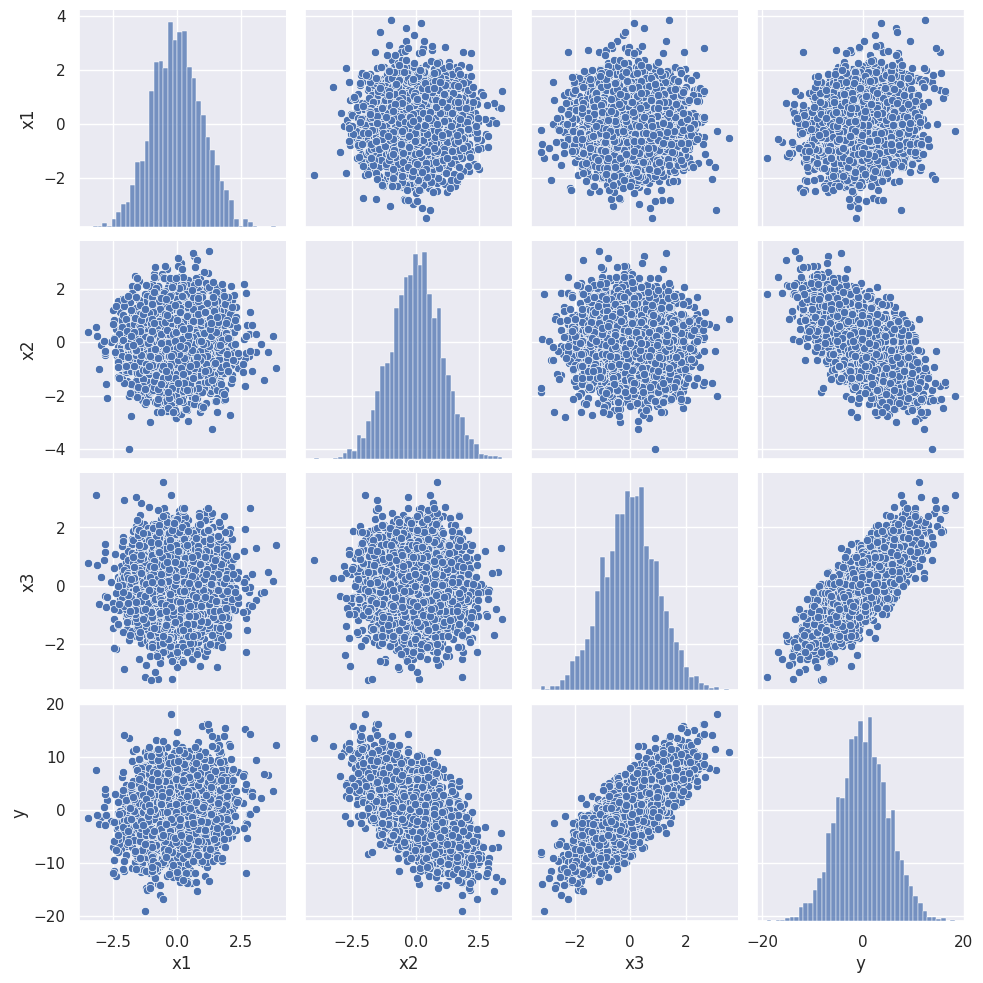

In [4]:
sns.pairplot(df)

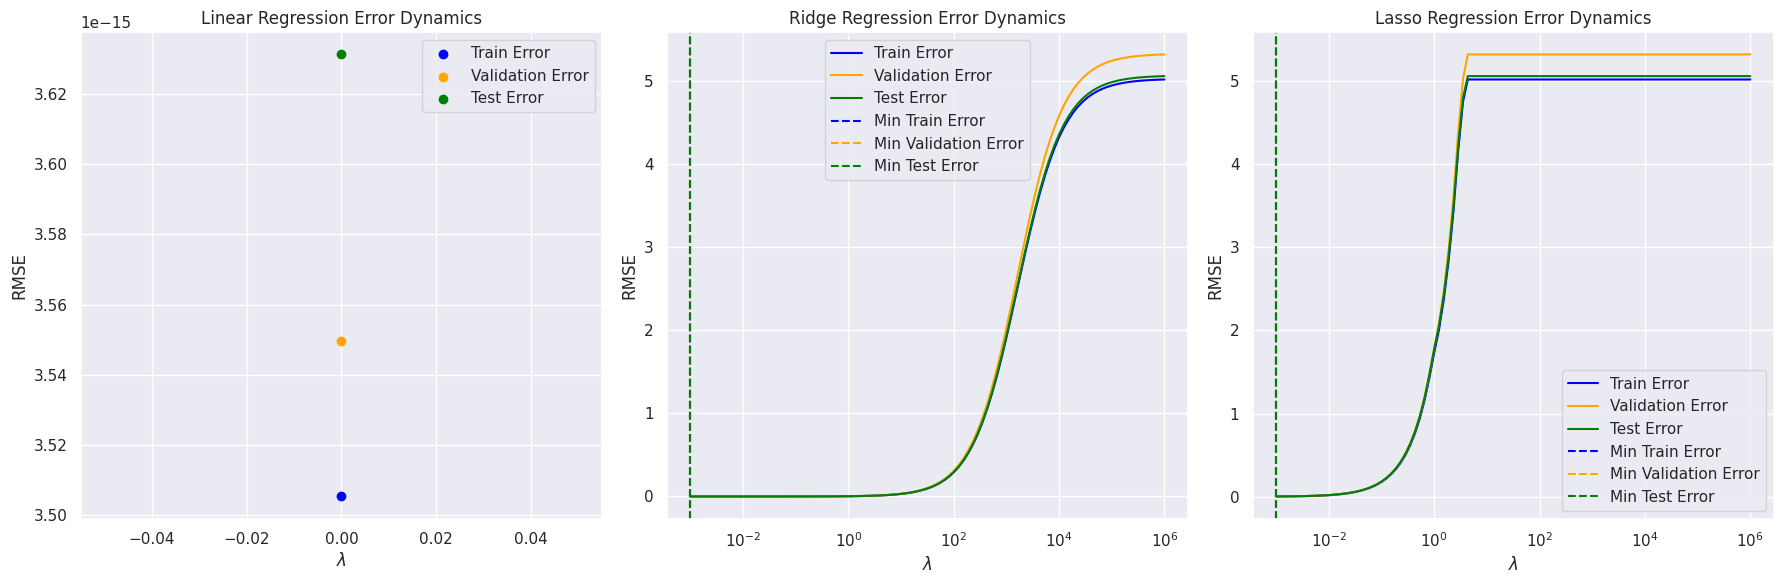

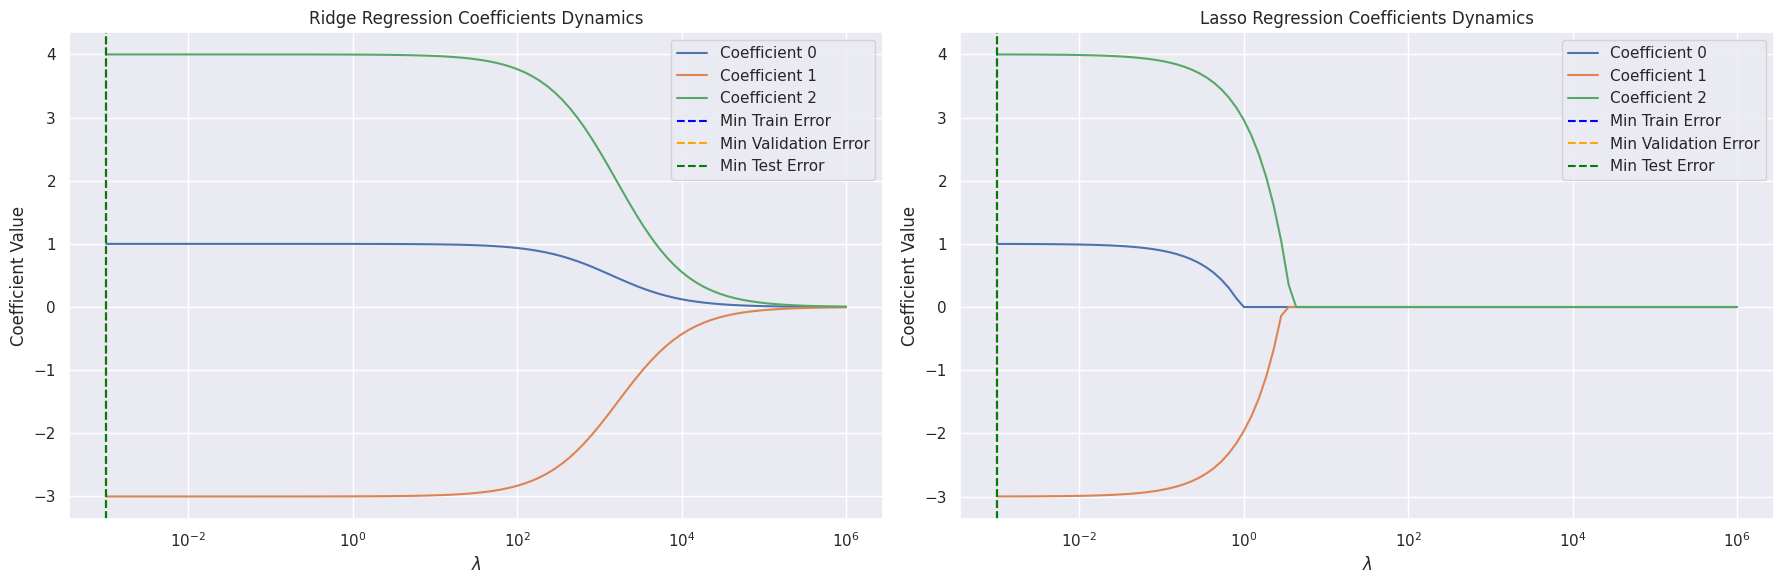

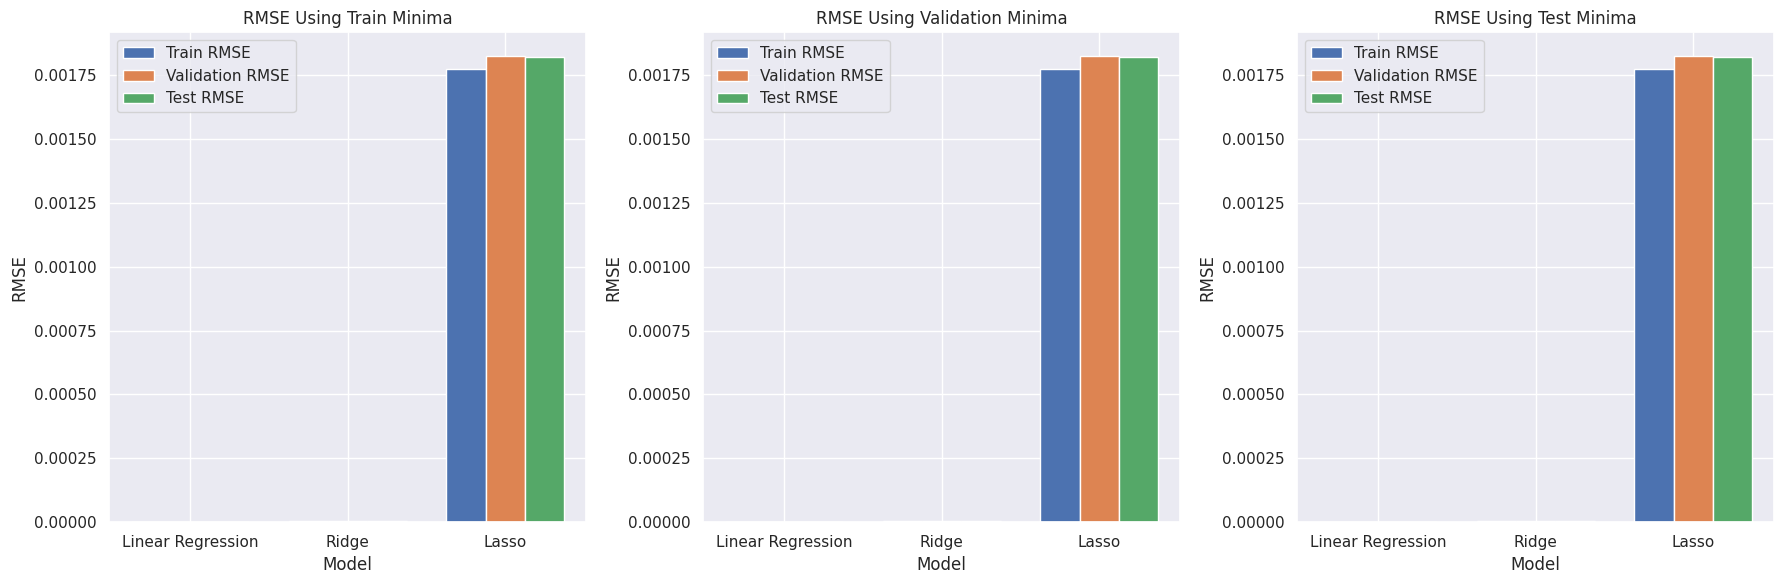


--- Summary of Errors at Minima ---


Model         Minimizing Lambda    Train RMSE  Validation RMSE  \
0  Linear Regression                N/A    N/A  3.505405e-15     3.549695e-15   
1              Ridge       Train Minima  0.001  3.083650e-06     3.267065e-06   
2              Ridge  Validation Minima  0.001  3.083650e-06     3.267065e-06   
3              Ridge        Test Minima  0.001  3.083650e-06     3.267065e-06   
4              Lasso       Train Minima  0.001  1.772652e-03     1.825334e-03   
5              Lasso  Validation Minima  0.001  1.772652e-03     1.825334e-03   
6              Lasso        Test Minima  0.001  1.772652e-03     1.825334e-03   

      Test RMSE  
0  3.631140e-15  
1  3.110791e-06  
2  3.110791e-06  
3  3.110791e-06  
4  1.821172e-03  
5  1.821172e-03  
6  1.821172e-03

In [37]:
summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


### Con error/incertidumbre

$y = x_1 - 3x_2 + 4x_3 + \epsilon$

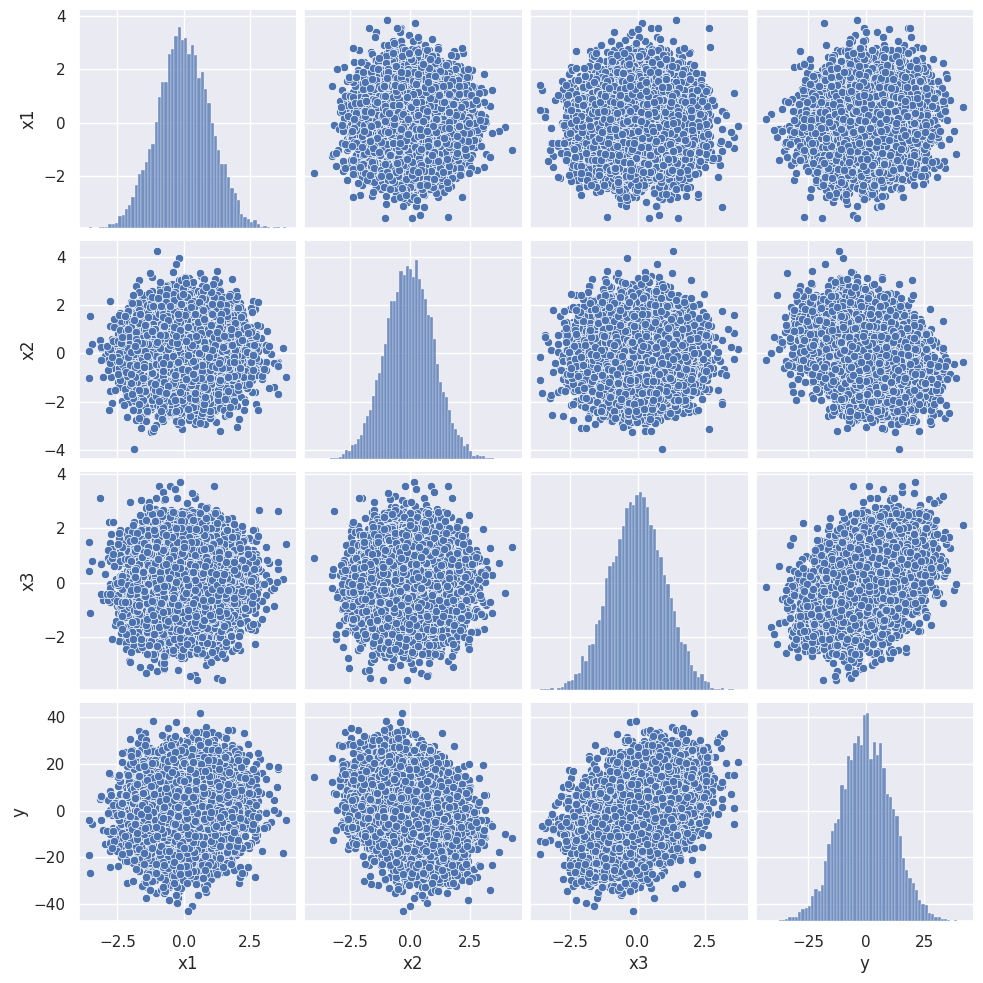

In [38]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000

# Matriz de Diseño
X = np.random.normal(size=(N,3))
eps = np.random.normal(0,10, size=(N,1))

# Simulacion de Y
Y = np.matmul(X,np.array([1,-3,4])).reshape((N,1)) + eps
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1','x2','x3'])
df['y'] = Y
sns.pairplot(df)

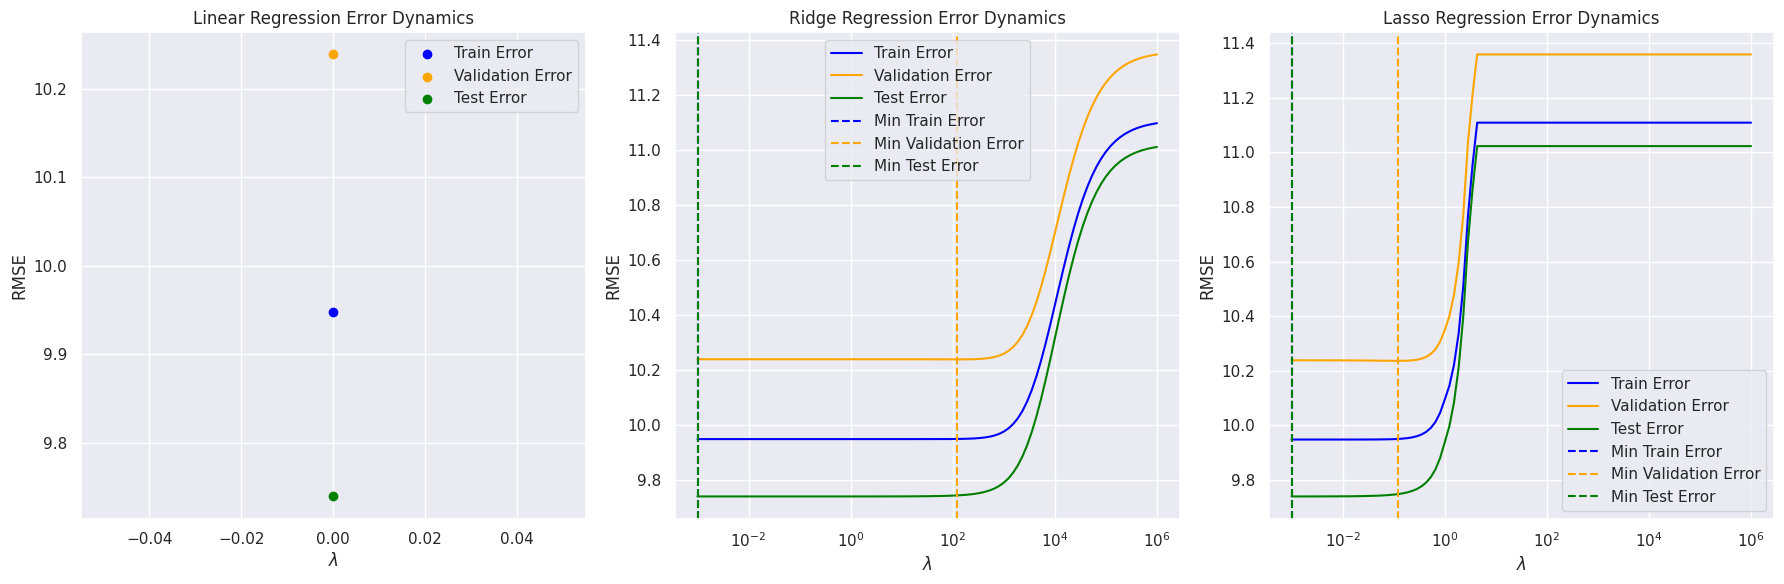

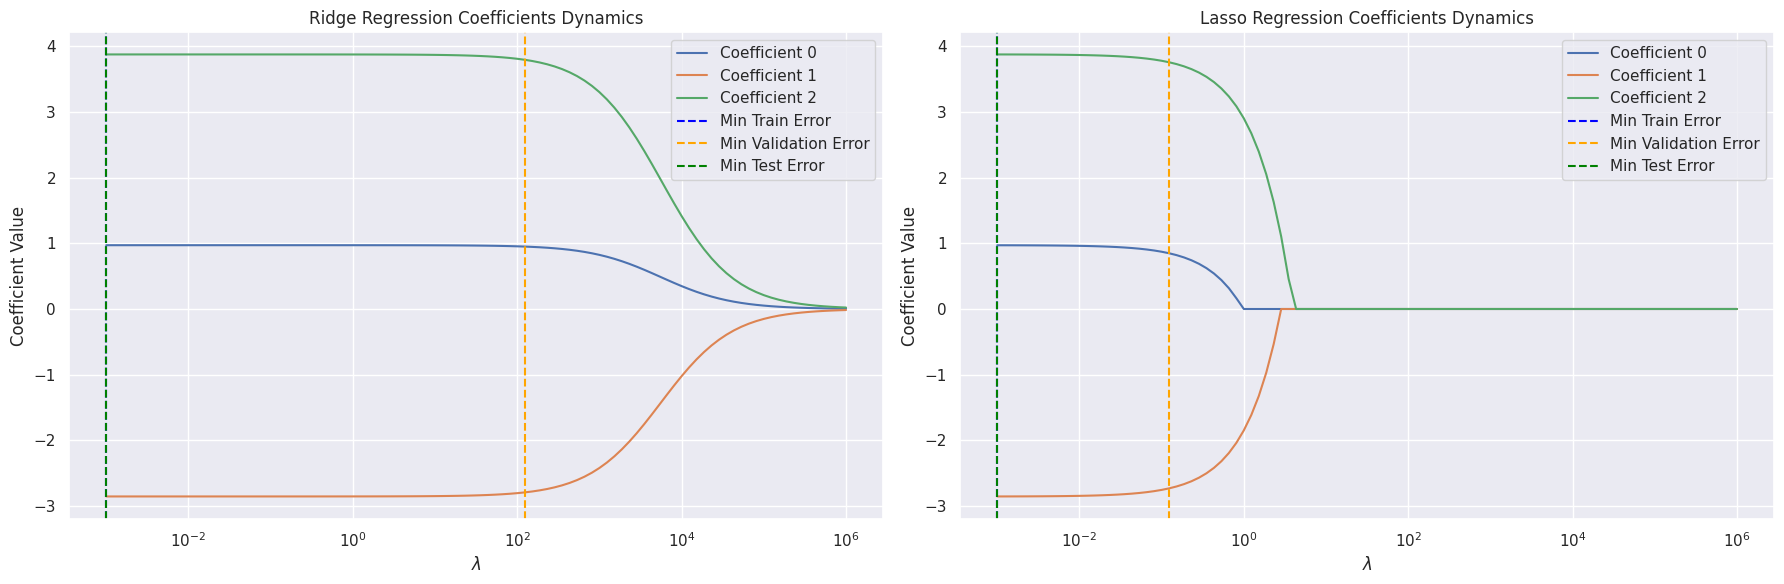

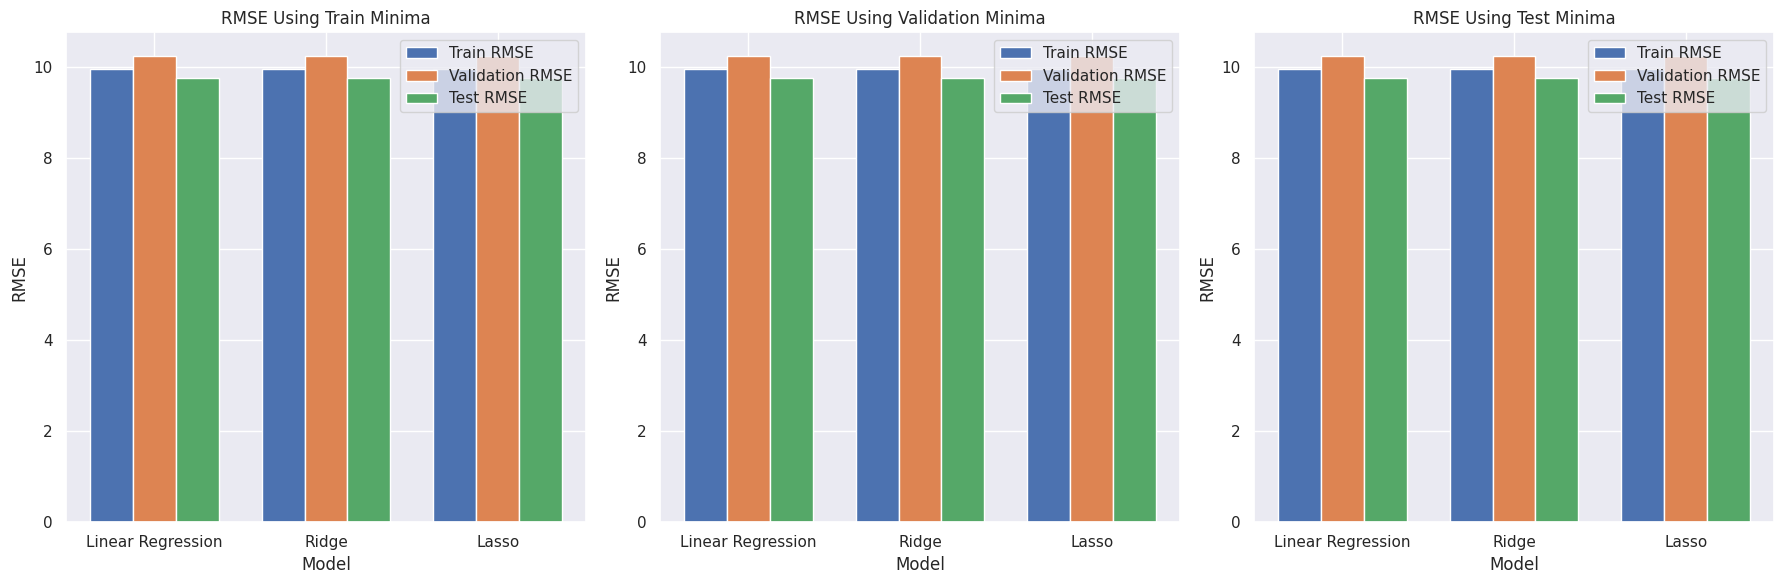


--- Summary of Errors at Minima ---


Model         Minimizing      Lambda  Train RMSE  \
0  Linear Regression                N/A         N/A    9.947976   
1              Ridge       Train Minima       0.001    9.947976   
2              Ridge  Validation Minima  123.284674    9.948530   
3              Ridge        Test Minima       0.001    9.947976   
4              Lasso       Train Minima       0.001    9.947976   
5              Lasso  Validation Minima    0.123285    9.950248   
6              Lasso        Test Minima       0.001    9.947976   

   Validation RMSE  Test RMSE  
0        10.238480   9.739343  
1        10.238480   9.739343  
2        10.237993   9.743192  
3        10.238480   9.739343  
4        10.238445   9.739397  
5        10.236382   9.748204  
6        10.238445   9.739397

In [39]:
summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


## Modelos no Lineales

### Sin error/incertidumbre

y = $ \frac{1}{x}$

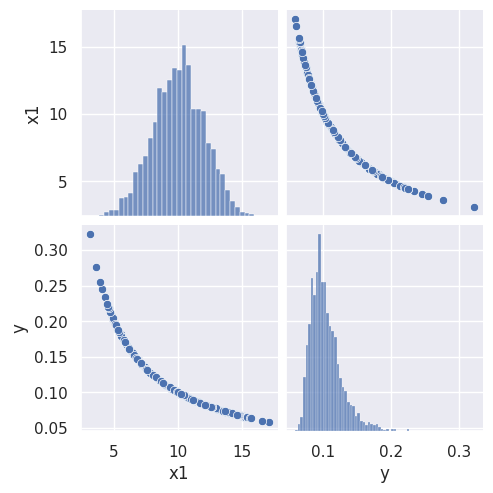

In [40]:
sns.set(rc={'figure.figsize':(16,6)})
# Semilla para replicacion de resultados
np.random.seed(589)
N = 3000
# Matriz de Diseño
X = np.random.normal(10,2,size=(N,1))
# Simulacion de Y
Y = 1/X 
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

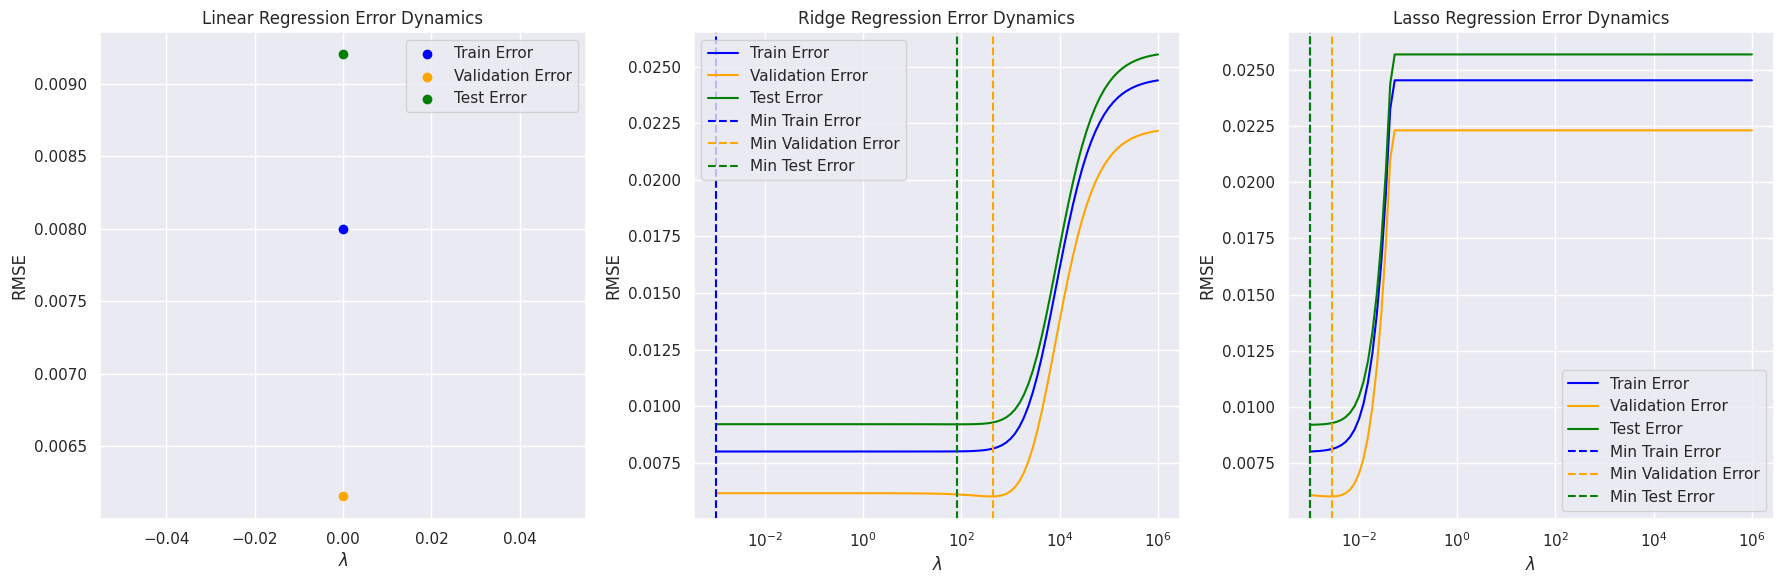

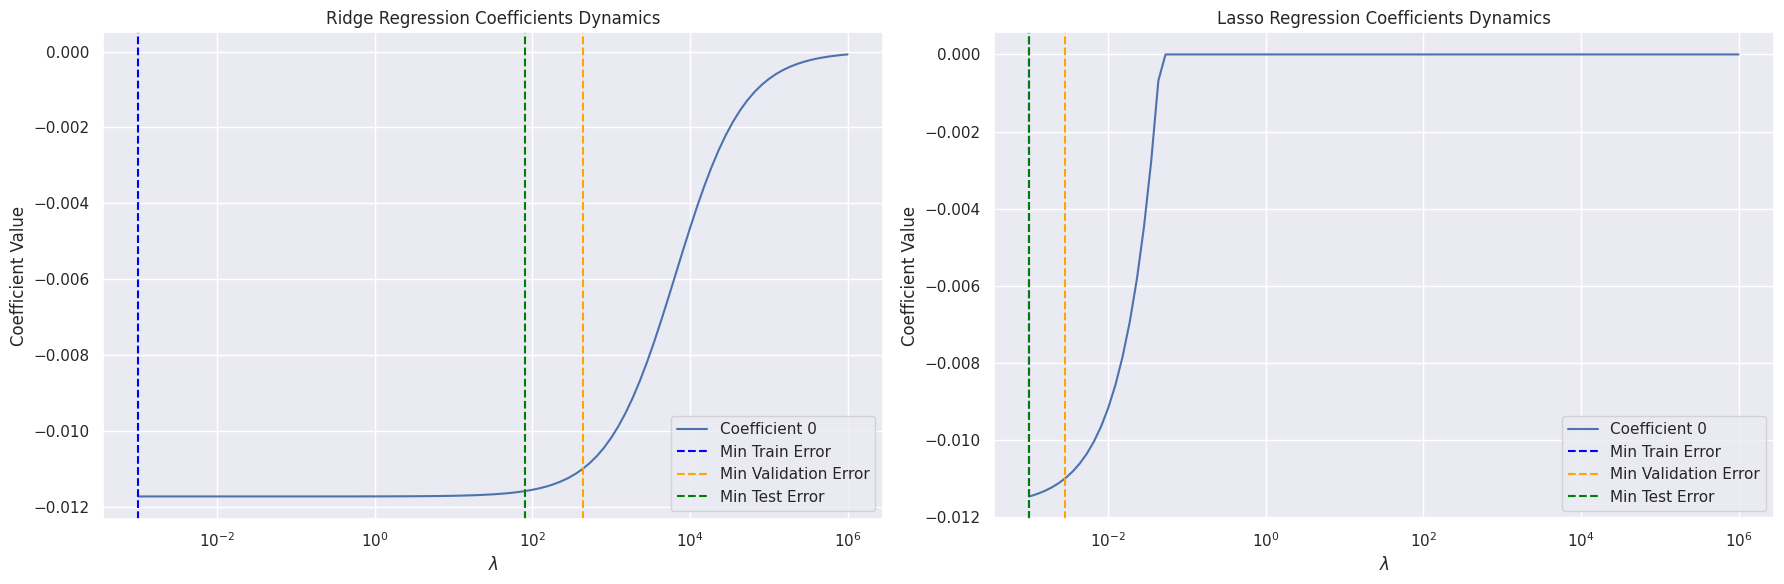

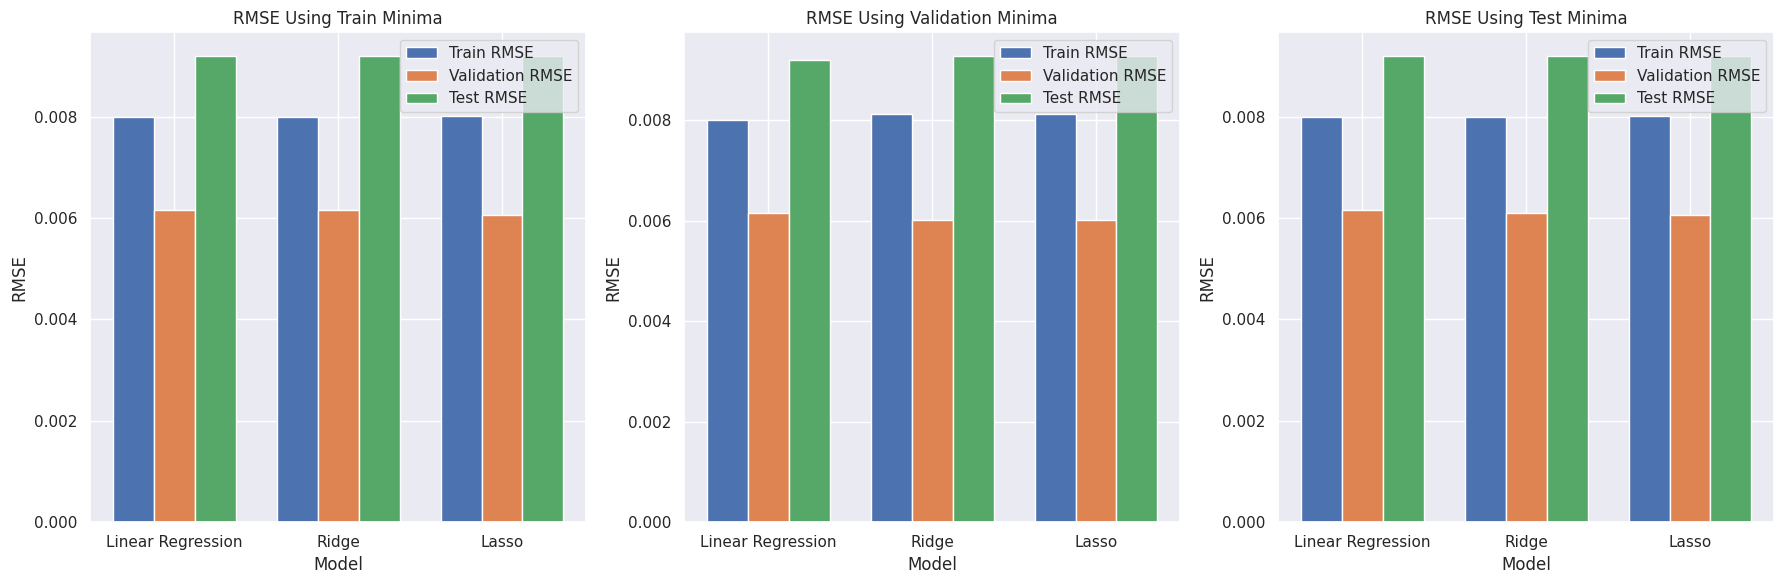


--- Summary of Errors at Minima ---


Model         Minimizing      Lambda  Train RMSE  \
0  Linear Regression                N/A         N/A    0.007997   
1              Ridge       Train Minima       0.001    0.007997   
2              Ridge  Validation Minima  432.876128    0.008124   
3              Ridge        Test Minima   81.113083    0.008002   
4              Lasso       Train Minima       0.001    0.008013   
5              Lasso  Validation Minima    0.002848    0.008125   
6              Lasso        Test Minima       0.001    0.008013   

   Validation RMSE  Test RMSE  
0         0.006155   0.009203  
1         0.006155   0.009203  
2         0.006011   0.009278  
3         0.006101   0.009199  
4         0.006067   0.009202  
5         0.006011   0.009279  
6         0.006067   0.009202

In [41]:
summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


Parece que no esta aproximando bien. **Usemos transformaciones polinomiales de X** (nuestras features o matriz de disenno) para mejorar la prediccion.

Creacion de variable X^1.5
Creacion de variable X^1.3333333333333333
Creacion de variable X^1.25
Creacion de variable X^1.2
Creacion de variable X^1.1666666666666667
Creacion de variable X^1.1428571428571428
Creacion de variable X^1.125
Creacion de variable X^1.1111111111111112


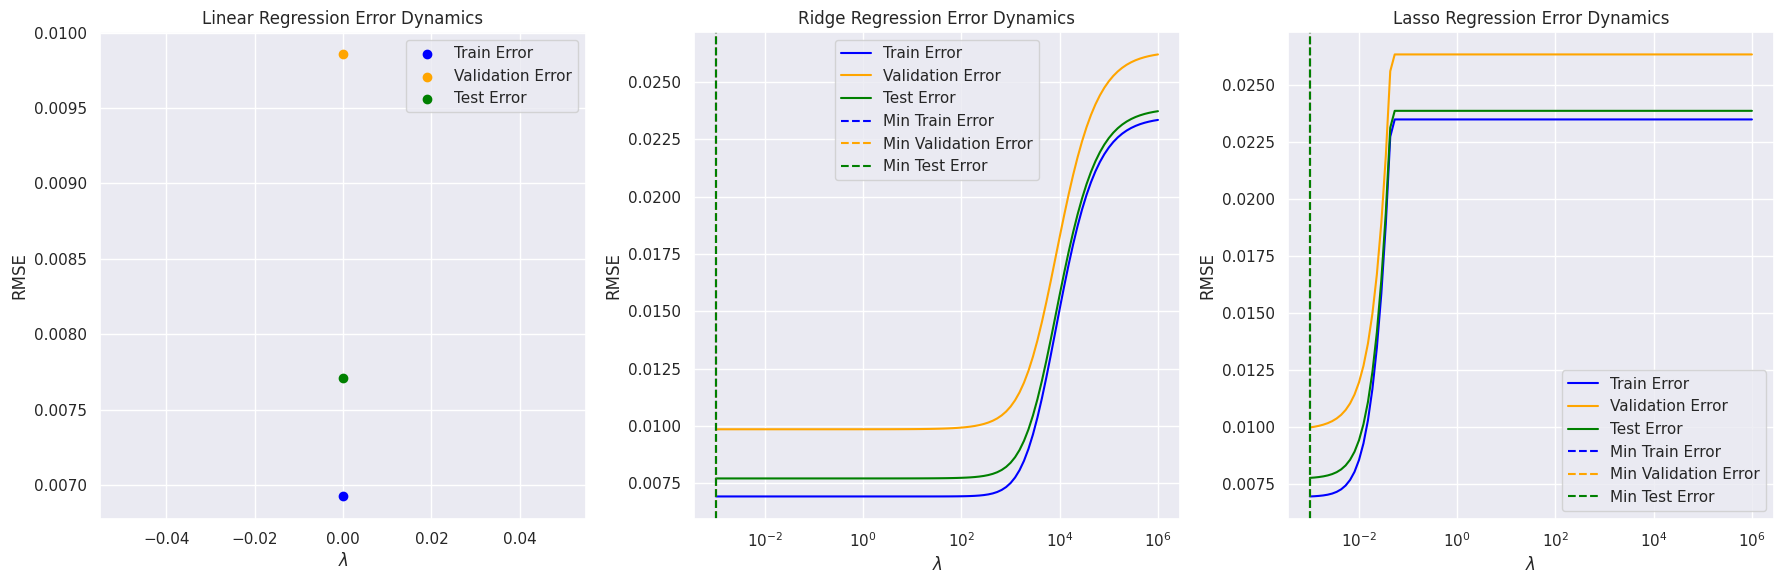

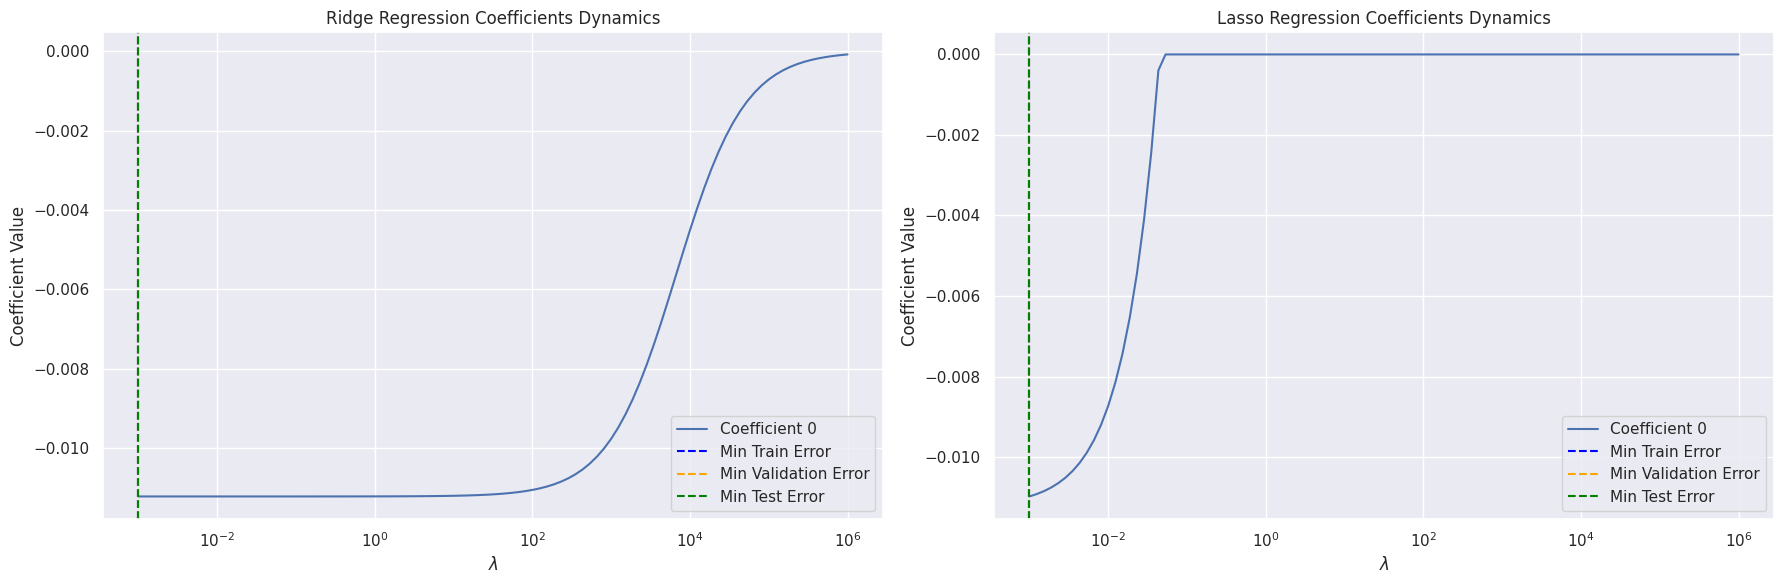

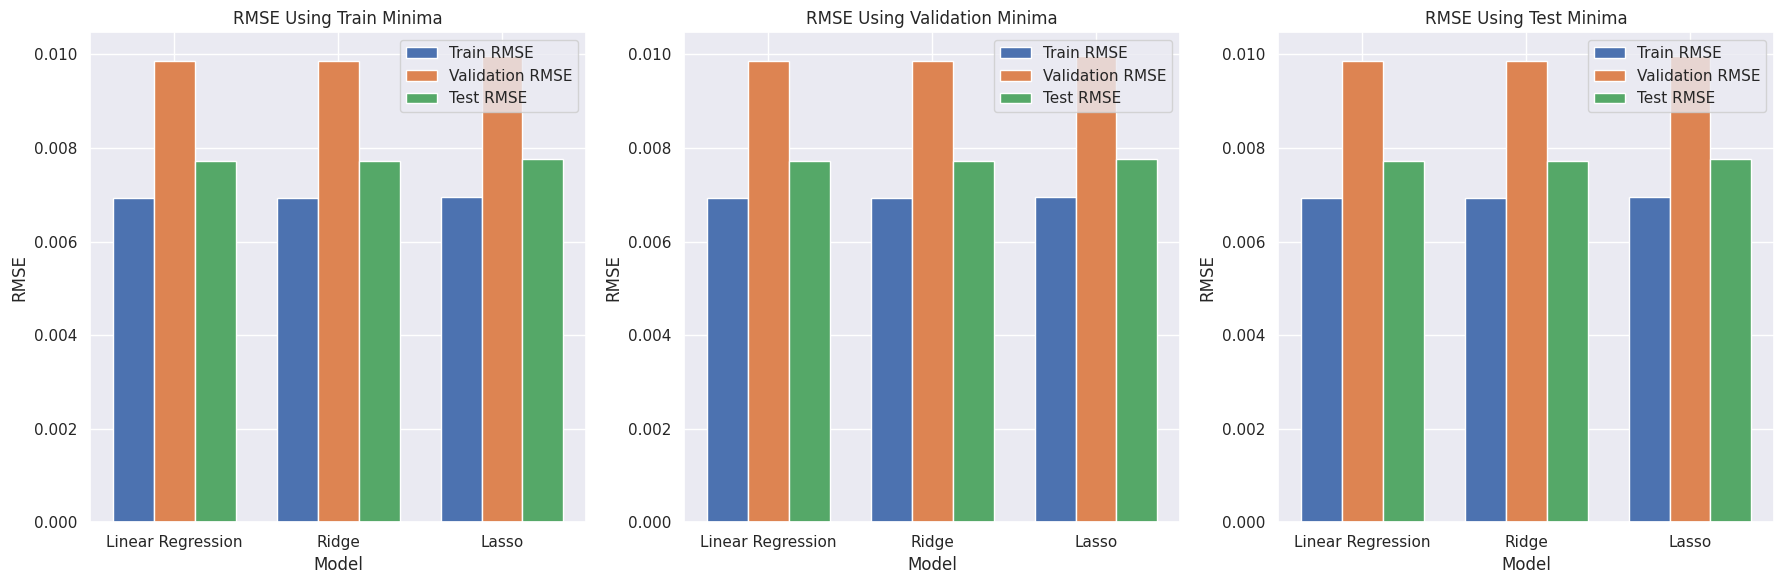


--- Summary of Errors at Minima ---


Model         Minimizing Lambda  Train RMSE  Validation RMSE  \
0  Linear Regression                N/A    N/A    0.006926         0.009855   
1              Ridge       Train Minima  0.001    0.006926         0.009855   
2              Ridge  Validation Minima  0.001    0.006926         0.009855   
3              Ridge        Test Minima  0.001    0.006926         0.009855   
4              Lasso       Train Minima  0.001    0.006944         0.009972   
5              Lasso  Validation Minima  0.001    0.006944         0.009972   
6              Lasso        Test Minima  0.001    0.006944         0.009972   

   Test RMSE  
0   0.007711  
1   0.007711  
2   0.007711  
3   0.007711  
4   0.007758  
5   0.007758  
6   0.007758

In [42]:
X2 = X.copy()

# ## Feature Eng
X2 = np.reshape(X2, (N,1))
# Crea un Polinomio
for n in range(2,10):
    X2 = np.concatenate((X2,np.power(X2[:,0],1+1/n).reshape((N,1))), axis=1)
    print(f'Creacion de variable X^{1+1/n}')

summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


Podemos ver que nuestro error de prediccion mejora comparado con no hacer ninguna ingenieria de variables.

Ahora salgamonos del mundo polinomial y creemos una transformacion perfecta de nuestras variables X para predecir. Esto requiere que nos salgamos del mundo del teorema de `stone-weistrass`

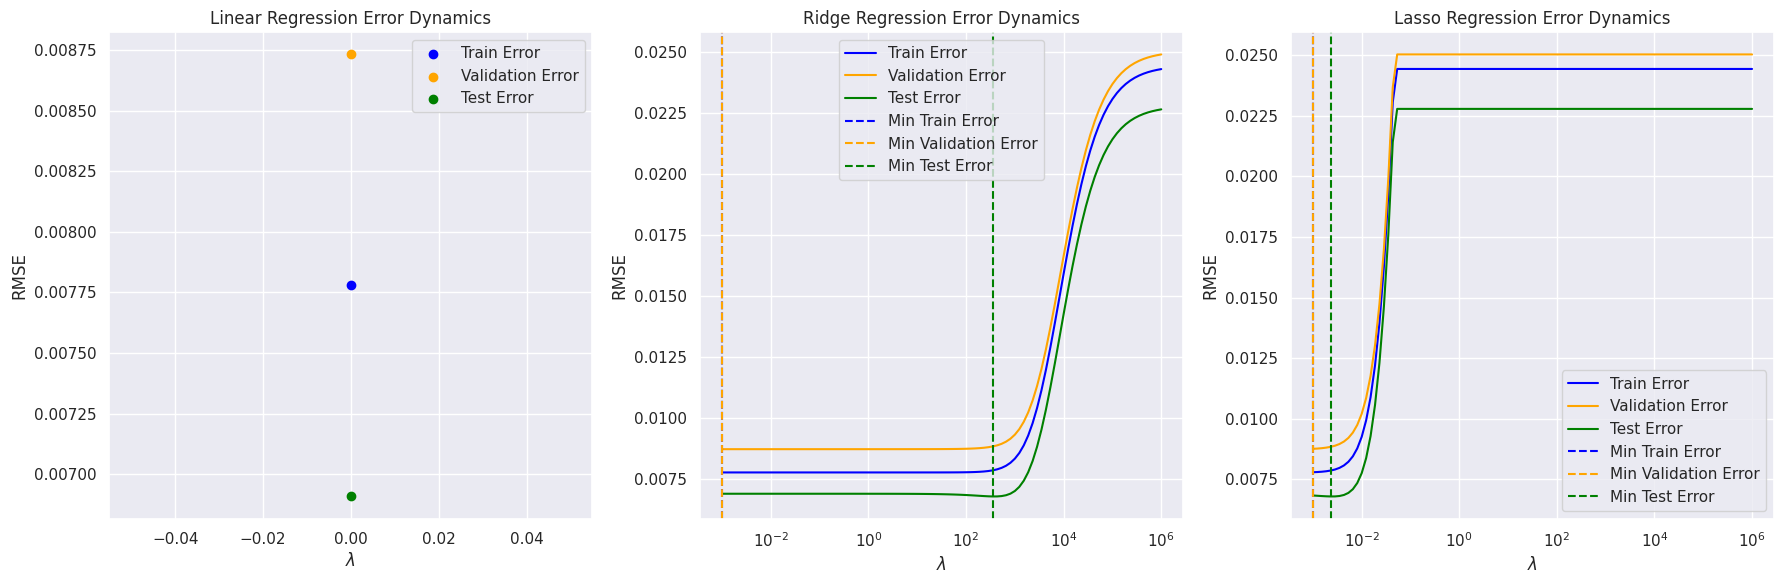

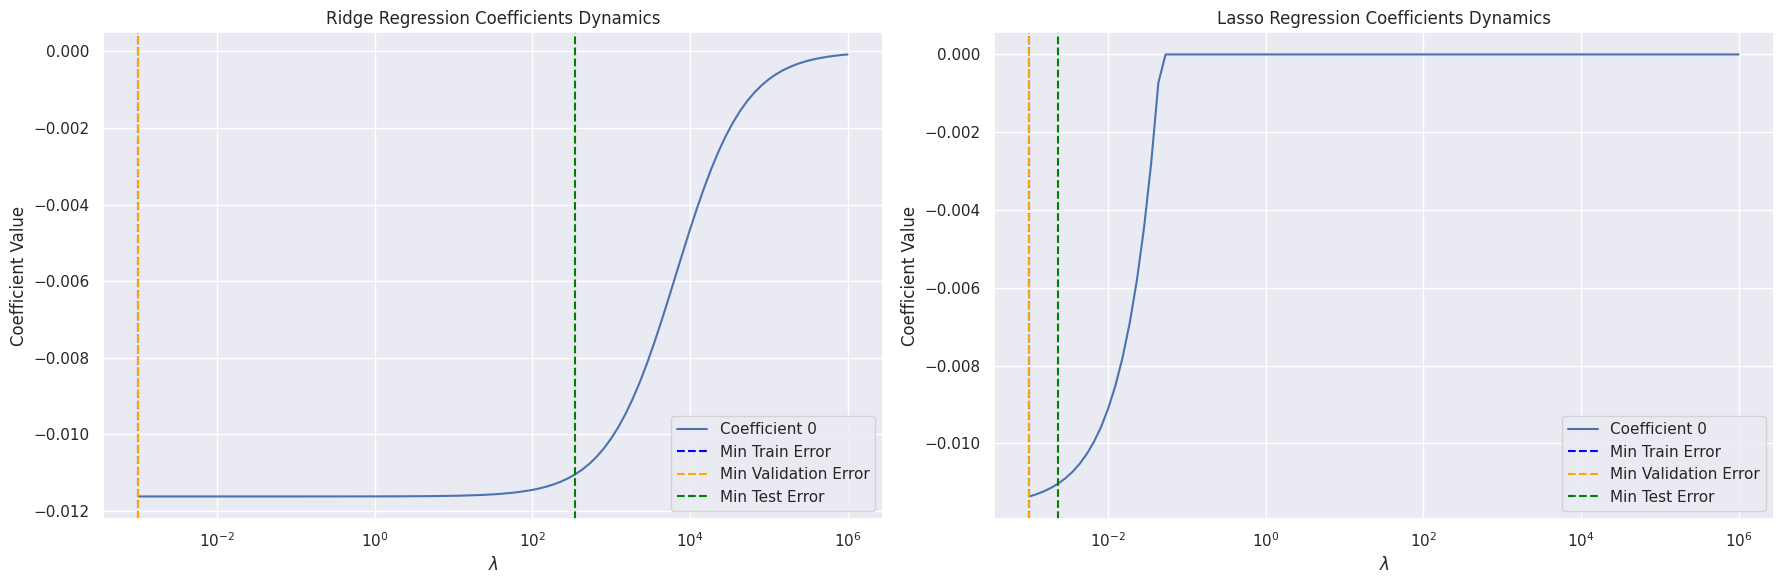

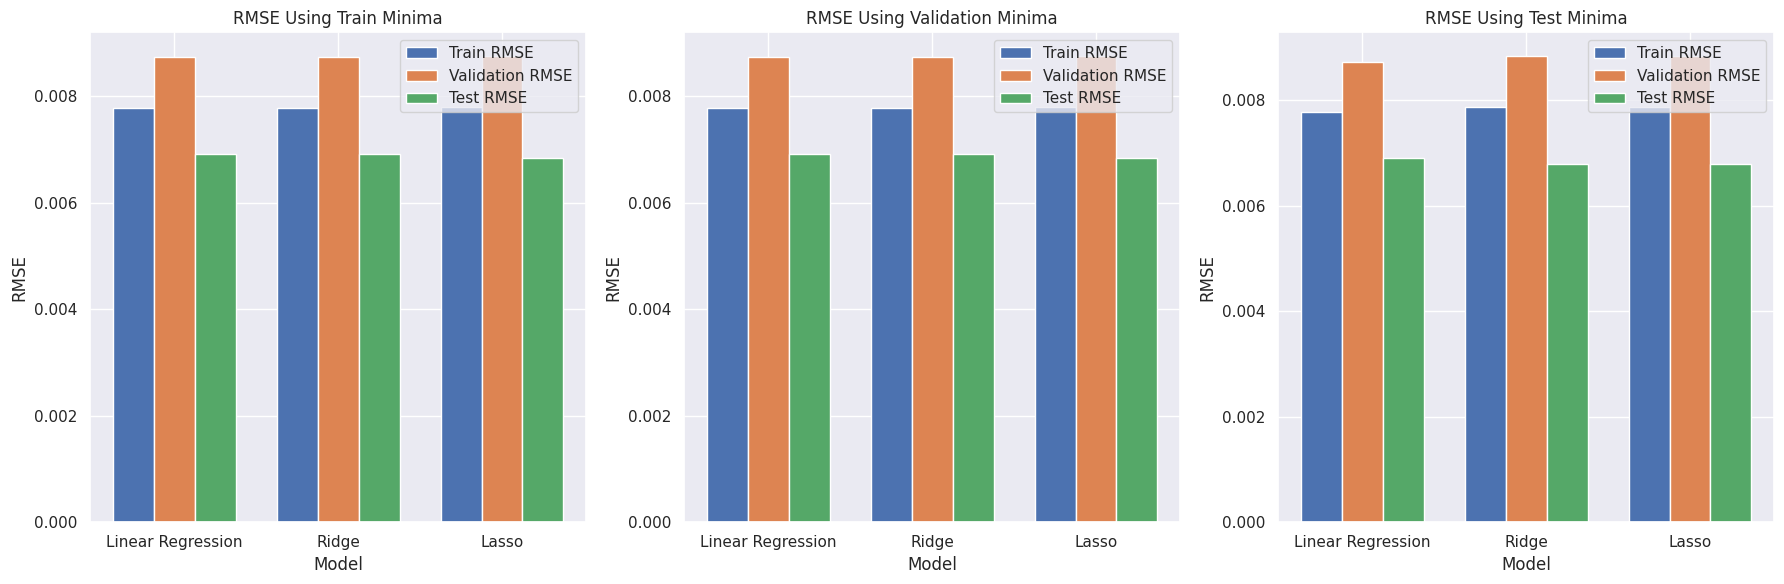


--- Summary of Errors at Minima ---


Model         Minimizing      Lambda  Train RMSE  \
0  Linear Regression                N/A         N/A    0.007780   
1              Ridge       Train Minima       0.001    0.007780   
2              Ridge  Validation Minima       0.001    0.007780   
3              Ridge        Test Minima  351.119173    0.007866   
4              Lasso       Train Minima       0.001    0.007796   
5              Lasso  Validation Minima       0.001    0.007796   
6              Lasso        Test Minima     0.00231    0.007866   

   Validation RMSE  Test RMSE  
0         0.008732   0.006908  
1         0.008732   0.006908  
2         0.008732   0.006908  
3         0.008844   0.006797  
4         0.008762   0.006837  
5         0.008762   0.006837  
6         0.008844   0.006797

In [11]:
X3 = X.copy()
# ## Feature Eng
X3 = 1/X3
summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


Ahora creemos una funcion mas compleja. En la funcion anterior se veia claramente una relacion de tipo $1/x$ al graficar, pero esto no es comun en el mundo real donde tenemos decenas, cientos, miles o millones de variables que afectan a $Y$. No es facil graficar una o dos variables a la vez para ver como afectan a $Y$, ademas de que puede haber efectos cruzados/combinados. Por ello tratemos de crear una funcion compleja en la cual sea dificil adivinar la relacion exacta entre $Y$ y $X$, la idea es que sea dificil de adivinar y tengamos que recurrir a ingenieria de variables no tan perfecta o educada.

$y = x + ln(x) + xln(x) + 1/x + x^{1.3}$

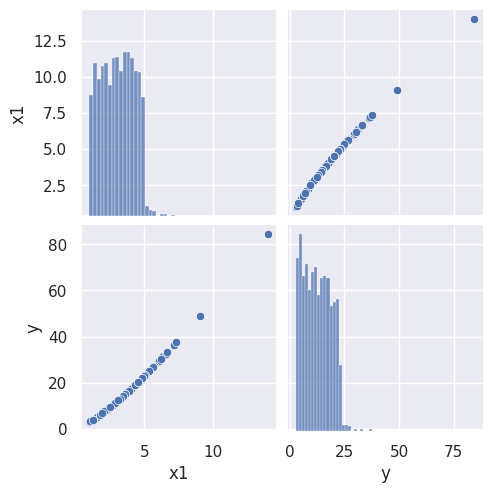

In [12]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 3000
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))/100

# Generar Y
Y = X + np.log(X) + X*np.log(X) + 1/X + np.power(X,1.3)
Y = Y.reshape(-1)


df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

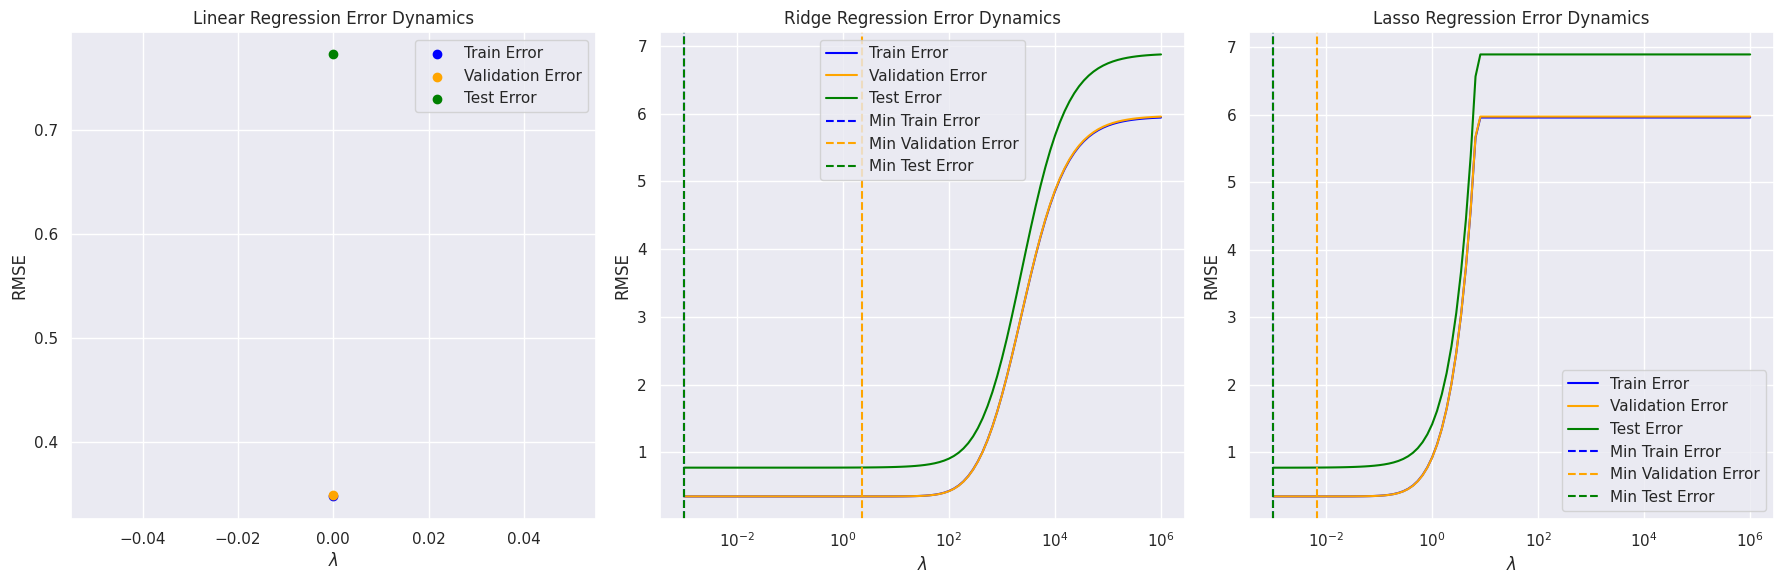

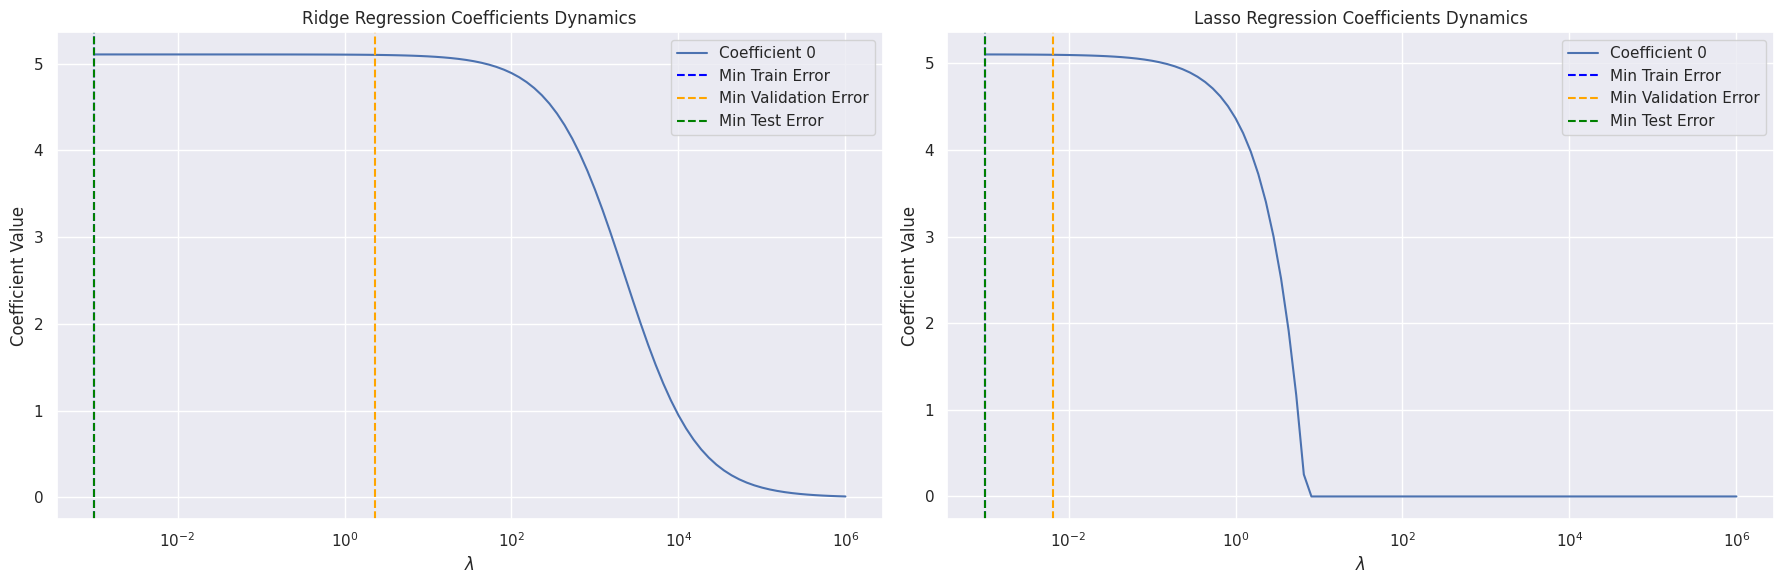

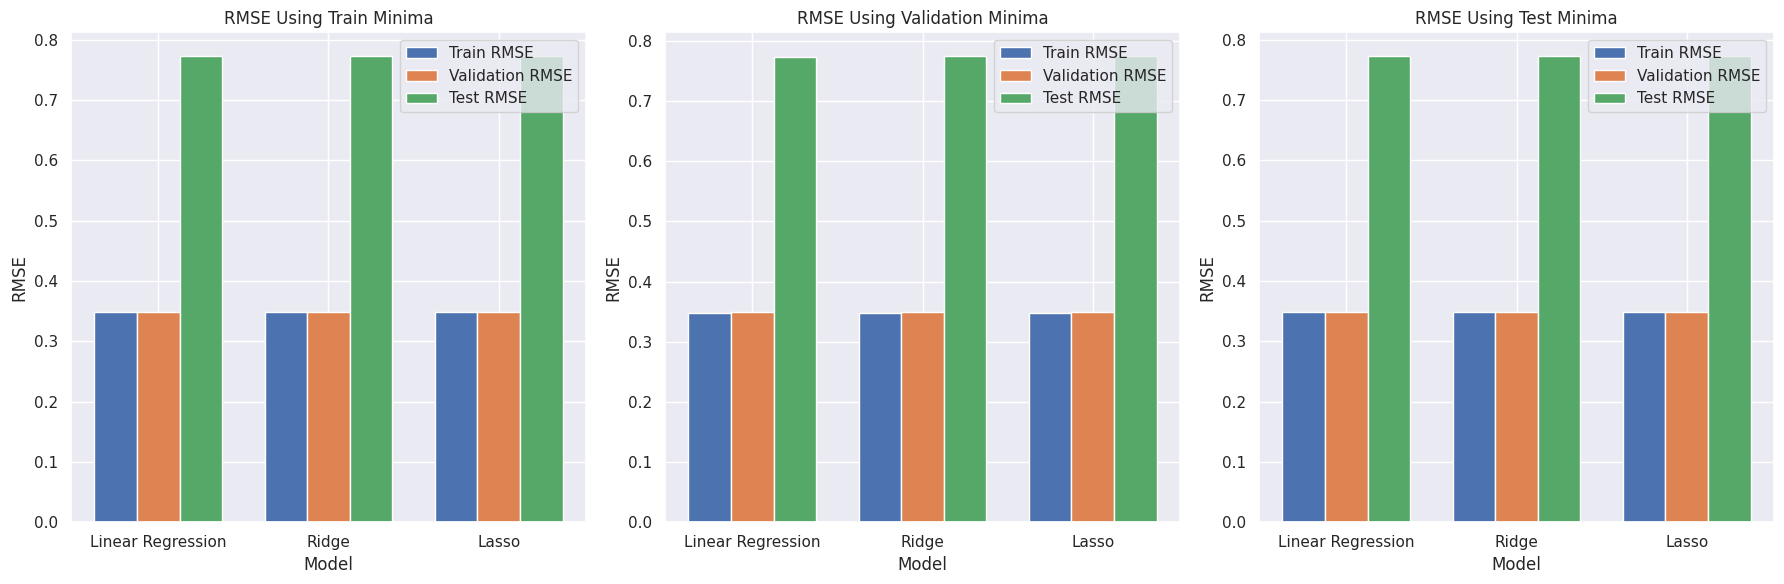


--- Summary of Errors at Minima ---


Model         Minimizing    Lambda  Train RMSE  \
0  Linear Regression                N/A       N/A    0.347874   
1              Ridge       Train Minima     0.001    0.347874   
2              Ridge  Validation Minima   2.31013    0.347926   
3              Ridge        Test Minima     0.001    0.347874   
4              Lasso       Train Minima     0.001    0.347875   
5              Lasso  Validation Minima  0.006579    0.347919   
6              Lasso        Test Minima     0.001    0.347875   

   Validation RMSE  Test RMSE  
0         0.348846   0.773054  
1         0.348846   0.773055  
2         0.348794   0.775385  
3         0.348846   0.773055  
4         0.348832   0.773383  
5         0.348794   0.775240  
6         0.348832   0.773383

In [13]:
summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


Creacion de variable X^[2, 3, 4, 5]


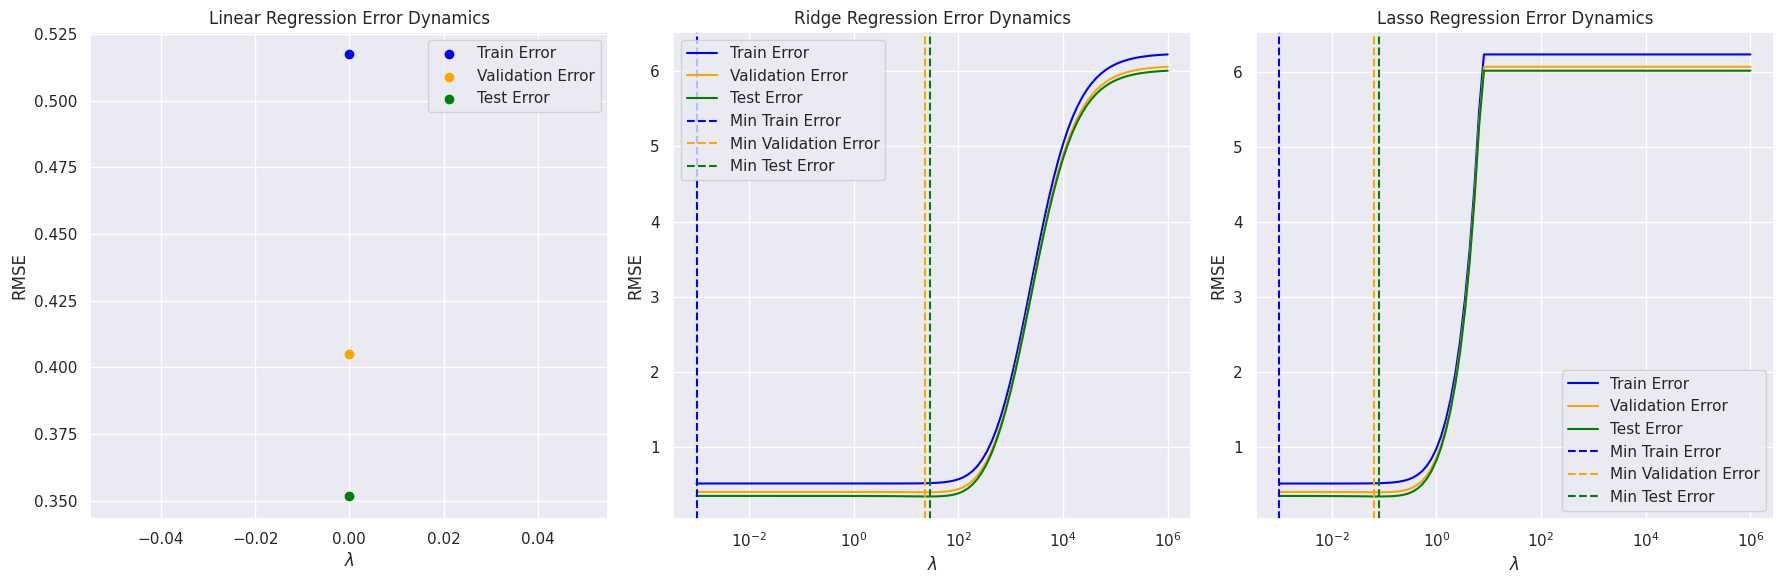

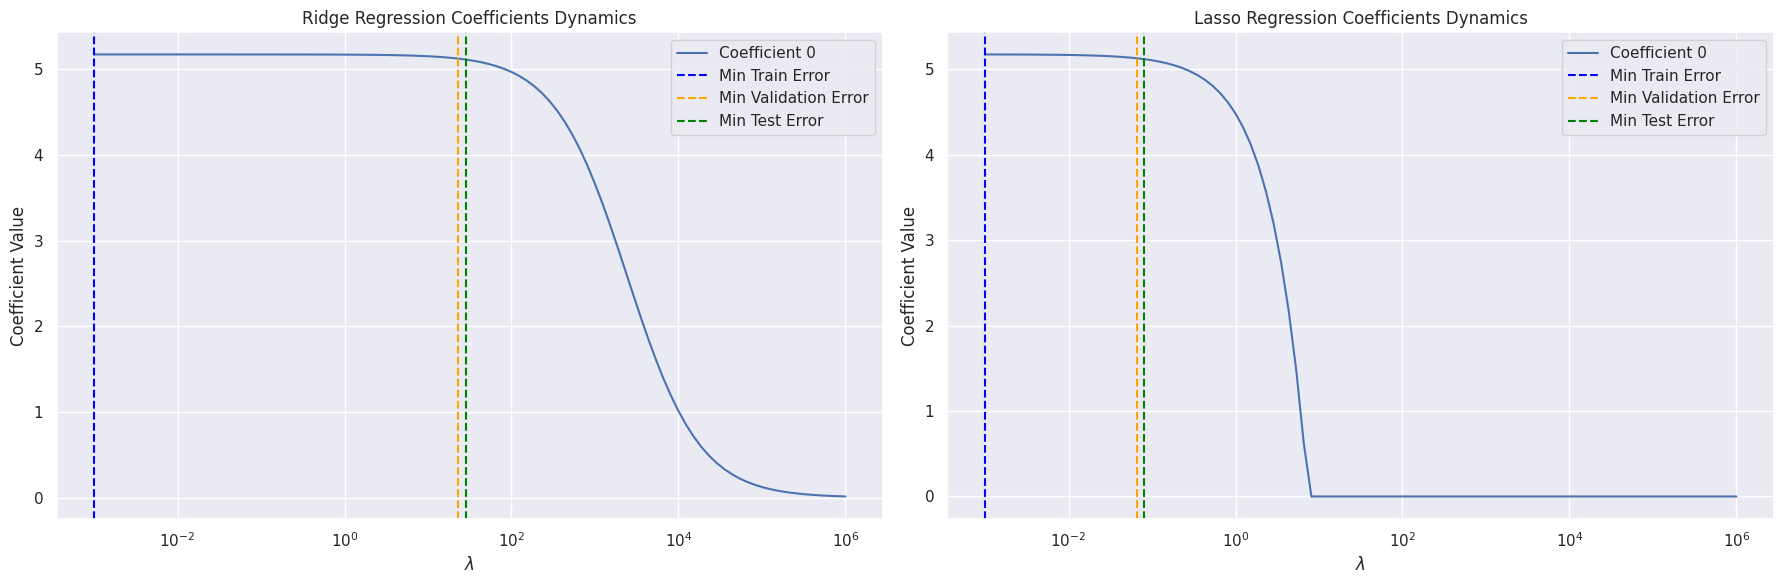

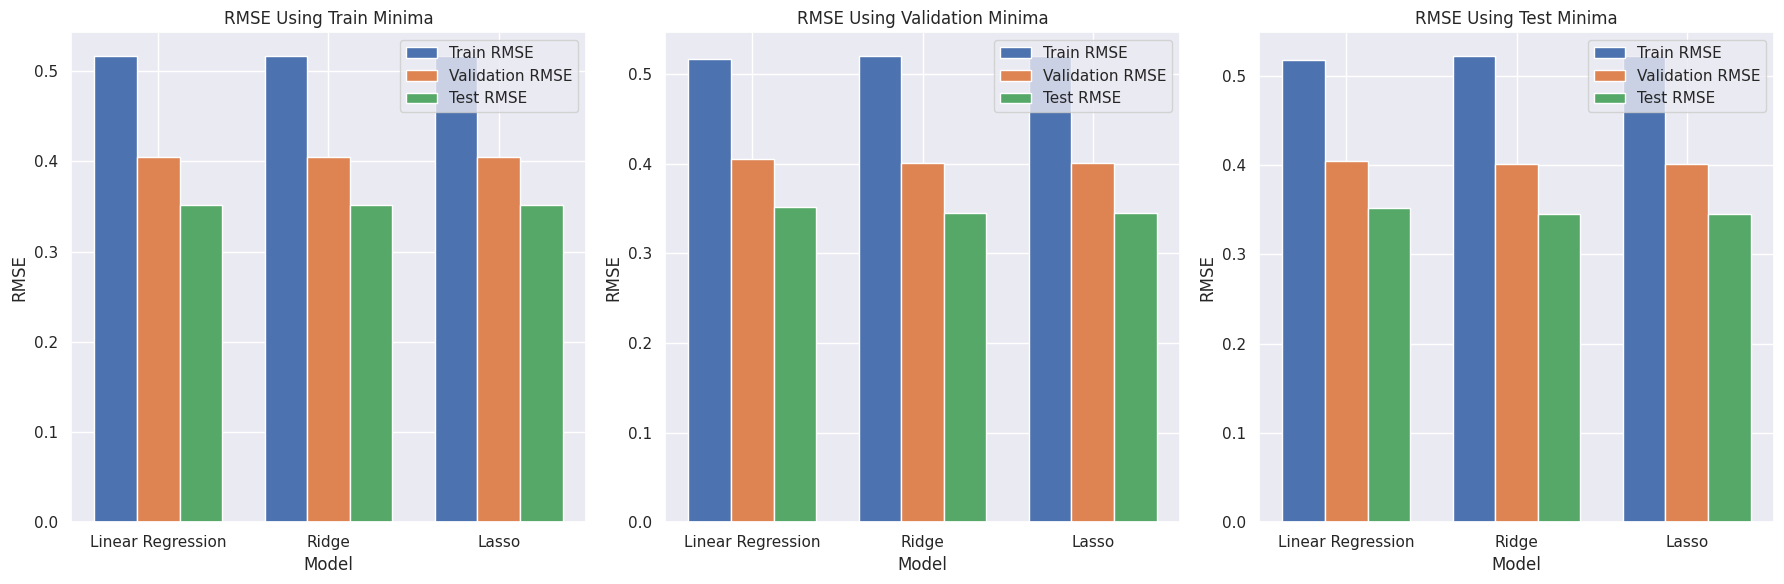


--- Summary of Errors at Minima ---


Model         Minimizing     Lambda  Train RMSE  \
0  Linear Regression                N/A        N/A    0.517333   
1              Ridge       Train Minima      0.001    0.517333   
2              Ridge  Validation Minima  23.101297    0.520649   
3              Ridge        Test Minima  28.480359    0.522343   
4              Lasso       Train Minima      0.001    0.517334   
5              Lasso  Validation Minima   0.065793    0.520223   
6              Lasso        Test Minima   0.081113    0.521719   

   Validation RMSE  Test RMSE  
0         0.404960   0.351546  
1         0.404959   0.351545  
2         0.400891   0.345157  
3         0.401127   0.345023  
4         0.404845   0.351390  
5         0.400905   0.345290  
6         0.400996   0.345012

In [14]:
#Ingenieria de Variables
X2 = np.reshape(X, (N,1))
# Lista para guardar exponentes del polinomio.
power = [1 + n for n in range(1,5)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)

print(f'Creacion de variable X^{power}')

summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


Vemos que la prediccion es decente con el polinomio, parece que es bastante bueno, pero veamos que pasa con funciones ams complejas como las periodicas.

## Funciones Periodicas

$ y = sin(x) $

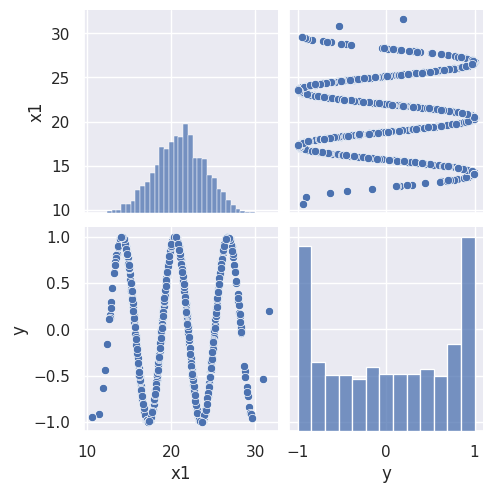

In [15]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 3000
# Generar Xs
#X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))
X = np.random.normal(1,3,size=(N,1)) + 20
# Generar Y
Y = np.sin(X)
Y = Y.reshape(-1)

#Ingenieria de Variables
X = np.reshape(X, (N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

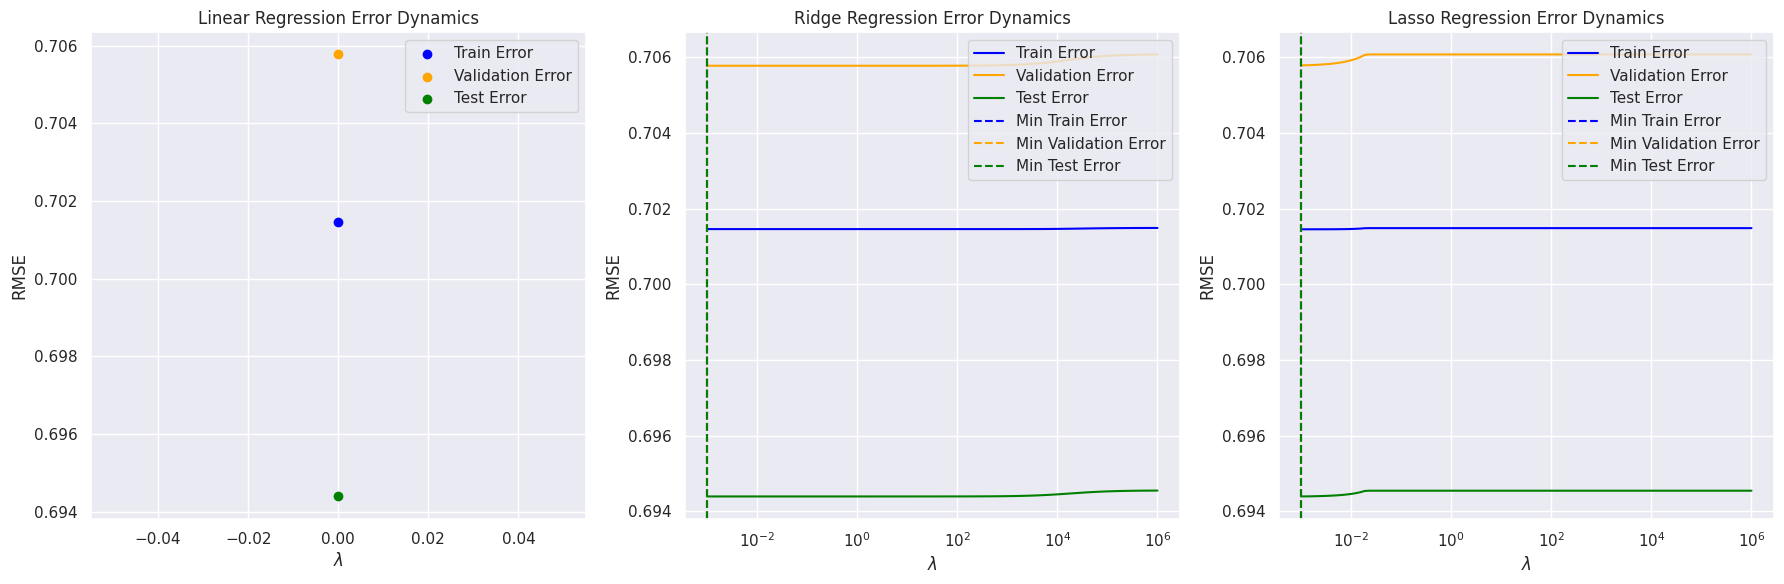

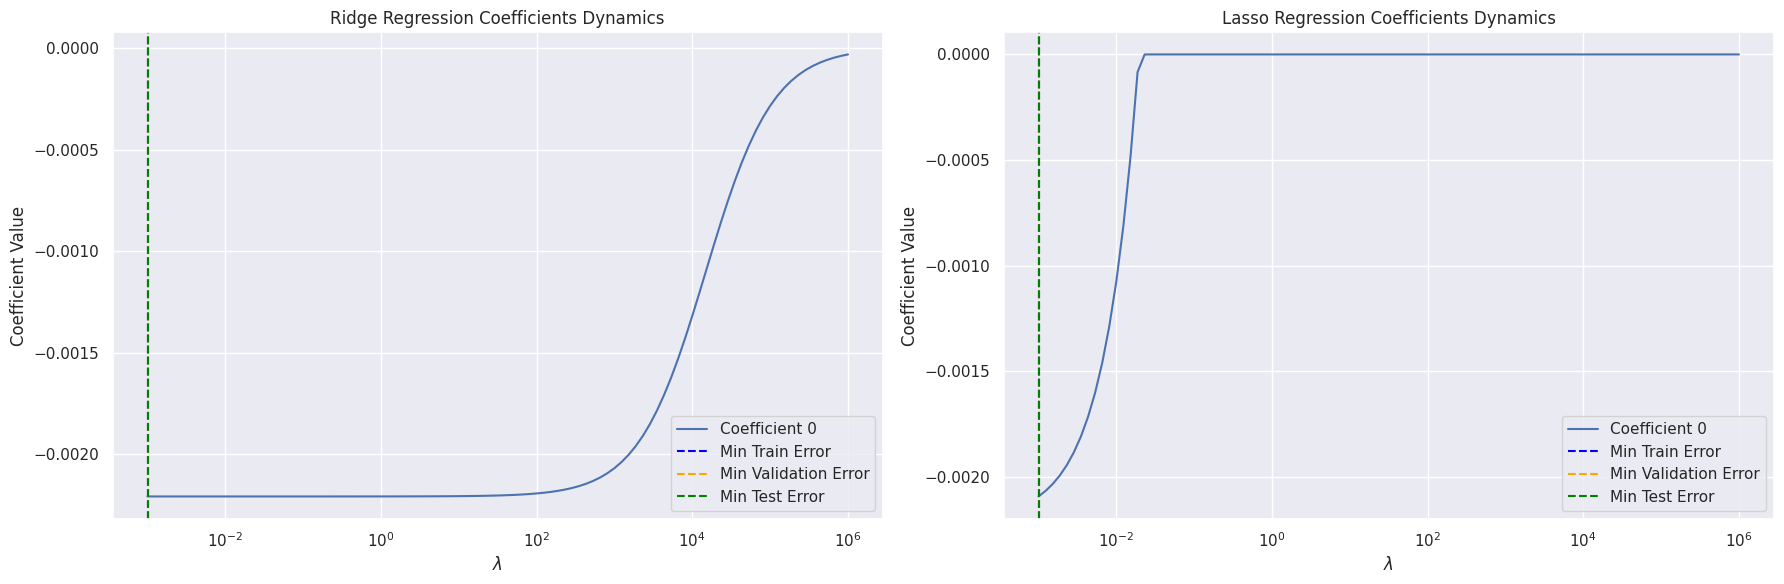

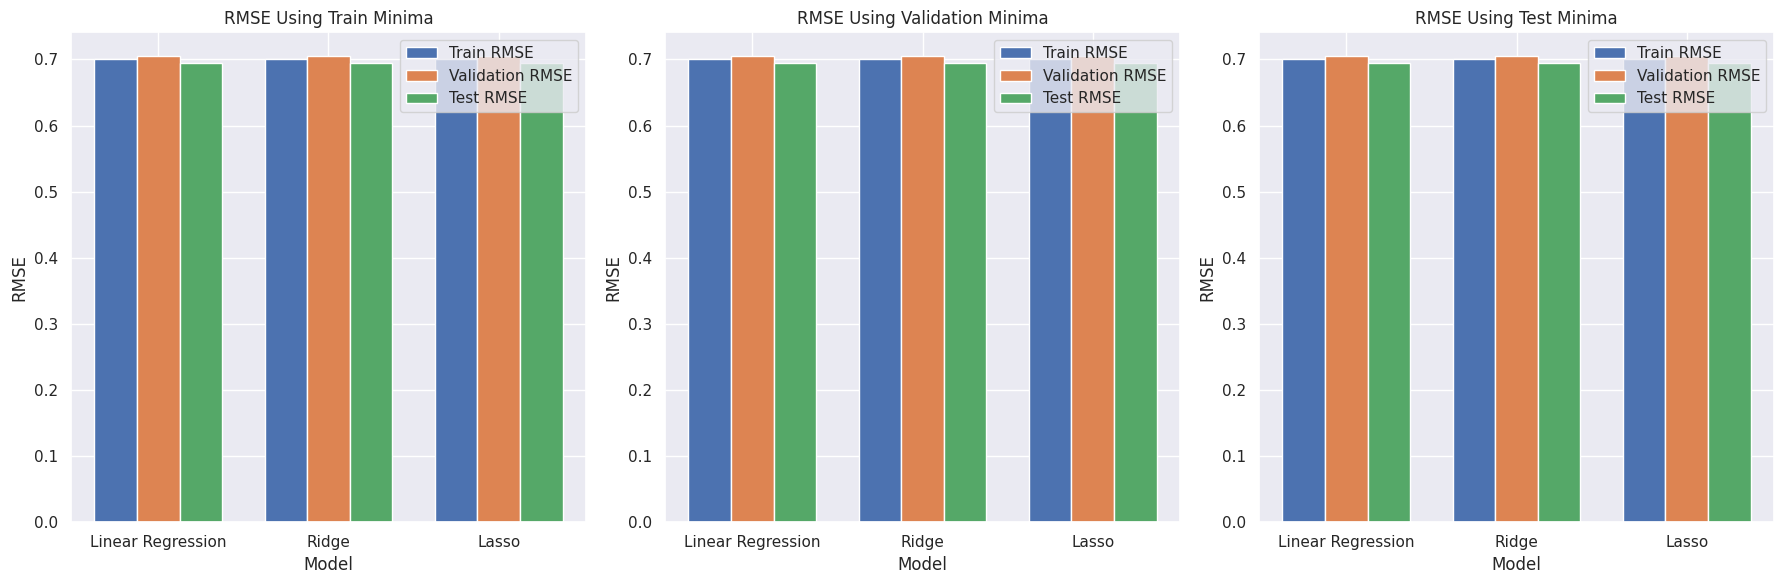


--- Summary of Errors at Minima ---


Model         Minimizing Lambda  Train RMSE  Validation RMSE  \
0  Linear Regression                N/A    N/A    0.701458         0.705776   
1              Ridge       Train Minima  0.001    0.701458         0.705776   
2              Ridge  Validation Minima  0.001    0.701458         0.705776   
3              Ridge        Test Minima  0.001    0.701458         0.705776   
4              Lasso       Train Minima  0.001    0.701458         0.705790   
5              Lasso  Validation Minima  0.001    0.701458         0.705790   
6              Lasso        Test Minima  0.001    0.701458         0.705790   

   Test RMSE  
0   0.694389  
1   0.694389  
2   0.694389  
3   0.694389  
4   0.694396  
5   0.694396  
6   0.694396

In [16]:
summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


La prediccion es bastante mala, creemos un polinomio para mejorarla.

Creando X^[2, 3, 4, 5, 6]


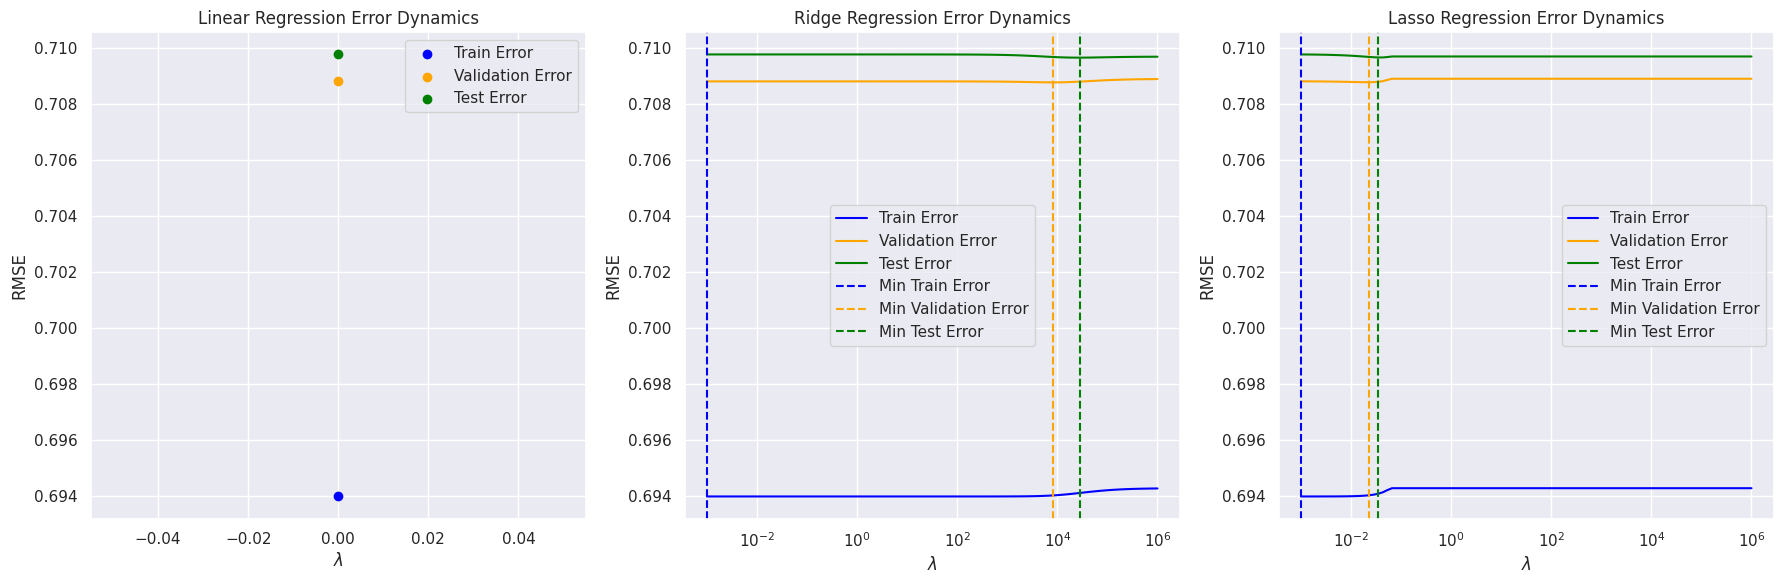

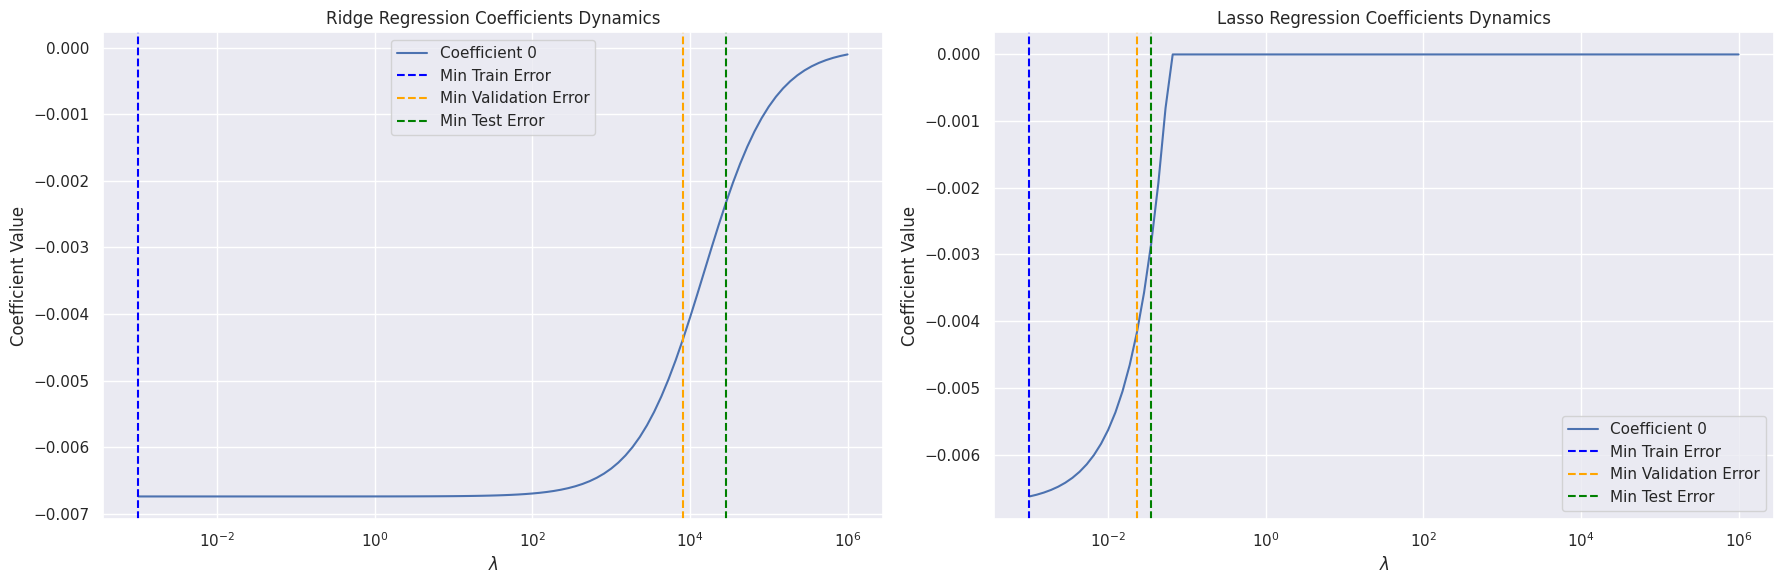

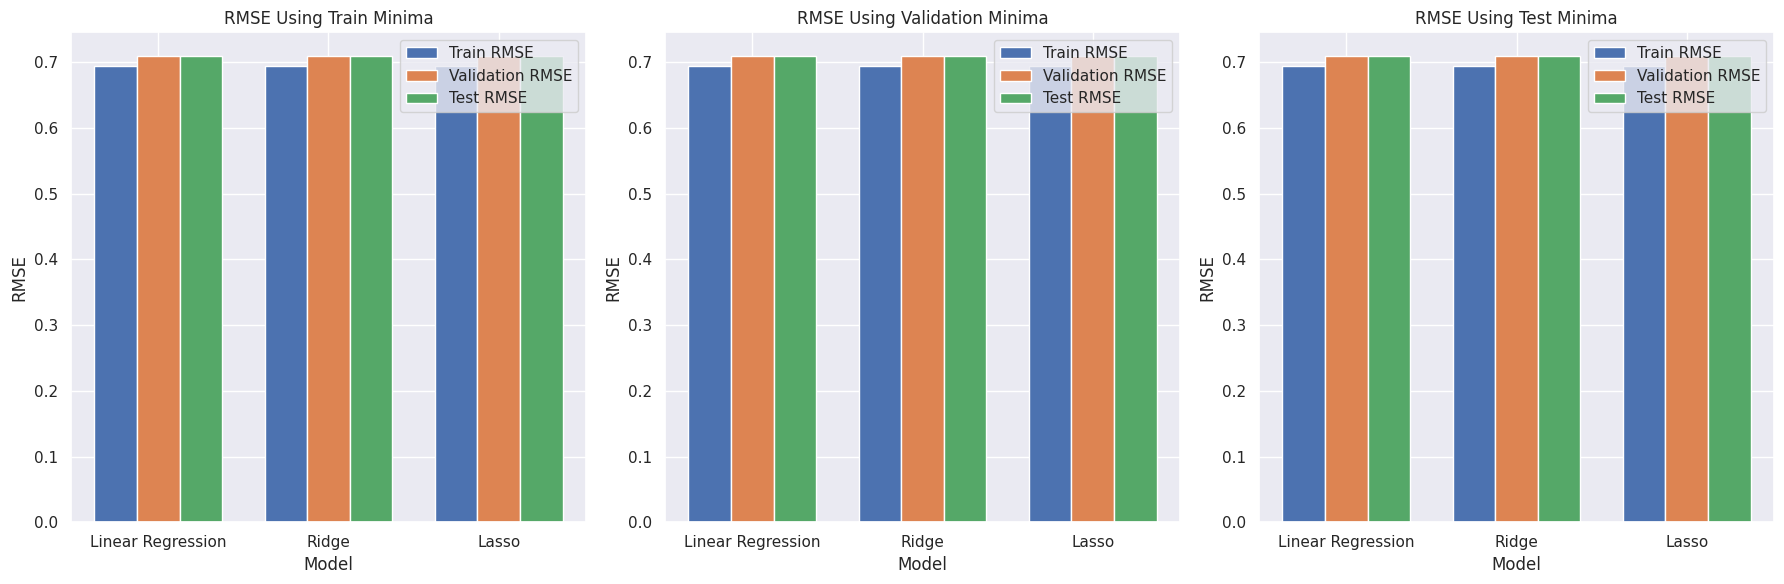


--- Summary of Errors at Minima ---


Model         Minimizing        Lambda  Train RMSE  \
0  Linear Regression                N/A           N/A    0.693994   
1              Ridge       Train Minima         0.001    0.693994   
2              Ridge  Validation Minima   8111.308308    0.694030   
3              Ridge        Test Minima  28480.358684    0.694120   
4              Lasso       Train Minima         0.001    0.693994   
5              Lasso  Validation Minima      0.023101    0.694037   
6              Lasso        Test Minima      0.035112    0.694093   

   Validation RMSE  Test RMSE  
0         0.708799   0.709760  
1         0.708799   0.709760  
2         0.708764   0.709669  
3         0.708791   0.709646  
4         0.708795   0.709754  
5         0.708764   0.709664  
6         0.708779   0.709647

In [17]:
X2 = X.copy()
#power = [1 + 1/n for n in range(1,3000)]
power = [1 + n for n in range(1,6)]

for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
print(f"Creando X^{power}")
summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


Parece que el error mejoro un poco, pero sigue siendo muy alto apesar de tener muchas nuevas variables polinomiales. Trata de explorar si puedes mejorar el error utilizando solo transformaciones polinomiales. No es la peor prediccion, pero no es muy buena.

# Limites de Modelaje

## Extrapolacion o "Fat-Tails"

Ahora veamos que pasa cuando nuestros datos son muy dispersos. La idea es que veamos como se comporta el modelo con extrapolacion.

$ y = sin(x) $

Pero esta vez, $X$ tomara valores muy dispersos, osea tendra mucha varianza!

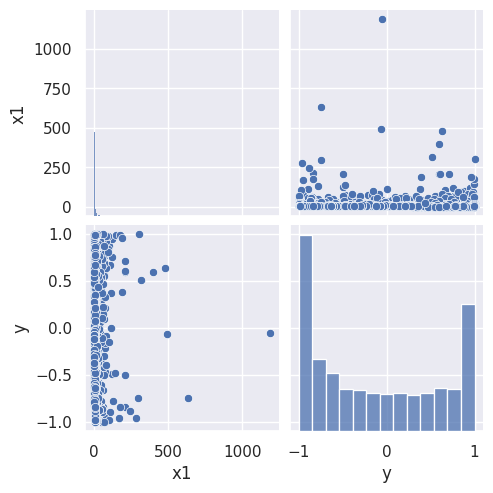

In [18]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 3000
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,2,size=(N,1))

# Generar Y
Y = np.sin(X)
Y = Y.reshape(-1)

#Ingenieria de Variables
X = np.reshape(X, (N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

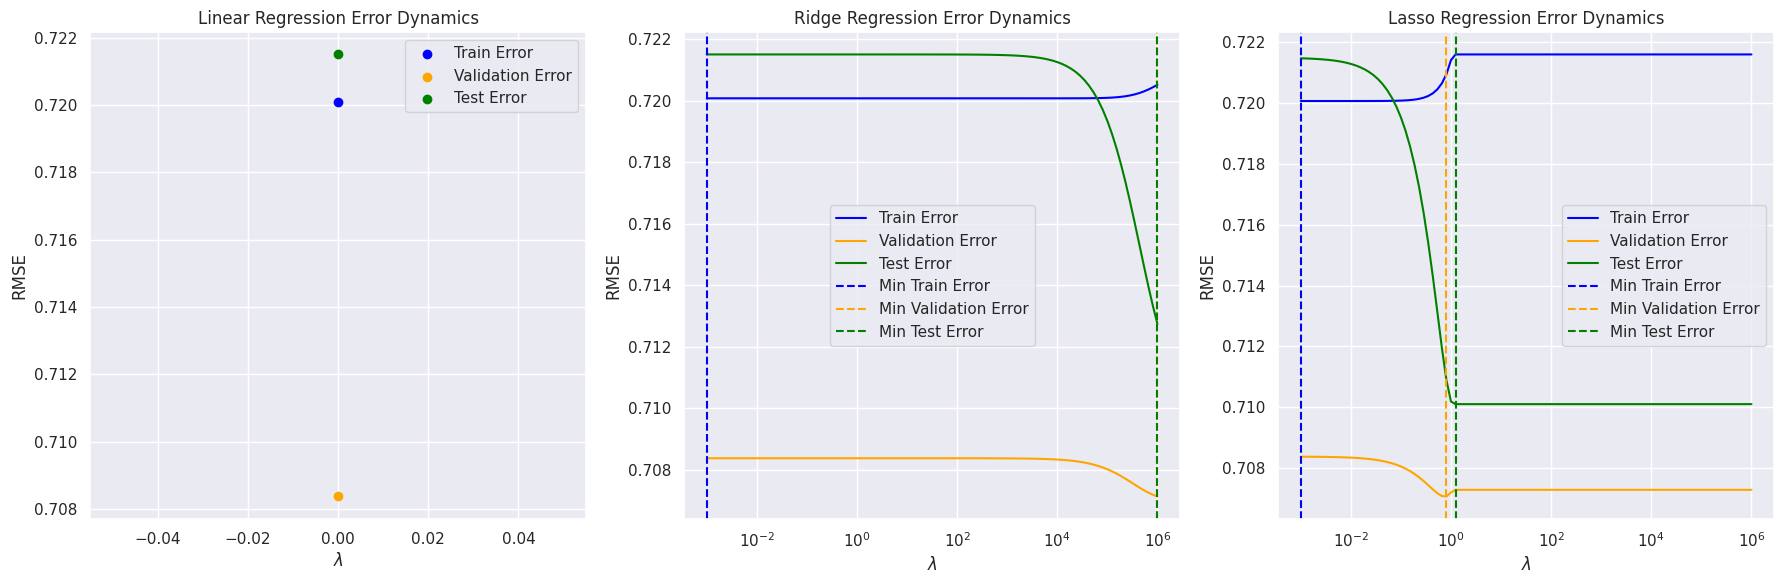

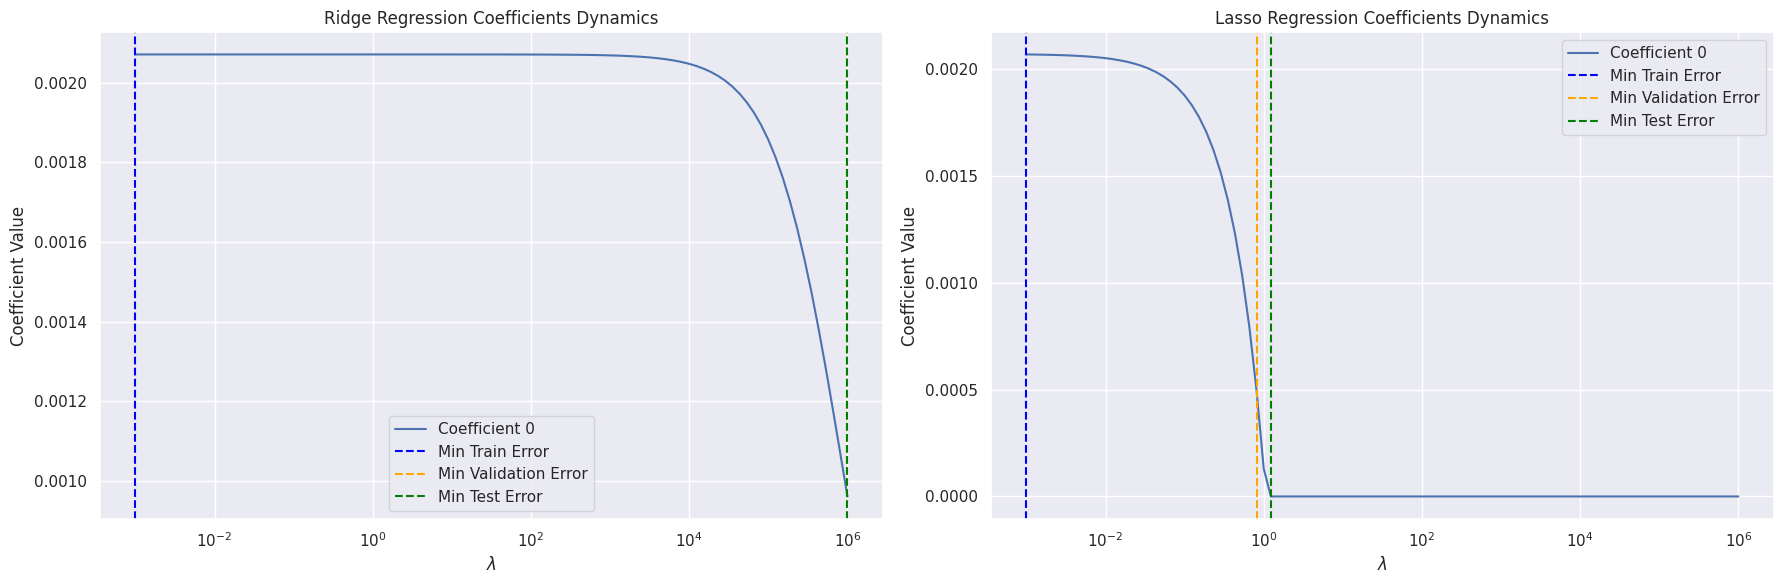

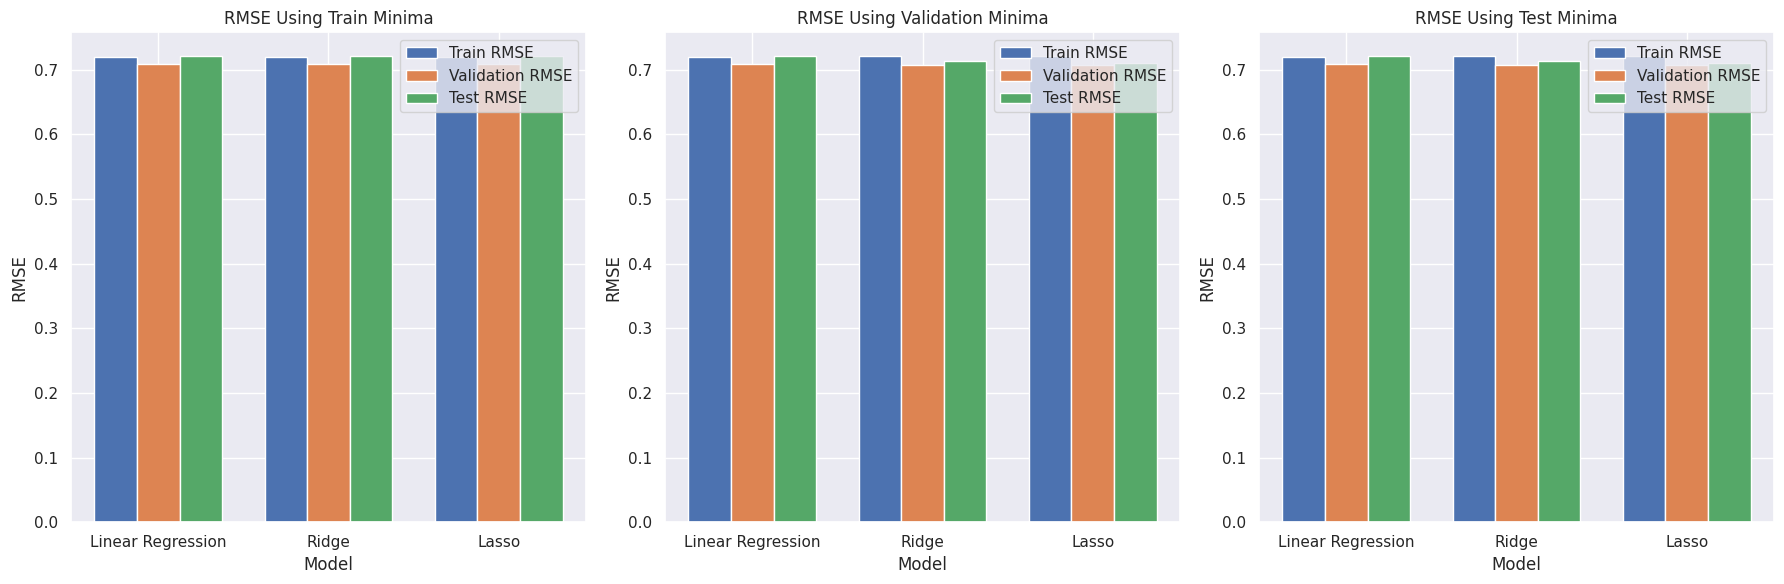


--- Summary of Errors at Minima ---


Model         Minimizing     Lambda  Train RMSE  \
0  Linear Regression                N/A        N/A    0.720071   
1              Ridge       Train Minima      0.001    0.720071   
2              Ridge  Validation Minima  1000000.0    0.720512   
3              Ridge        Test Minima  1000000.0    0.720512   
4              Lasso       Train Minima      0.001    0.720071   
5              Lasso  Validation Minima   0.811131    0.720958   
6              Lasso        Test Minima   1.232847    0.721604   

   Validation RMSE  Test RMSE  
0         0.708375   0.721497  
1         0.708375   0.721497  
2         0.707133   0.712735  
3         0.707133   0.712735  
4         0.708371   0.721477  
5         0.707063   0.710882  
6         0.707281   0.710100

In [19]:
summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


[2, 3]


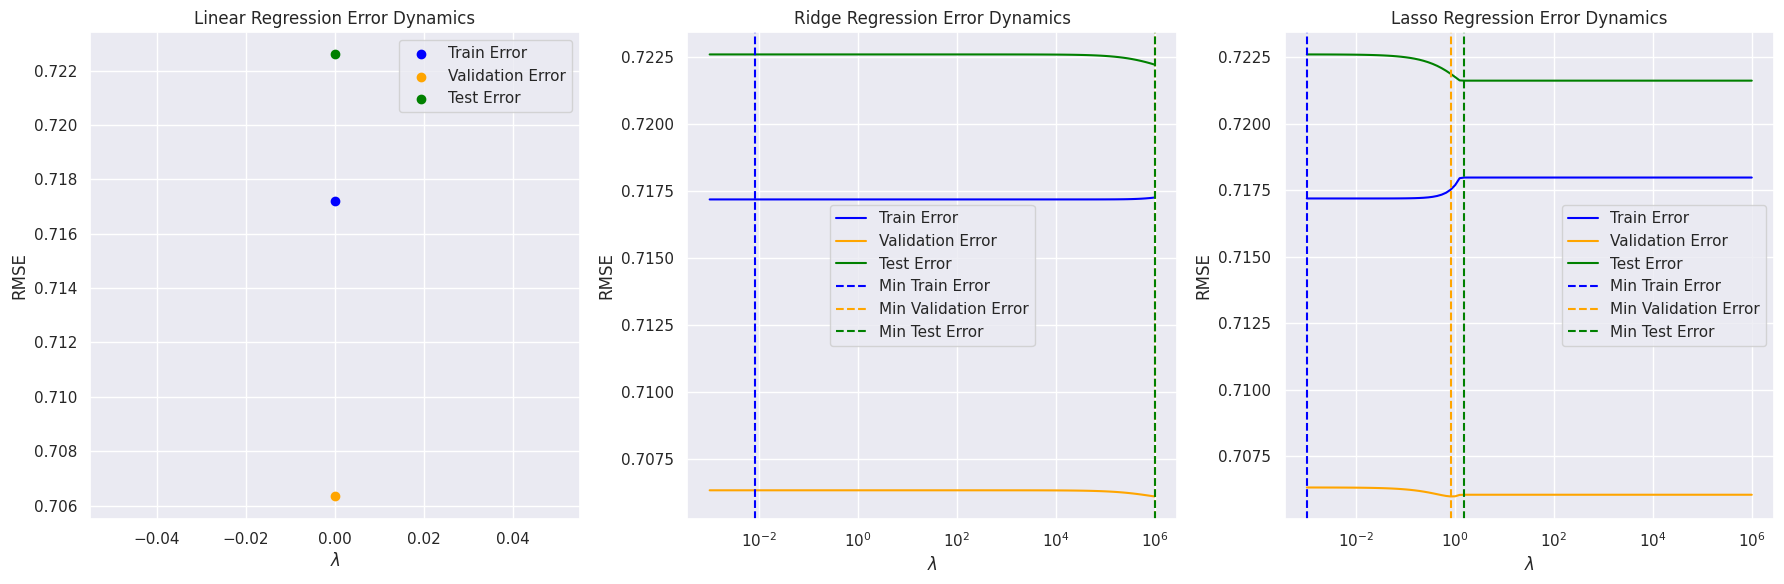

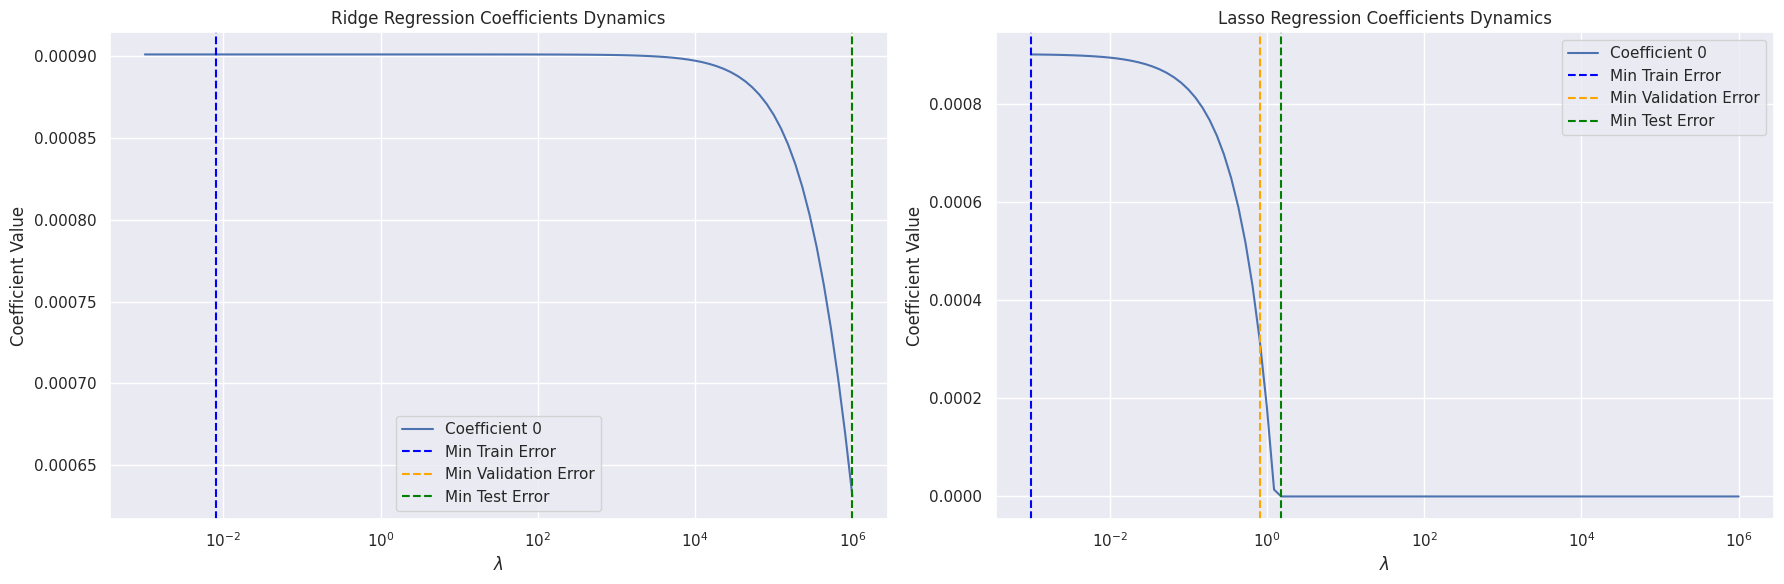

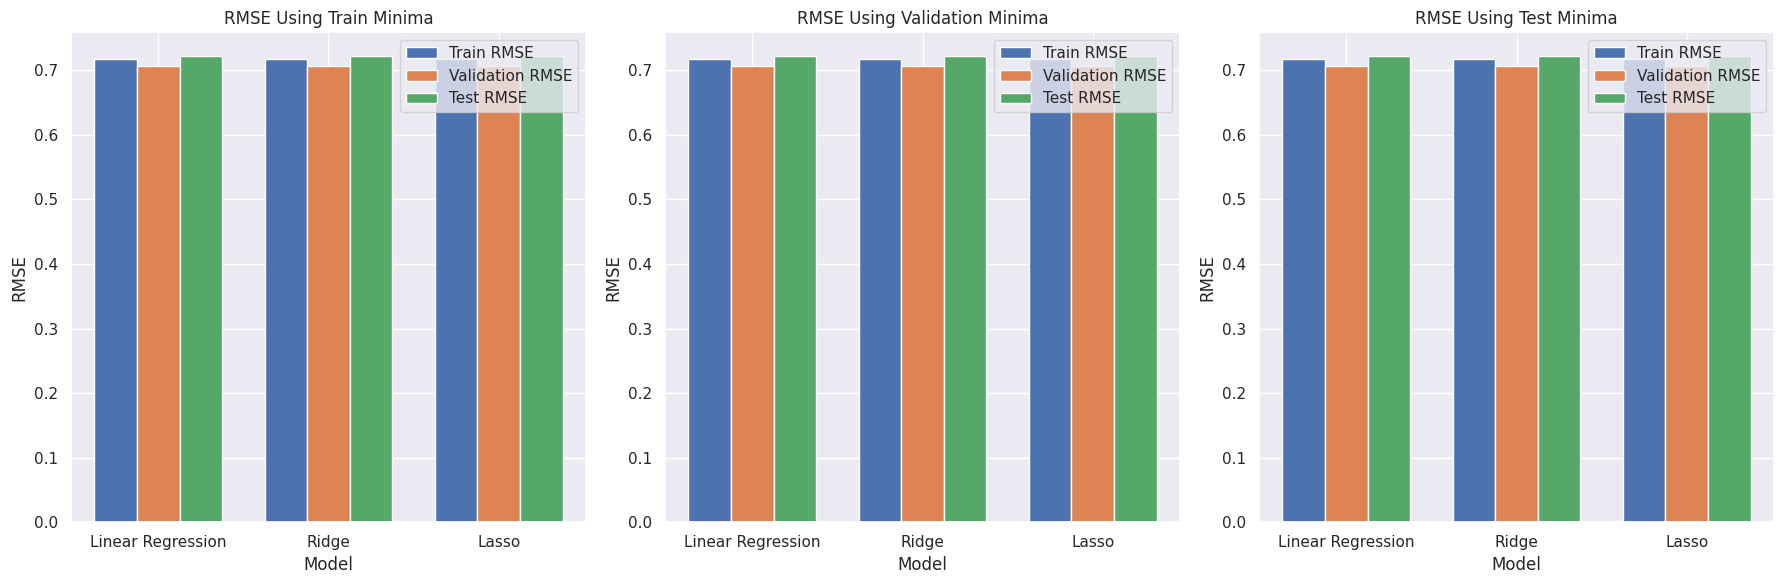


--- Summary of Errors at Minima ---


Model         Minimizing     Lambda  Train RMSE  \
0  Linear Regression                N/A        N/A    0.717187   
1              Ridge       Train Minima   0.008111    0.717187   
2              Ridge  Validation Minima  1000000.0    0.717258   
3              Ridge        Test Minima  1000000.0    0.717258   
4              Lasso       Train Minima      0.001    0.717187   
5              Lasso  Validation Minima   0.811131    0.717517   
6              Lasso        Test Minima   1.519911    0.717973   

   Validation RMSE  Test RMSE  
0         0.706334   0.722598  
1         0.706334   0.722598  
2         0.706104   0.722219  
3         0.706104   0.722219  
4         0.706333   0.722597  
5         0.705997   0.721869  
6         0.706061   0.721612

In [20]:
X2 = X.copy()
# Exponentes polinomiales
#power = [1 + n/10 for n in range(1,500)]
power = [1 + n for n in range(1,3)]
print(power)
for p in power:
    X2 = np.concatenate((X2,np.power(X[:,0],p).reshape((N,1))), axis=1)
# for p in power:
#     X2 = np.concatenate((X2,np.power(X[:,0],-p).reshape((N,1))), axis=1)
summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


+ Que notas sobre los errores con respecto a las predicciones anteriores del $sin(x)$?
+ En donde aparecen los errores mas altos? Notas algun patron en particular?
+ Utilizando solo transformaciones polinomicas y la regresion lineal que podrias hacer para mejorar el modelo?

## Incertidumbre no observada

Ahora utilicemos una de nuestras funciones anteriores pero agreguemos incertidumbre. Esta incertidumbre podria representar variables omitidas, ruido en la muestra, incertidumbre inherente al modelo, errores de captura, etc..

Simulemos heterocedasticidad, rompiendo el supuesto donde $E[\epsilon | x] != 0$

$y = x_1 + \epsilon_1*\epsilon_2$

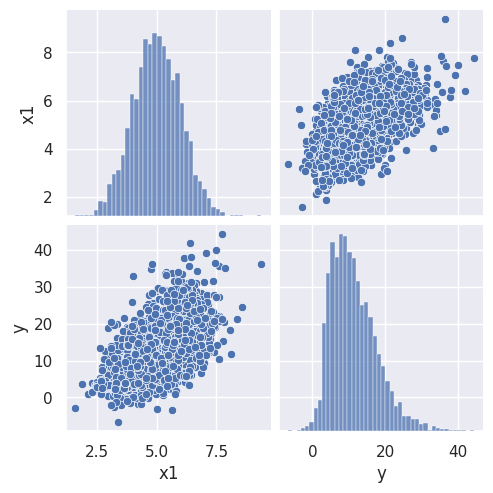

In [21]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 3000
# Matriz de Diseño
mean = [5,2,3]
cov = [[1,.5,.5],[.5,2,.5],[.5,.5,2]]
X = np.random.multivariate_normal(mean, cov, N)


# Simulacion de Y
Y = X[:,0] + X[:,1]*X[:,2]
Y = Y.reshape(-1)
X = X[:,0]
X = X.reshape((N,1))

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

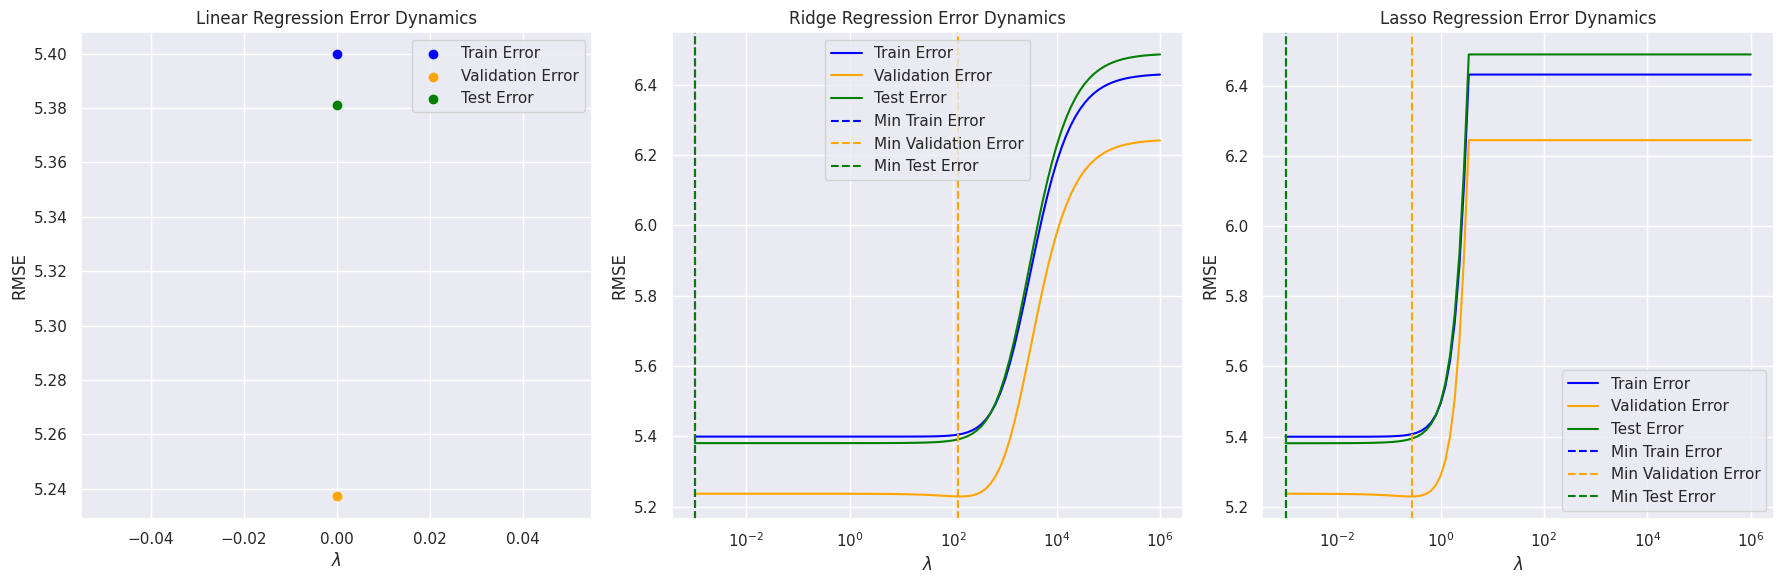

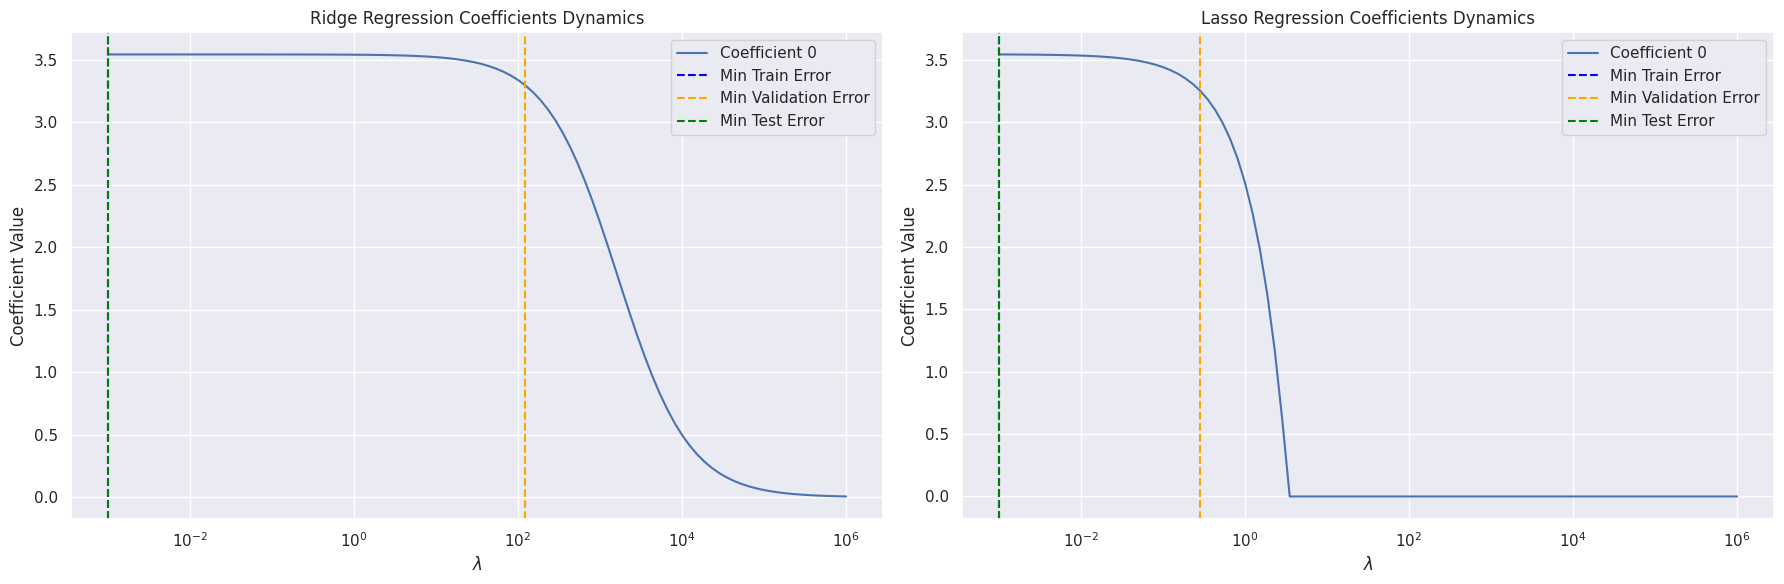

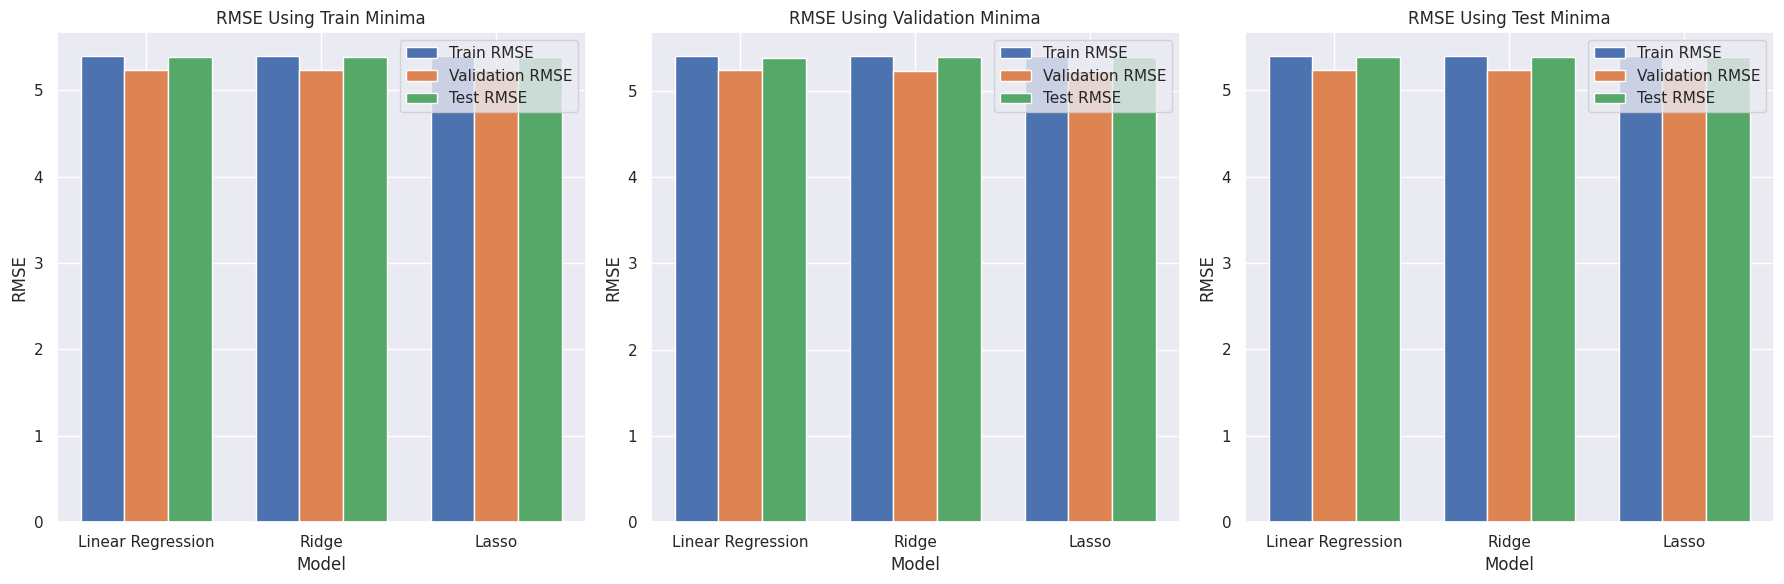


--- Summary of Errors at Minima ---


Model         Minimizing      Lambda  Train RMSE  \
0  Linear Regression                N/A         N/A    5.399662   
1              Ridge       Train Minima       0.001    5.399662   
2              Ridge  Validation Minima  123.284674    5.405225   
3              Ridge        Test Minima       0.001    5.399662   
4              Lasso       Train Minima       0.001    5.399662   
5              Lasso  Validation Minima    0.284804    5.407379   
6              Lasso        Test Minima       0.001    5.399662   

   Validation RMSE  Test RMSE  
0         5.237234   5.381123  
1         5.237234   5.381123  
2         5.229488   5.391661  
3         5.237234   5.381123  
4         5.237176   5.381143  
5         5.229458   5.394719  
6         5.237176   5.381143

In [22]:
summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


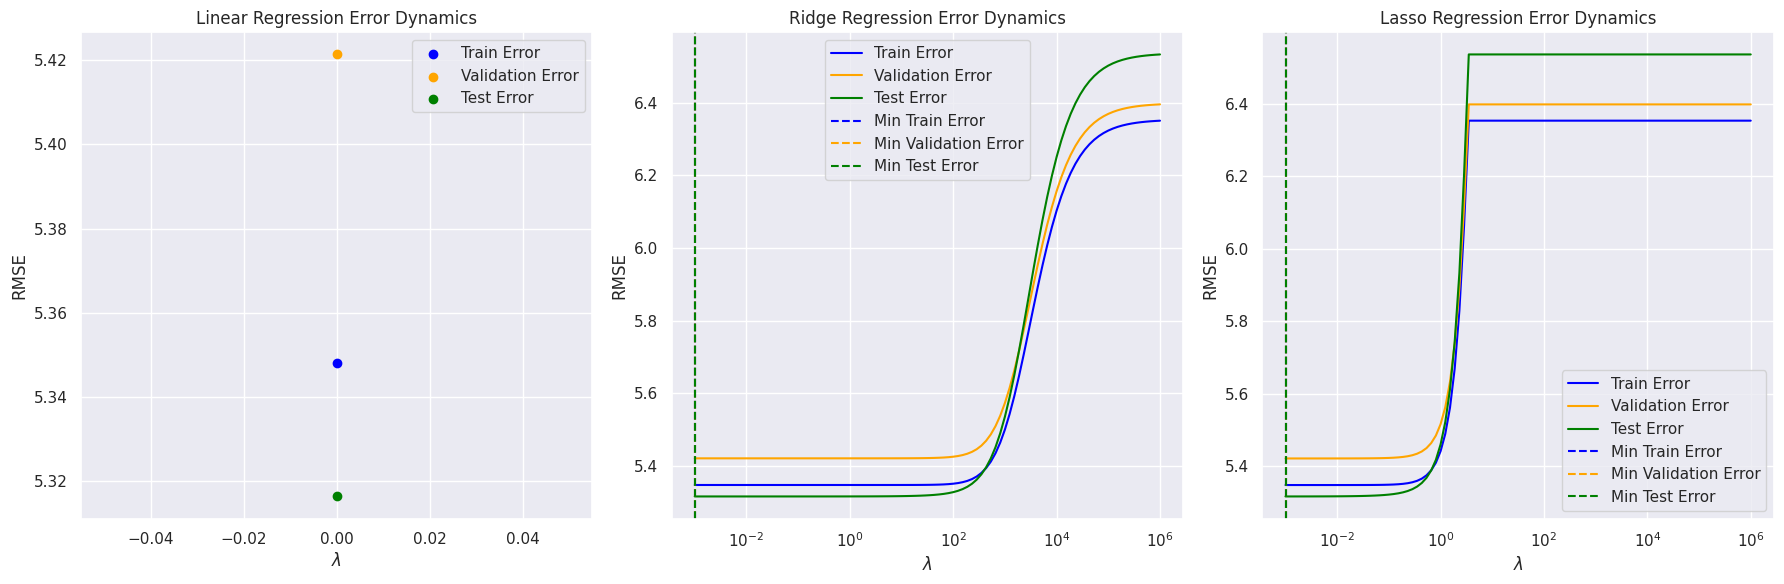

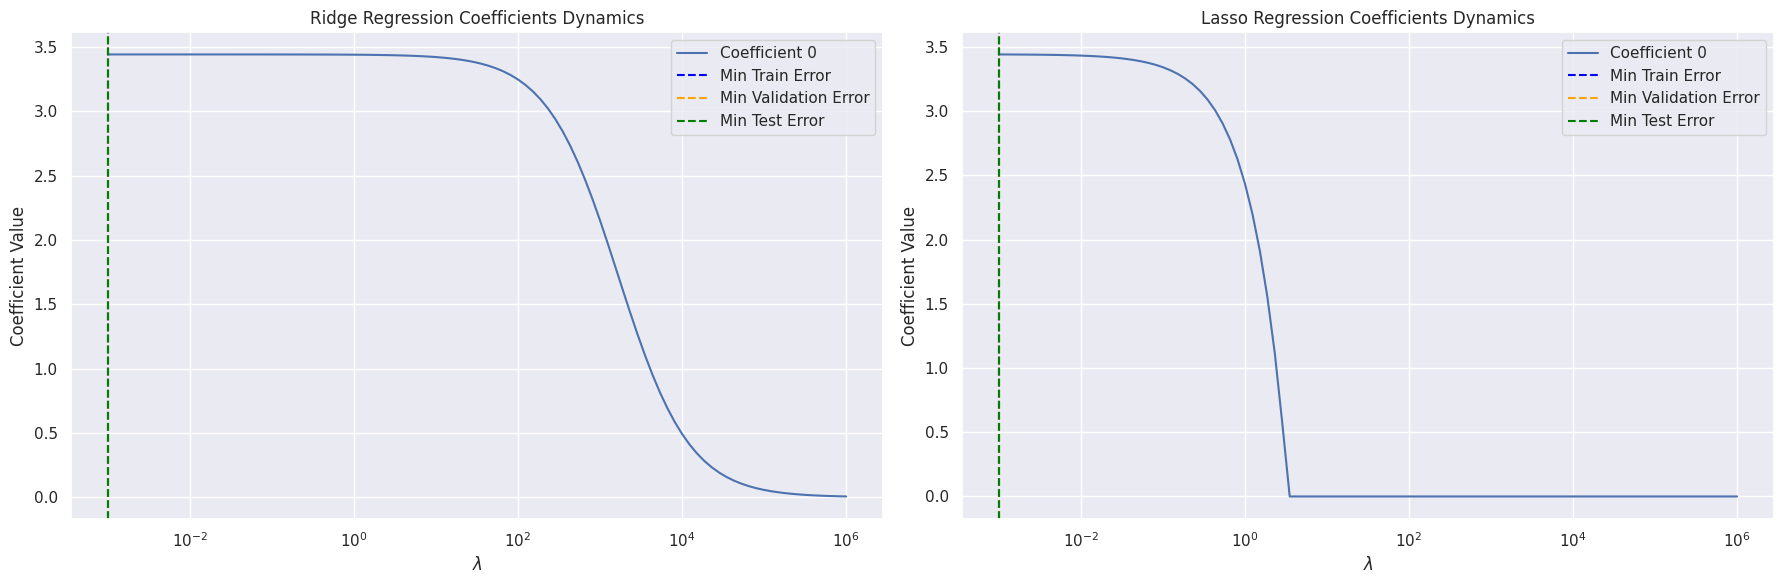

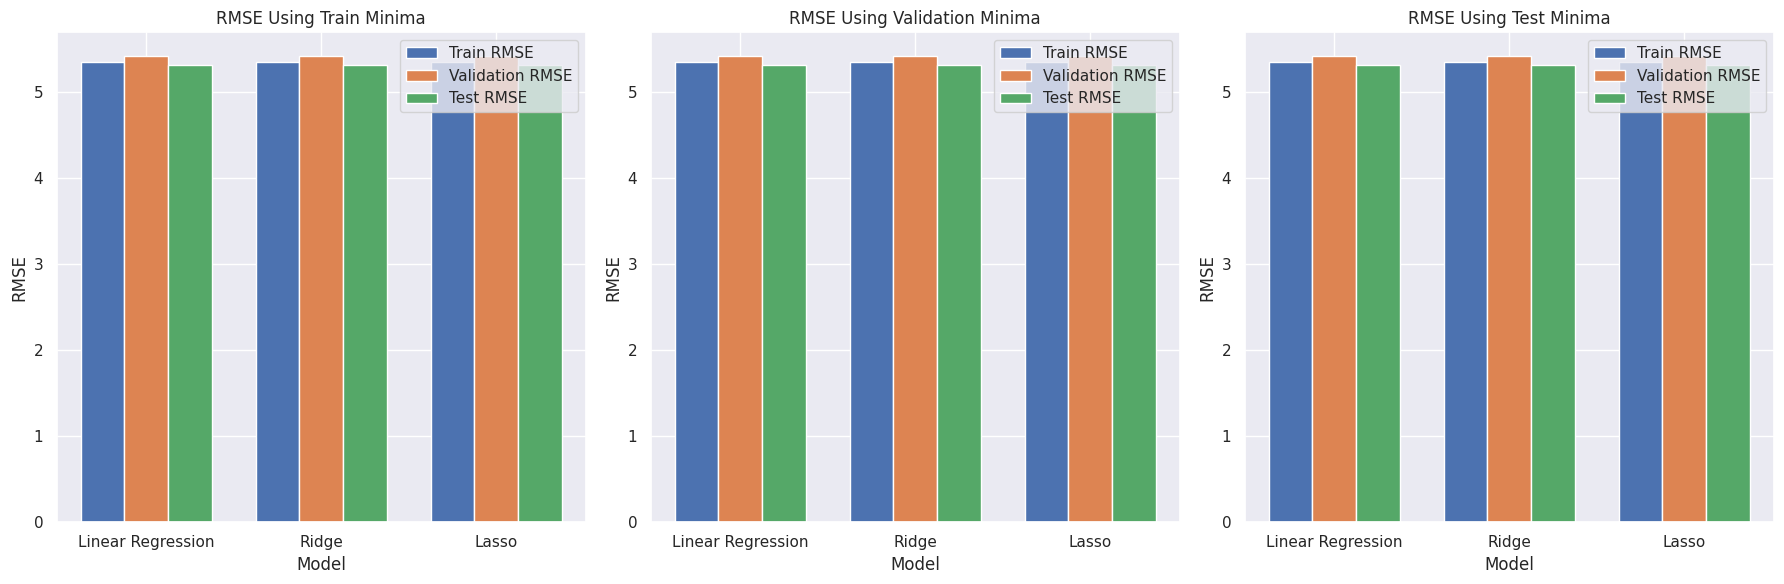


--- Summary of Errors at Minima ---


Model         Minimizing Lambda  Train RMSE  Validation RMSE  \
0  Linear Regression                N/A    N/A    5.347974         5.421305   
1              Ridge       Train Minima  0.001    5.347974         5.421305   
2              Ridge  Validation Minima  0.001    5.347974         5.421305   
3              Ridge        Test Minima  0.001    5.347974         5.421305   
4              Lasso       Train Minima  0.001    5.347974         5.421311   
5              Lasso  Validation Minima  0.001    5.347974         5.421311   
6              Lasso        Test Minima  0.001    5.347974         5.421311   

   Test RMSE  
0   5.316425  
1   5.316425  
2   5.316425  
3   5.316425  
4   5.316466  
5   5.316466  
6   5.316466

In [23]:
X2 = X.copy()

#Ingenieria de Variables
power = [1 + n for n in range(1,10)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
# for p in power:
#     X2 = np.concatenate((X2,np.power(X2[:,0],-p).reshape((N,1))), axis=1)
summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


+ Que esta pasando con nuestro modelo a pesar de que estamos agregando nuevas variables?

Ahora usemos un modelo aun mas complejo y regresemos al supuesto $E[\epsilon | x] = 0$

$y =  x + ln(x) + xln(x) + 1/x + x^{1.3} + \epsilon_1*\epsilon_2$

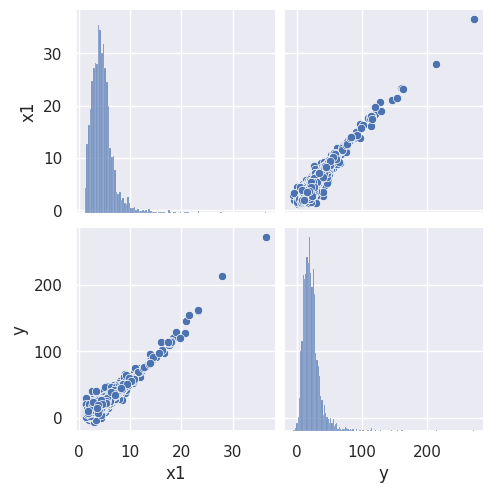

In [24]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 3000
# Generar Xs
X = np.random.uniform(1,5,size=(N,1)) + np.random.lognormal(0,1,size=(N,1))
mean = [1,1]
cov = [[2,.3],[.3,5]]
E = np.random.multivariate_normal(mean, cov, N)
# Generar Y
Y = X + np.log(X) + X*np.log(X) + 1/X + np.power(X,1.3) + (E[:,0]*E[:,1]).reshape((N,1))
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1'])
df['y'] = Y
sns.pairplot(df)

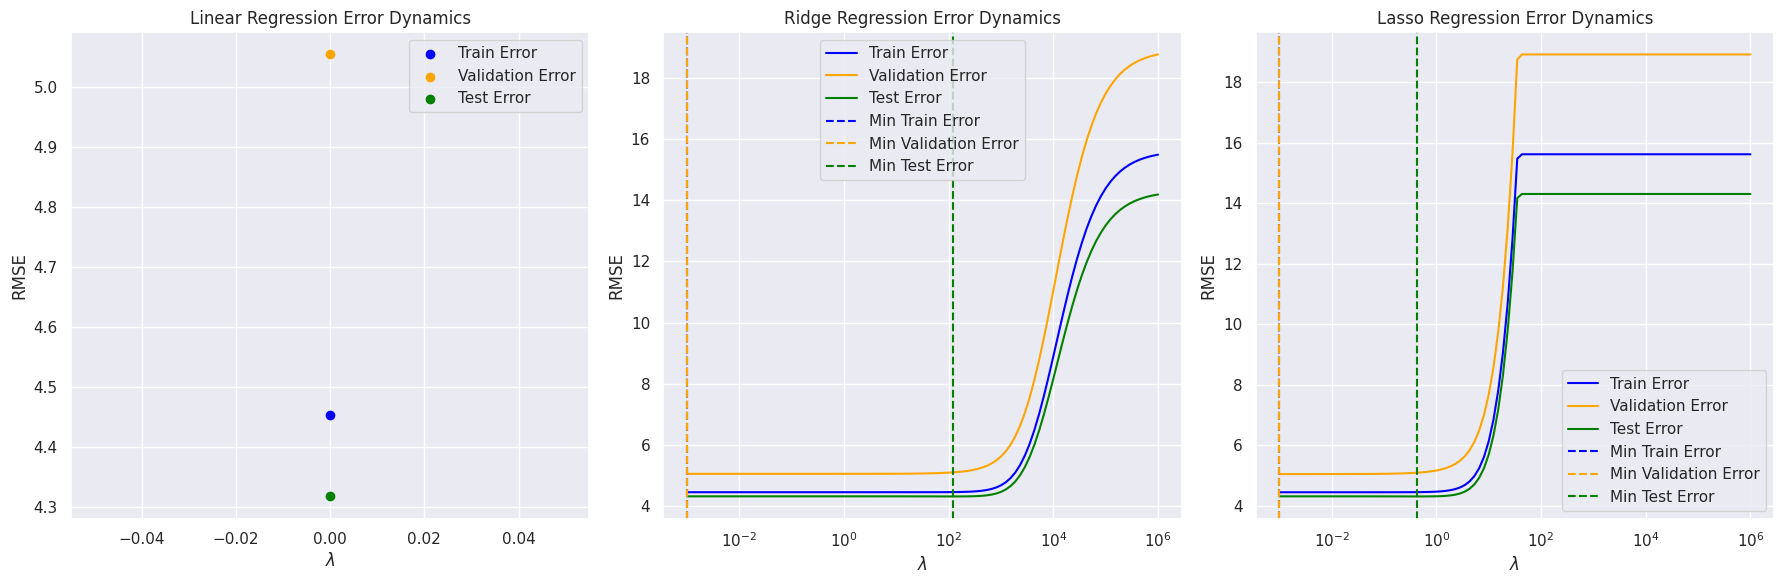

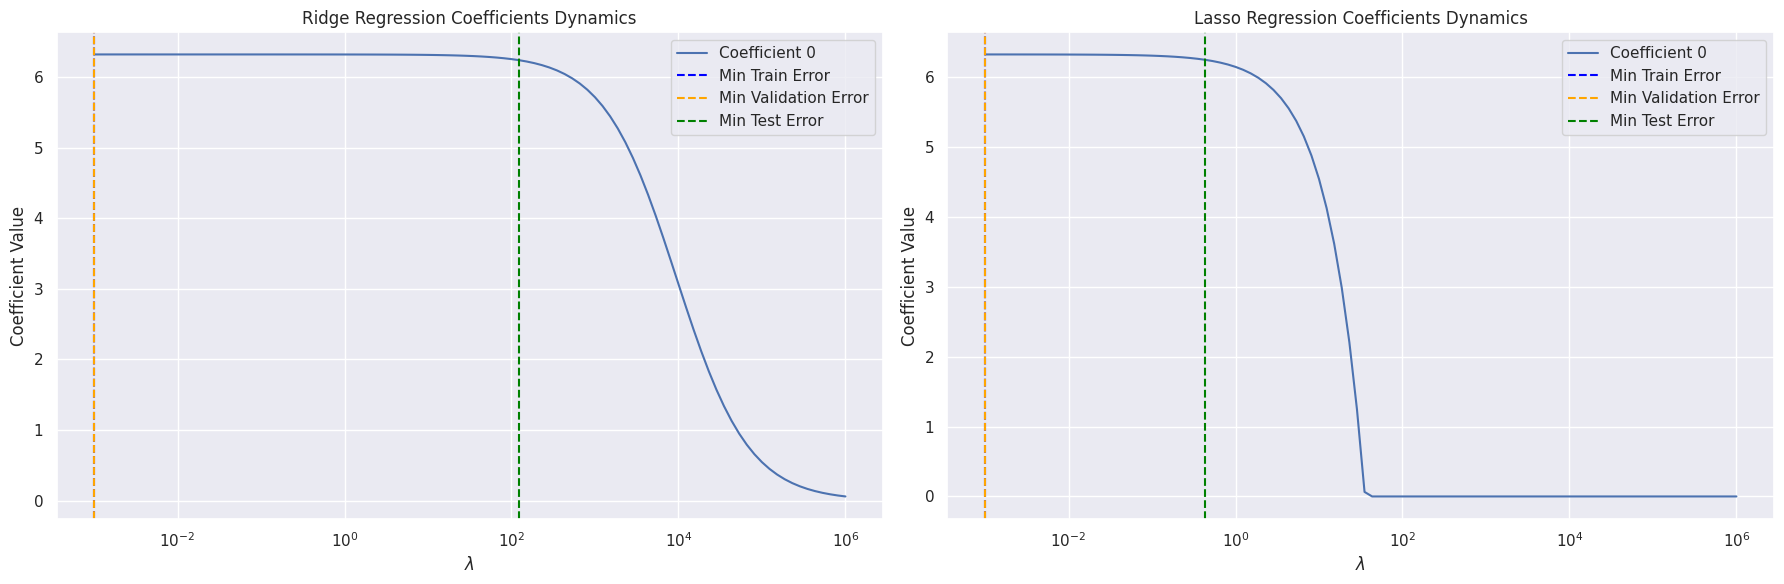

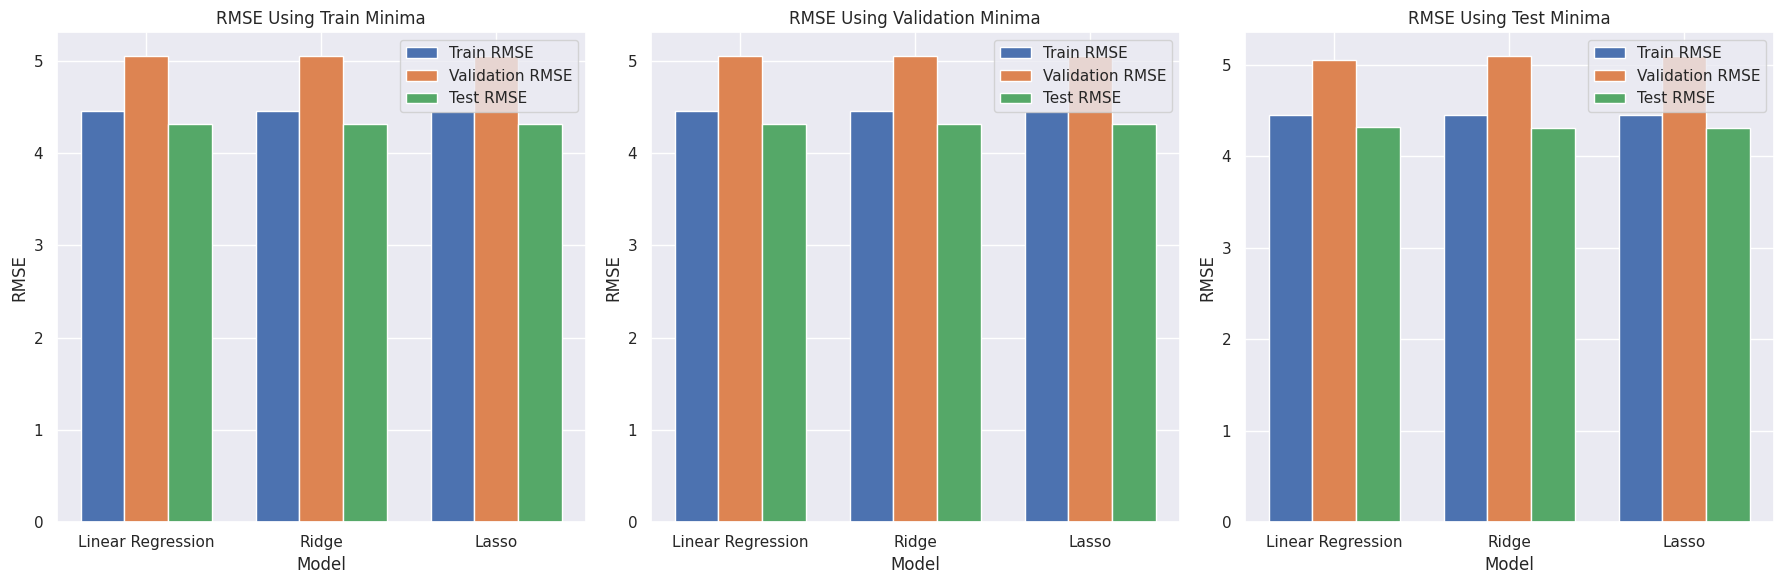


--- Summary of Errors at Minima ---


Model         Minimizing      Lambda  Train RMSE  \
0  Linear Regression                N/A         N/A    4.453090   
1              Ridge       Train Minima       0.001    4.453090   
2              Ridge  Validation Minima       0.001    4.453090   
3              Ridge        Test Minima  123.284674    4.457279   
4              Lasso       Train Minima       0.001    4.453090   
5              Lasso  Validation Minima       0.001    4.453090   
6              Lasso        Test Minima    0.432876    4.456836   

   Validation RMSE  Test RMSE  
0         5.053966   4.318157  
1         5.053966   4.318157  
2         5.053966   4.318157  
3         5.102716   4.314490  
4         5.054062   4.318141  
5         5.054062   4.318141  
6         5.099827   4.314500

In [25]:
summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


Utilicemos un polinomio muy grande para tratar de mejorar el modelo

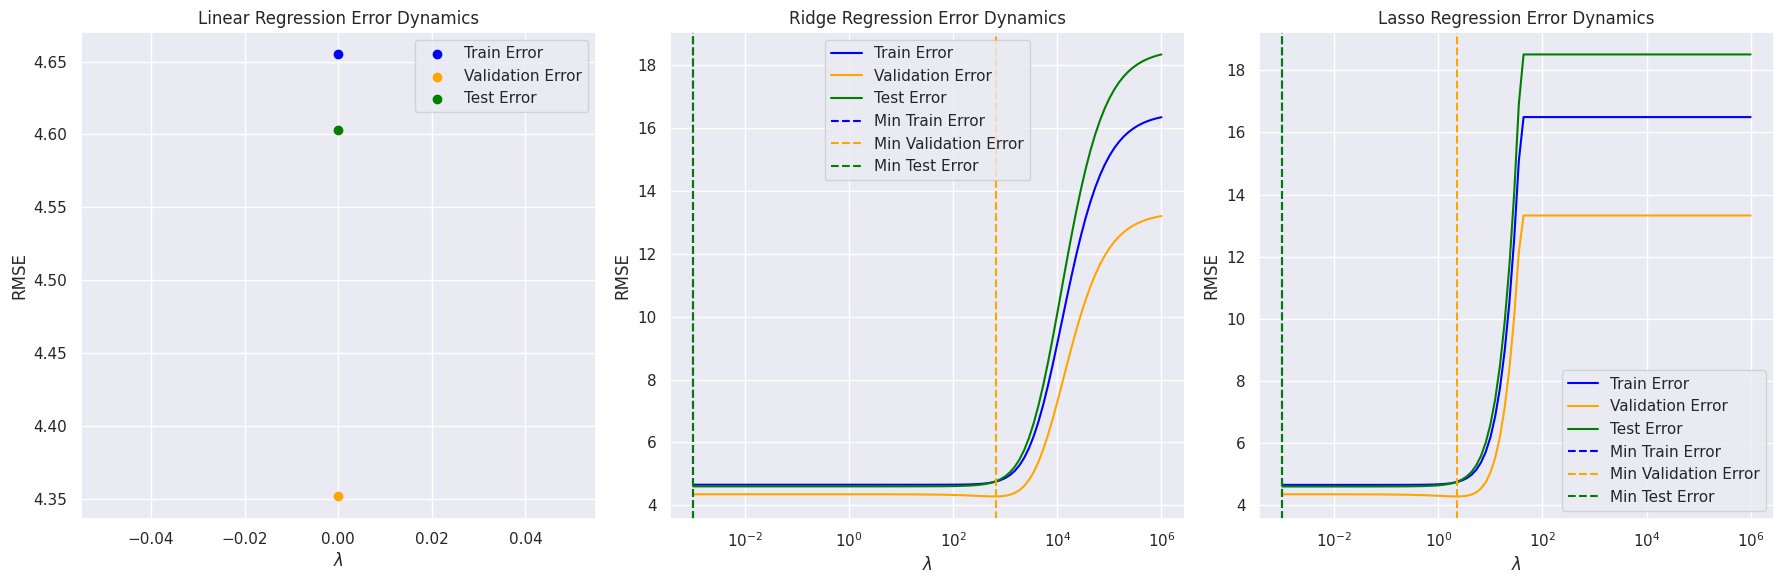

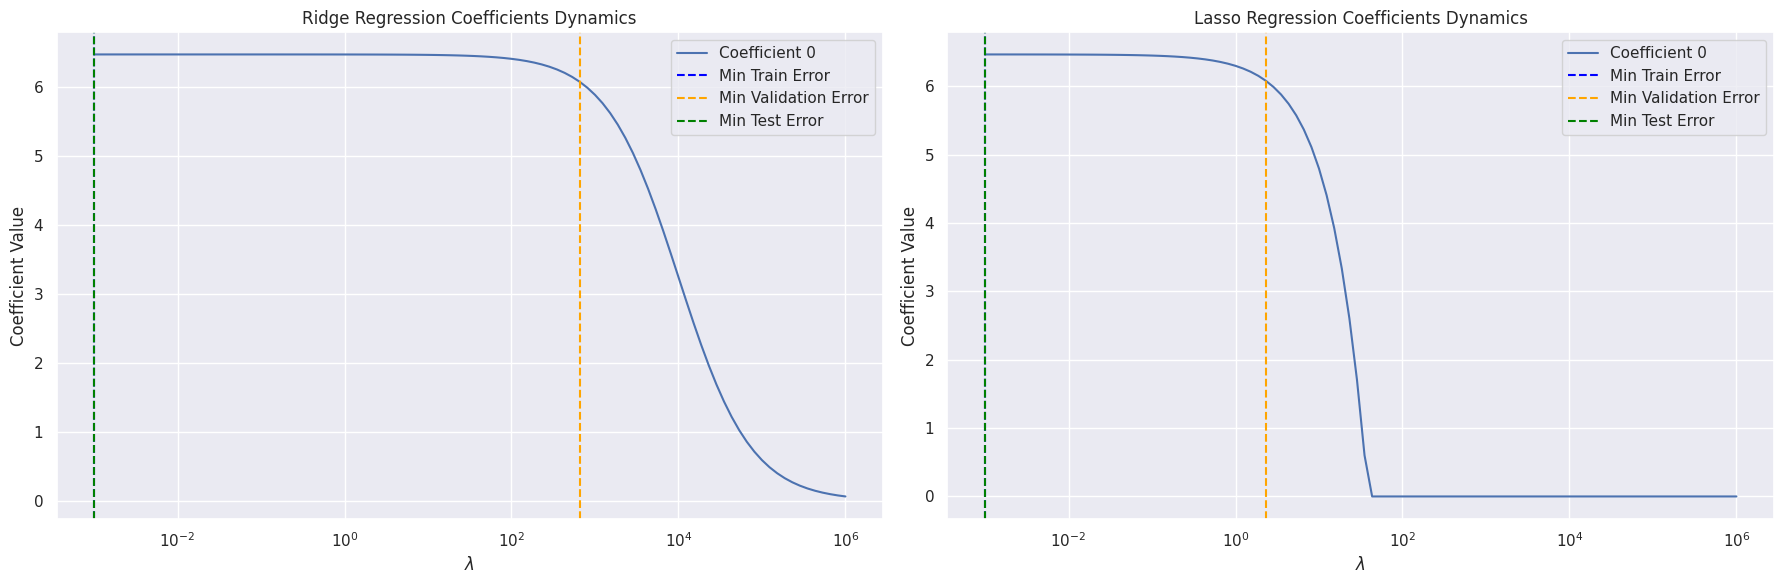

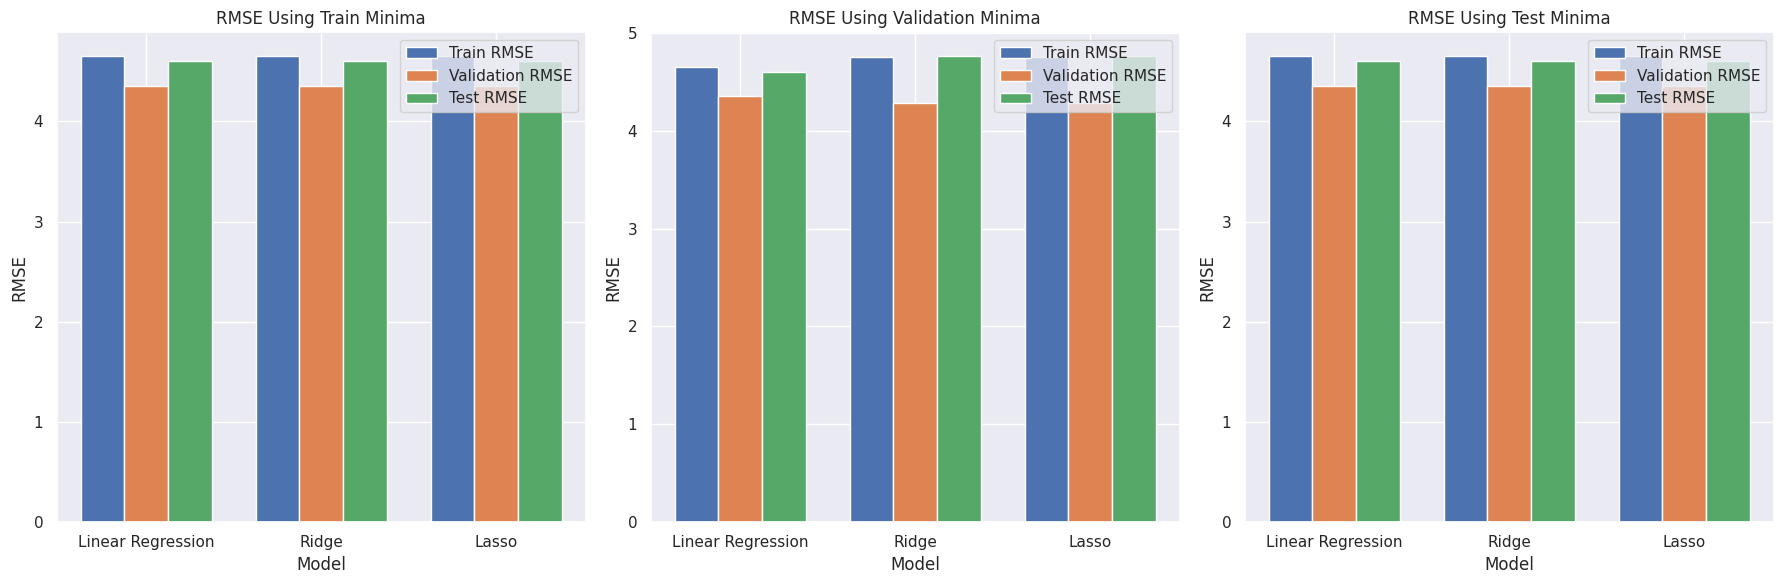


--- Summary of Errors at Minima ---


Model         Minimizing      Lambda  Train RMSE  \
0  Linear Regression                N/A         N/A    4.654911   
1              Ridge       Train Minima       0.001    4.654911   
2              Ridge  Validation Minima  657.933225    4.755332   
3              Ridge        Test Minima       0.001    4.654911   
4              Lasso       Train Minima       0.001    4.654911   
5              Lasso  Validation Minima     2.31013    4.749749   
6              Lasso        Test Minima       0.001    4.654911   

   Validation RMSE  Test RMSE  
0         4.351615   4.603195  
1         4.351615   4.603195  
2         4.282589   4.765724  
3         4.351615   4.603195  
4         4.351554   4.603210  
5         4.282384   4.757704  
6         4.351554   4.603210

In [26]:
X2 = X.copy()

#Ingenieria de Variables
X2 = np.reshape(X2, (N,1))
power = [1 + n for n in range(1,5)]
for p in power:
    X2 = np.concatenate((X2,np.power(X[:,0],p).reshape((N,1))), axis=1)
# for p in power:
#     X2 = np.concatenate((X2,np.power(X[:,0],-p).reshape((N,1))), axis=1)
summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


+ Que paso con el nuestro errror respecto a lo anterior?
+ Como es posible que ocurra esto cuando tenemos mas varaibles, no deberia de mejorar la prediccion?

## Comportamiento mas complejo

Creemos funciones con comportamiento mas complejo, en este caso utilicemos recursividad (podria representar series de tiempo)

$y_t =  .8*y_{t-1} + x + ln(x) + 1/x + x^{1.3} $

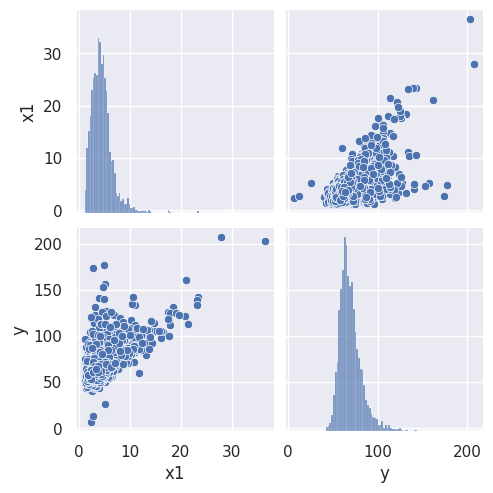

In [27]:
# Seed for reproducibility
np.random.seed(589)

N = 3000

# Generate X
X = np.random.uniform(1, 5, size=(N, 1)) + np.random.lognormal(0, 1, size=(N, 1))

mean = [1, 1]
cov = [[2, .3], [.3, 5]]

# Initialize Y
Y = np.zeros(N)

# Generate Y recursively
for i in range(N):
    if i == 0:
        # Base case for the first value of Y
        Y[i] = X[i] + np.log(X[i]) + 1 / X[i] + np.power(X[i], 1.3)
    else:
        # Recursive relation: Y[i] depends on Y[i-1] and current X[i]
        Y[i] = 0.8 * Y[i - 1] + X[i] + np.log(X[i]) + 1 / X[i] + np.power(X[i], 1.3) 

df = pd.DataFrame(data={'x1': X.flatten(), 'y': Y})
sns.pairplot(df)


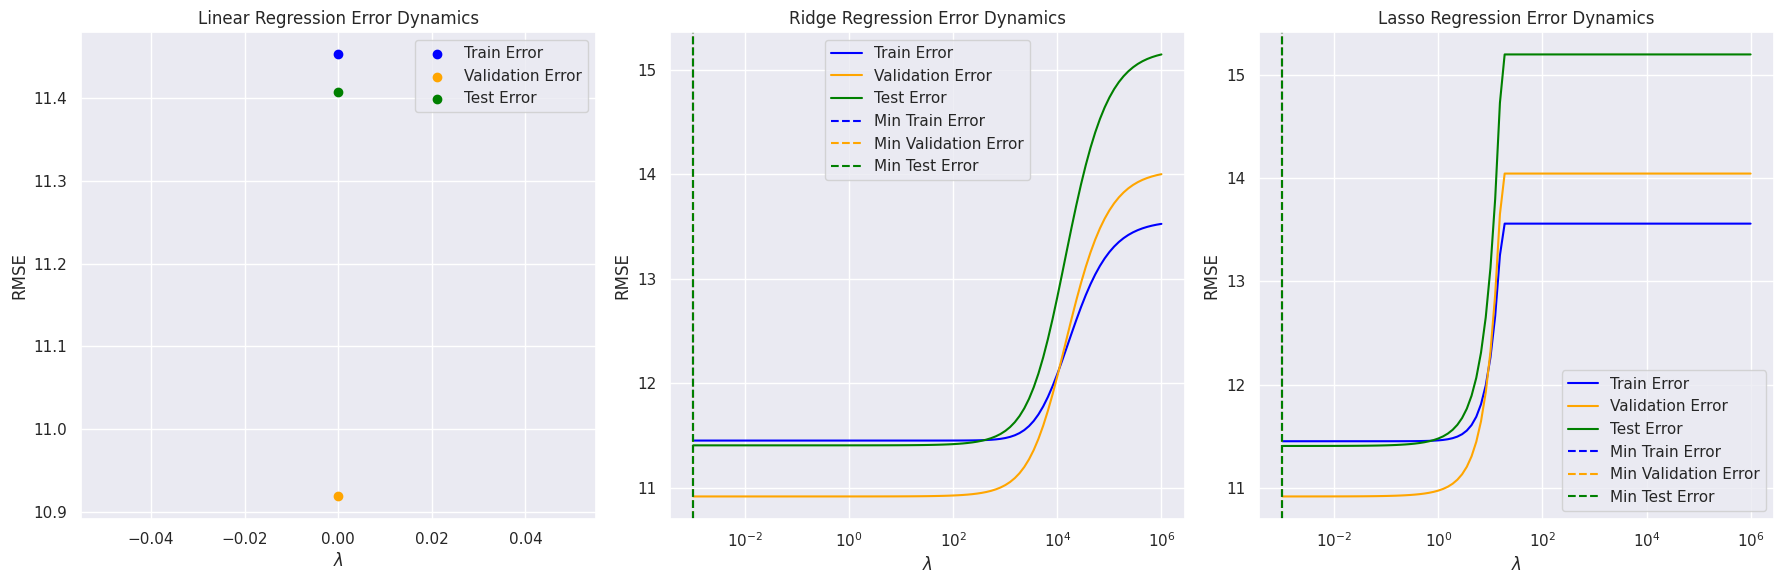

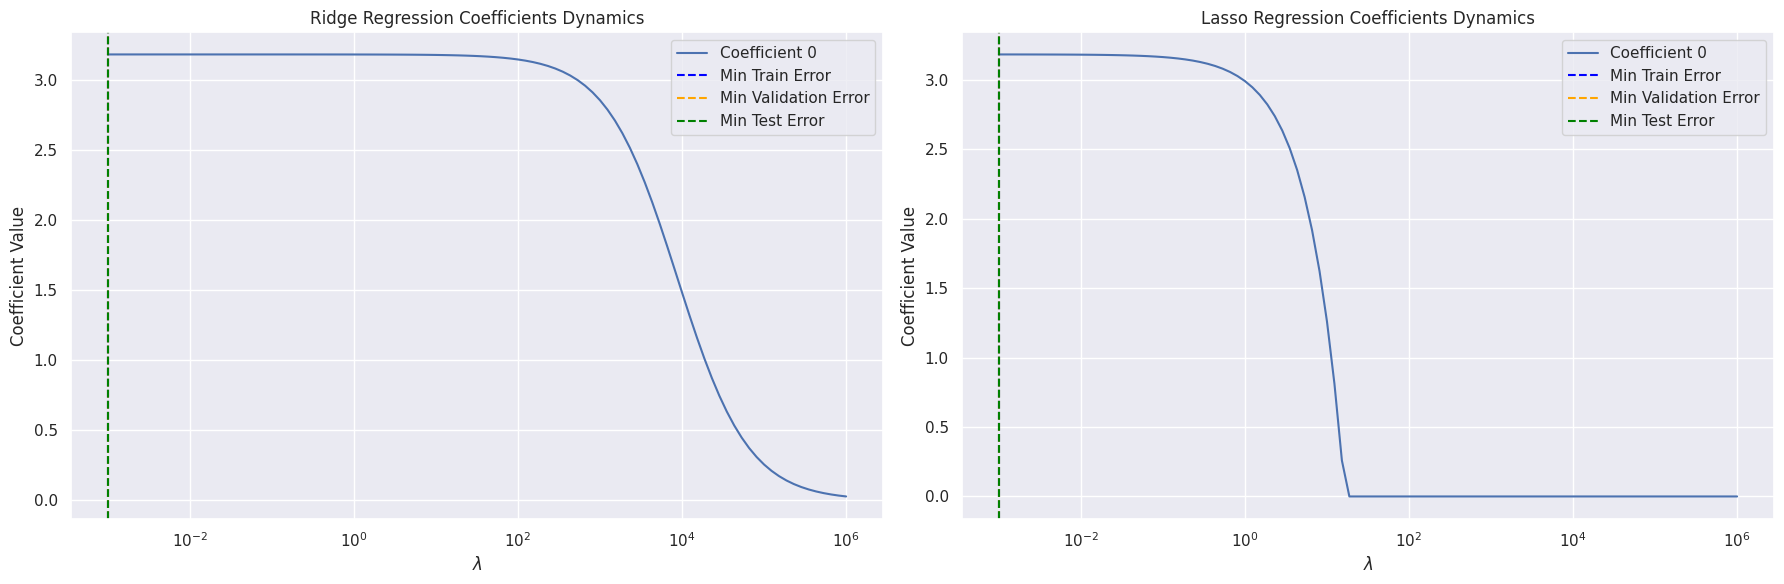

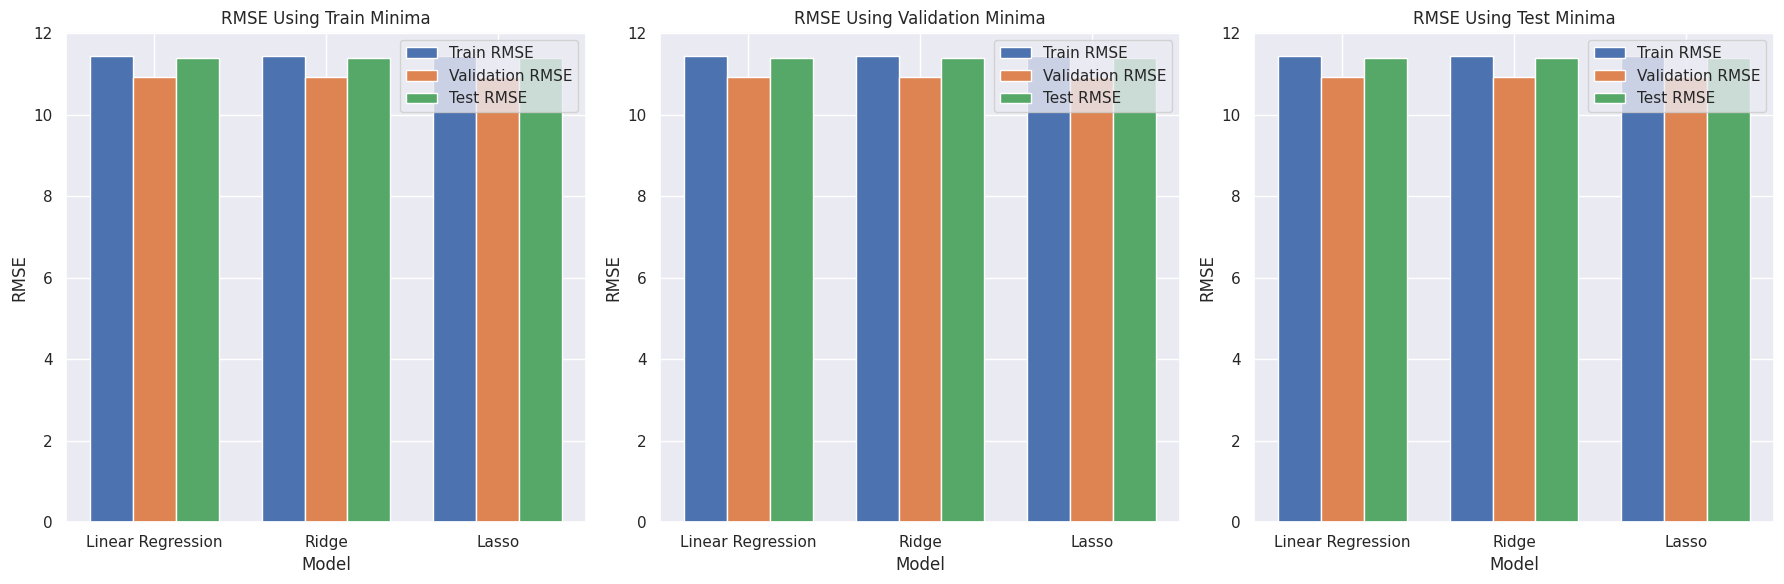


--- Summary of Errors at Minima ---


Model         Minimizing Lambda  Train RMSE  Validation RMSE  \
0  Linear Regression                N/A    N/A    11.45289        10.918281   
1              Ridge       Train Minima  0.001    11.45289        10.918281   
2              Ridge  Validation Minima  0.001    11.45289        10.918281   
3              Ridge        Test Minima  0.001    11.45289        10.918281   
4              Lasso       Train Minima  0.001    11.45289        10.918328   
5              Lasso  Validation Minima  0.001    11.45289        10.918328   
6              Lasso        Test Minima  0.001    11.45289        10.918328   

   Test RMSE  
0  11.407063  
1  11.407063  
2  11.407063  
3  11.407063  
4  11.407124  
5  11.407124  
6  11.407124

In [28]:
summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


Ahora tratemos de mejorar nuestro modelo solo utilizando/creando variables polinomiales de nuestras X's y veamos si mejora.

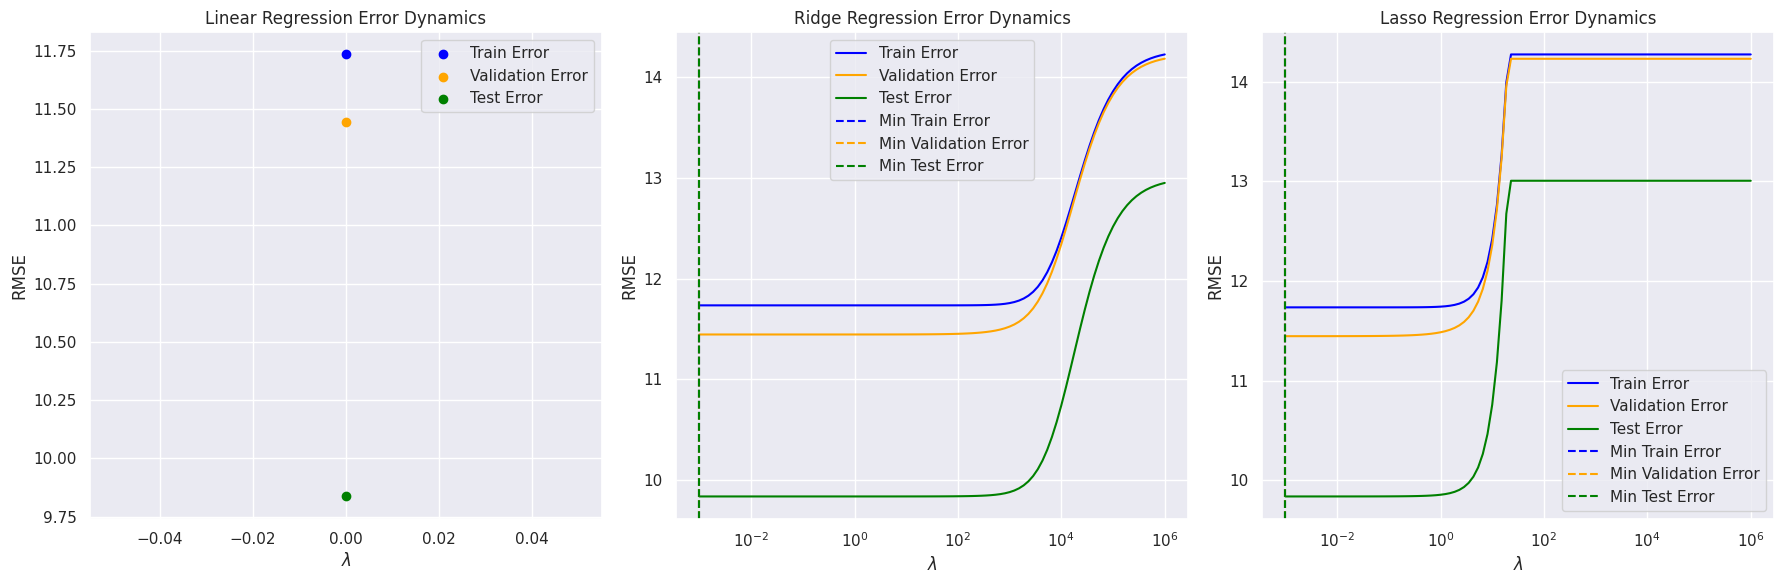

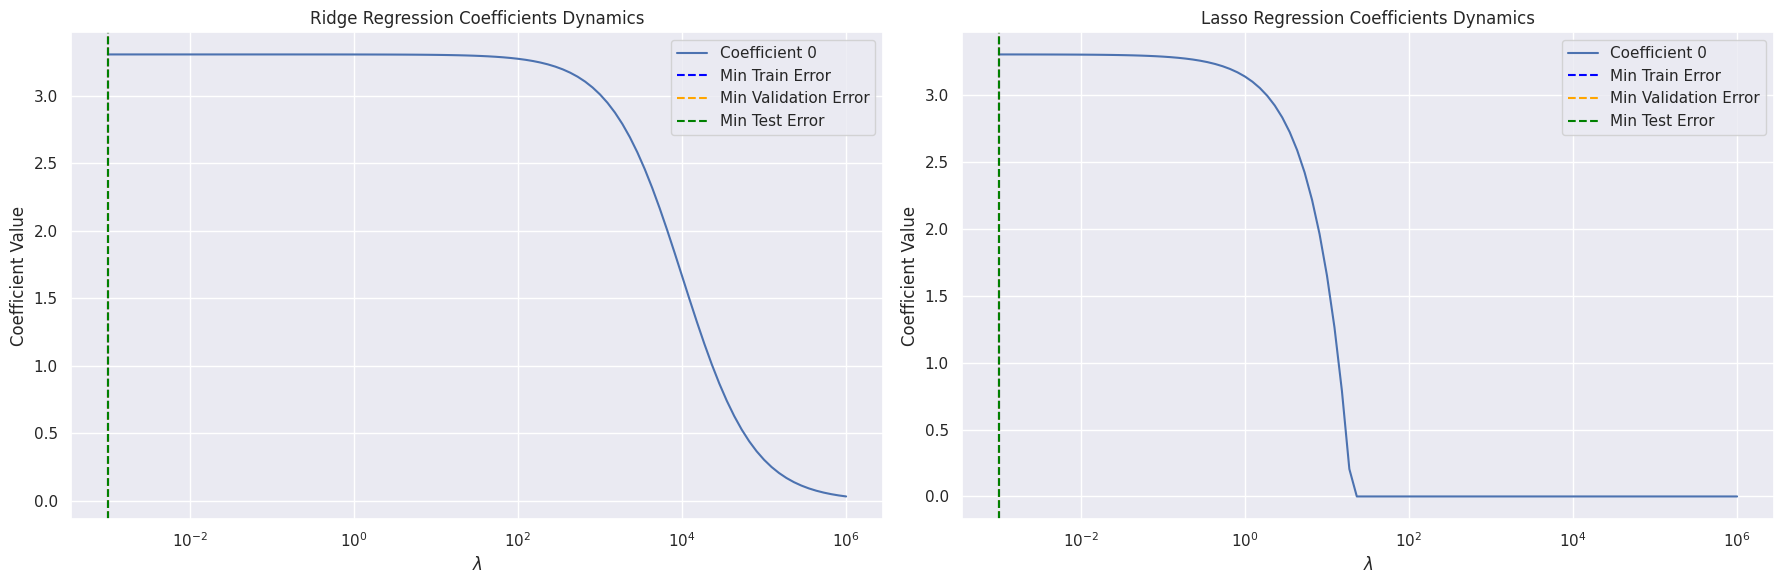

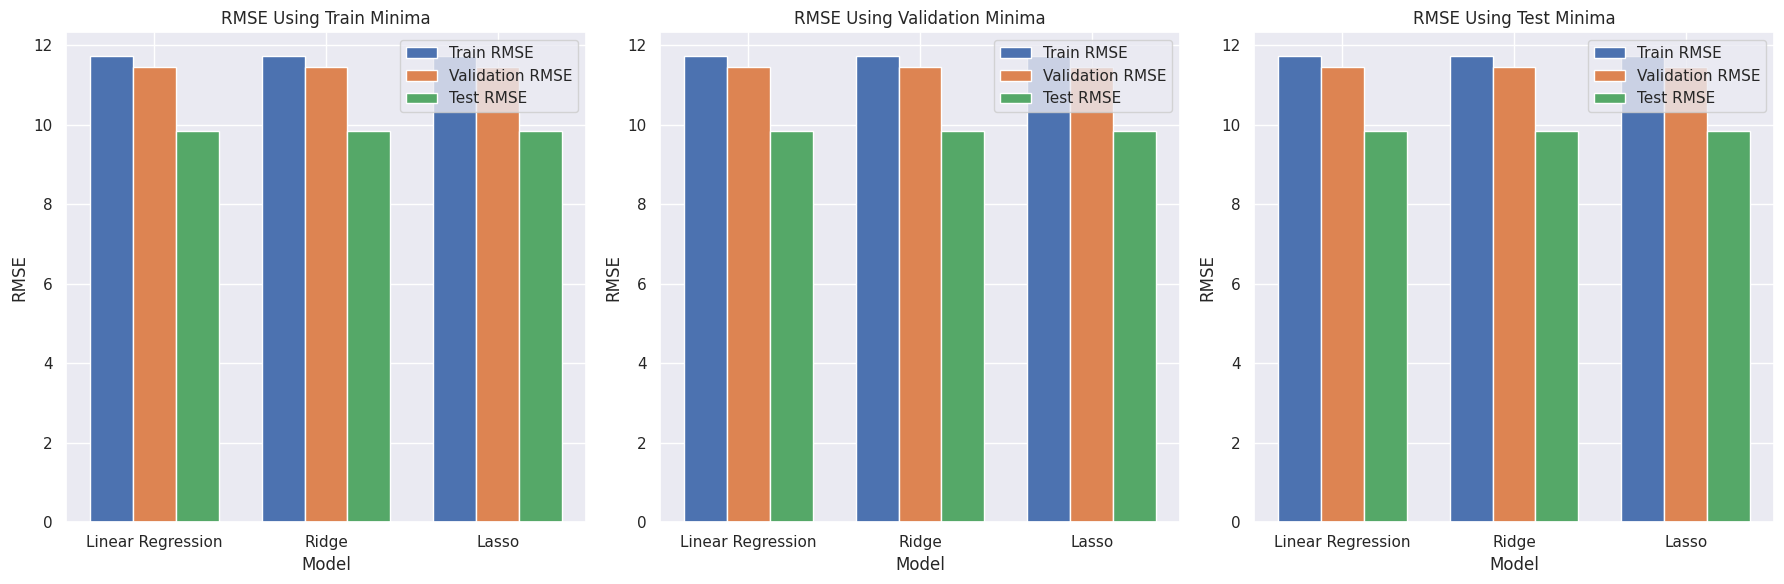


--- Summary of Errors at Minima ---


Model         Minimizing Lambda  Train RMSE  Validation RMSE  \
0  Linear Regression                N/A    N/A   11.734463        11.445184   
1              Ridge       Train Minima  0.001   11.734463        11.445185   
2              Ridge  Validation Minima  0.001   11.734463        11.445185   
3              Ridge        Test Minima  0.001   11.734463        11.445185   
4              Lasso       Train Minima  0.001   11.734463        11.445217   
5              Lasso  Validation Minima  0.001   11.734463        11.445217   
6              Lasso        Test Minima  0.001   11.734463        11.445217   

   Test RMSE  
0   9.836476  
1   9.836476  
2   9.836476  
3   9.836476  
4   9.836484  
5   9.836484  
6   9.836484

In [29]:
X2 = X.copy()

#Ingenieria de Variables
power = [1 + n for n in range(1,5)]
for p in power:
    X2 = np.concatenate((X2,np.power(X2[:,0],p).reshape((N,1))), axis=1)
# for p in power:
#     X2 = np.concatenate((X2,np.power(X2[:,0],-p).reshape((N,1))), axis=1)
summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


# Nuevos Fenomenos

### Example 1: Multicollinearity

Multicollinearity occurs when predictor variables are highly correlated with each other, which can make the model's coefficients unstable. In this example, `x_2` and `x_3` are linear combinations of `x_1`.

$$
\begin{align*}
x_2 &= 0.9x_1 + \text{noise} \\
x_3 &= 0.8x_1 + \text{noise} \\
y &= x_1 - 3x_2 + 4x_3 + \epsilon
\end{align*}
$$


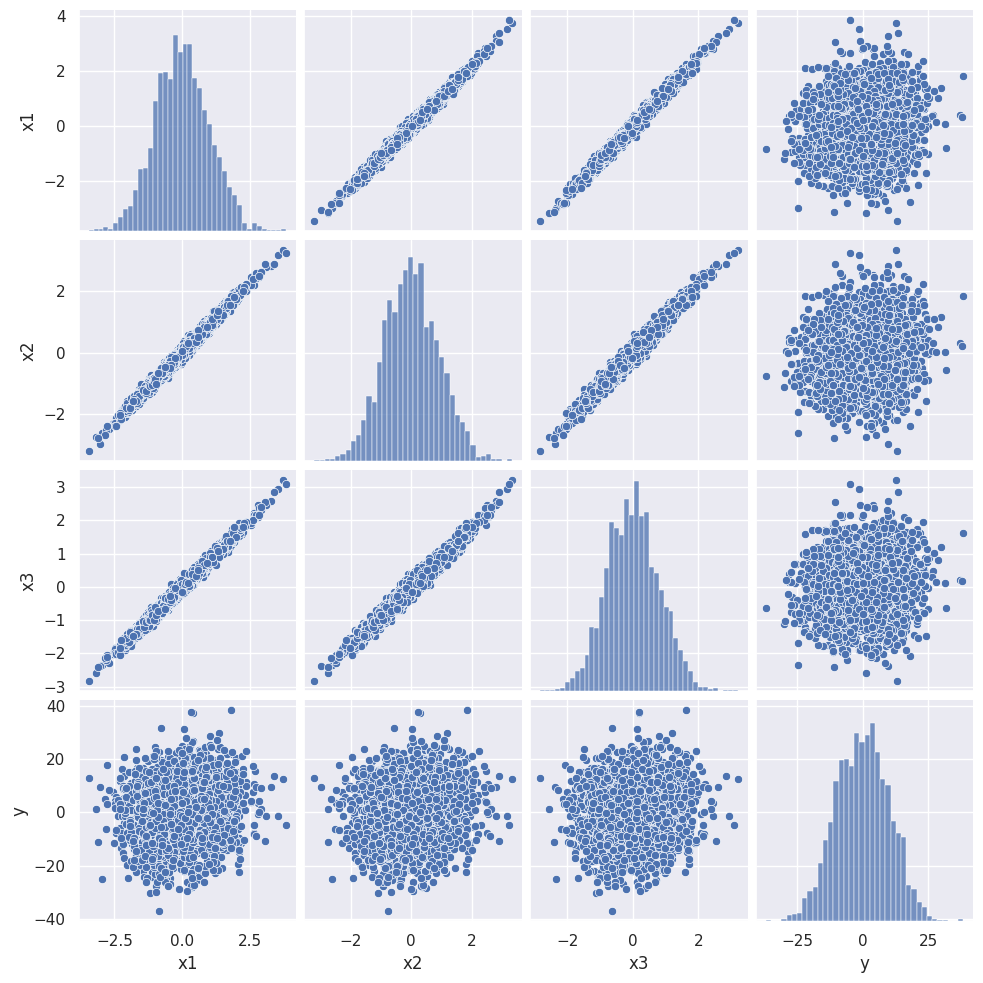

In [30]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 3000

# Matriz de Diseño con alta multicolinealidad
X = np.random.normal(size=(N,3))
X[:,1] = X[:,0] * 0.9 + np.random.normal(0, 0.1, size=N)  # X2 is highly correlated with X1
X[:,2] = X[:,0] * 0.8 + np.random.normal(0, 0.1, size=N)  # X3 is highly correlated with X1

eps = np.random.normal(0,10, size=(N,1))

# Simulacion de Y
Y = np.matmul(X,np.array([1,-3,4])).reshape((N,1)) + eps
Y = Y.reshape(-1)

df = pd.DataFrame(data=X, columns=['x1','x2','x3'])
df['y'] = Y
sns.pairplot(df)


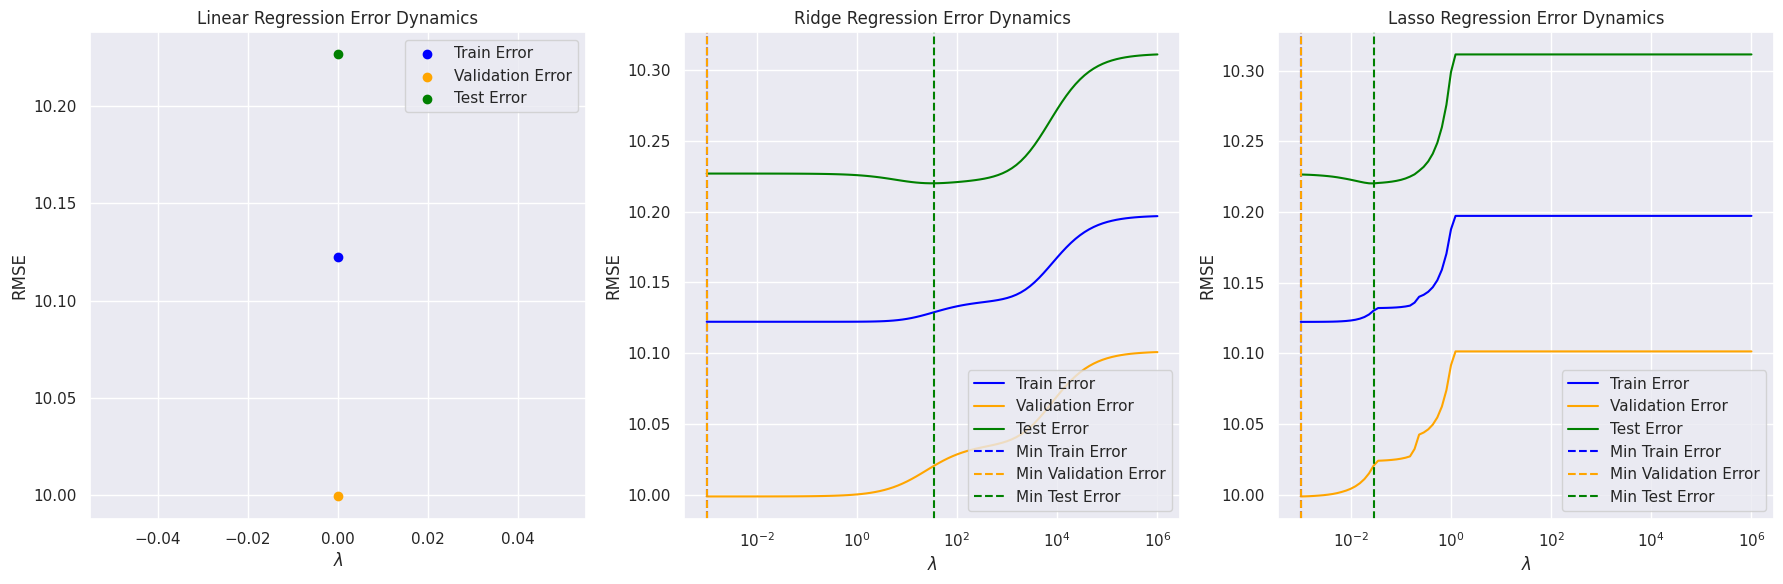

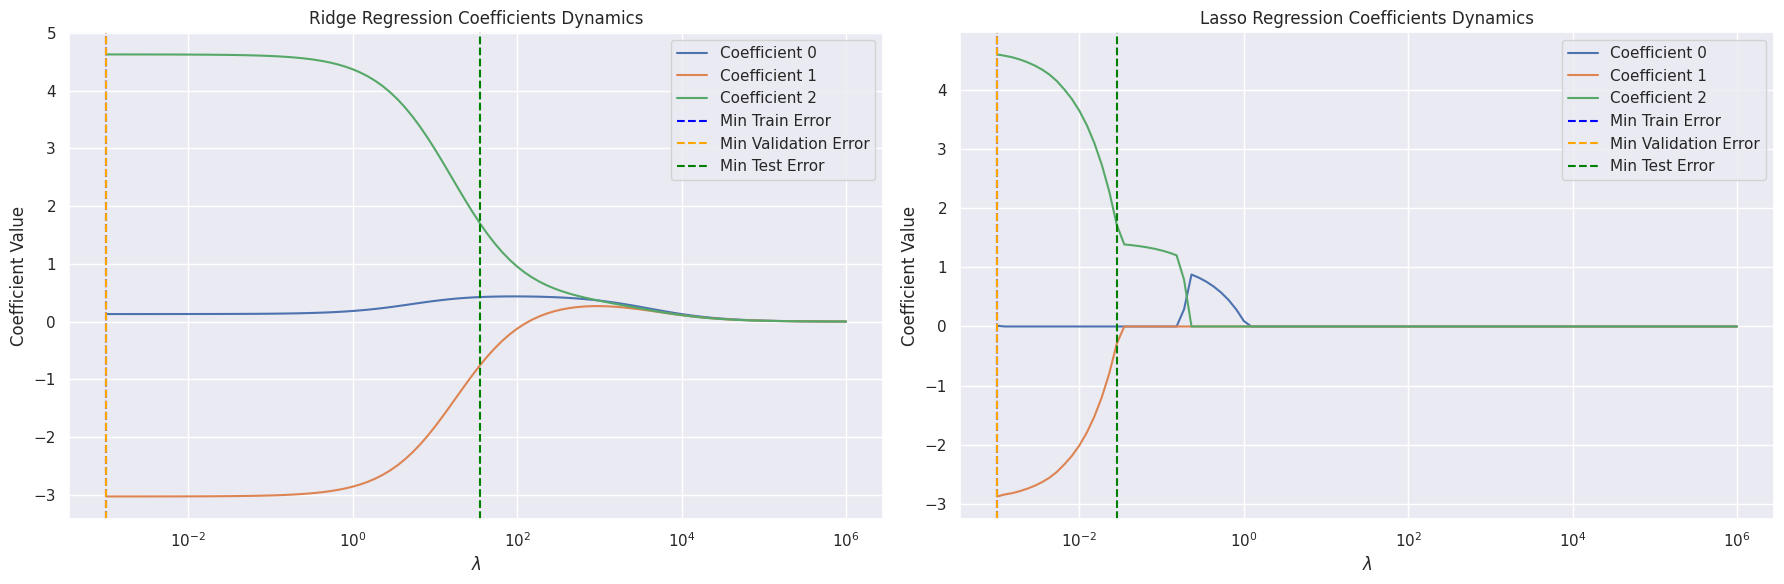

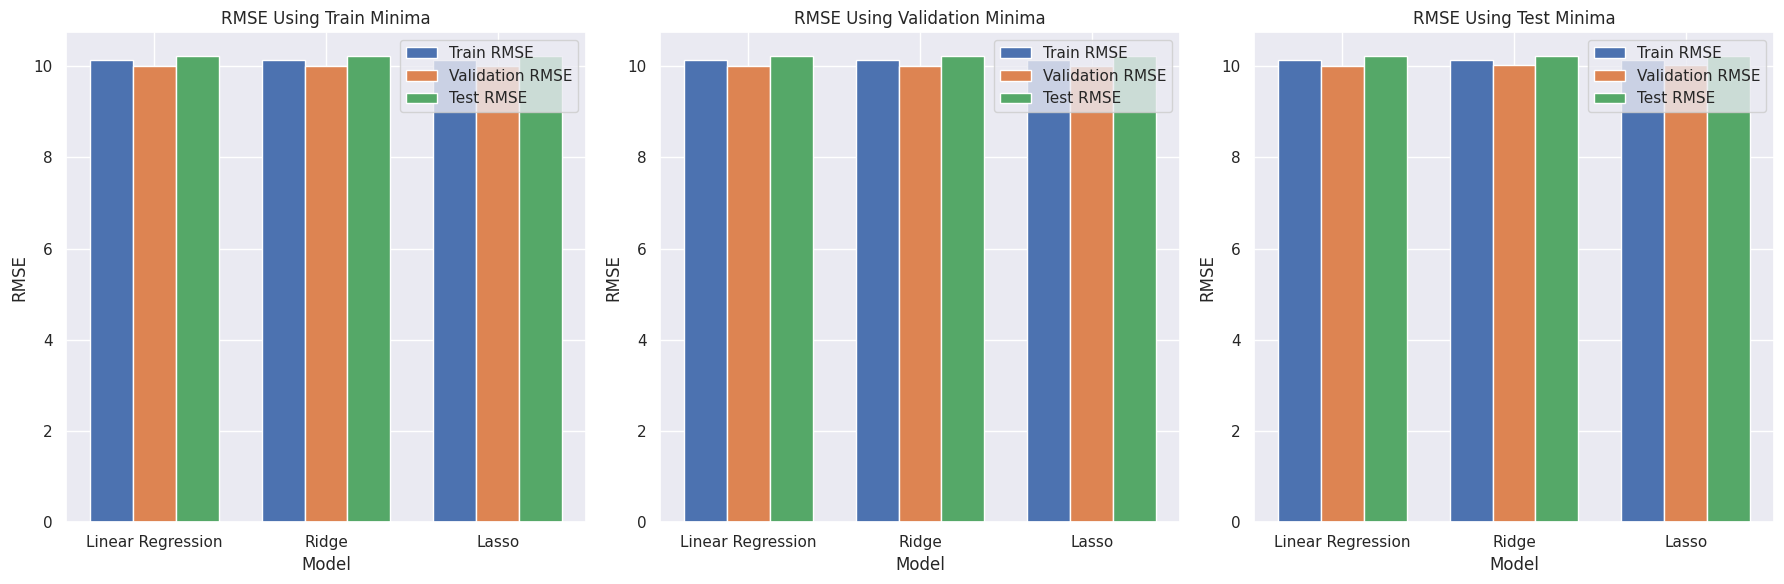


--- Summary of Errors at Minima ---


Model         Minimizing     Lambda  Train RMSE  \
0  Linear Regression                N/A        N/A   10.122272   
1              Ridge       Train Minima      0.001   10.122272   
2              Ridge  Validation Minima      0.001   10.122272   
3              Ridge        Test Minima  35.111917   10.129062   
4              Lasso       Train Minima      0.001   10.122284   
5              Lasso  Validation Minima      0.001   10.122284   
6              Lasso        Test Minima    0.02848   10.130224   

   Validation RMSE  Test RMSE  
0         9.999114  10.226764  
1         9.999115  10.226763  
2         9.999115  10.226763  
3        10.020860  10.219911  
4         9.998859  10.226501  
5         9.998859  10.226501  
6        10.020607  10.220186

In [31]:
summary_df = plot_error_dynamics(X, Y, print_coefficients=False)

### Example 2: High-Dimensionality with Redundant Features

In high-dimensional datasets, where the number of features is much larger than the number of observations, regularization can help identify and focus on the truly informative features.

$$
\begin{align*}
y &= 1 \cdot x_5 - 2 \cdot x_{10} + 3 \cdot x_{15} + \epsilon \\
\text{where } & x_1, x_2, \dots, x_4, x_6, \dots, x_9, x_{11}, \dots, x_{14}, x_{16}, \dots, x_{100} \text{ are irrelevant features.}
\end{align*}
$$


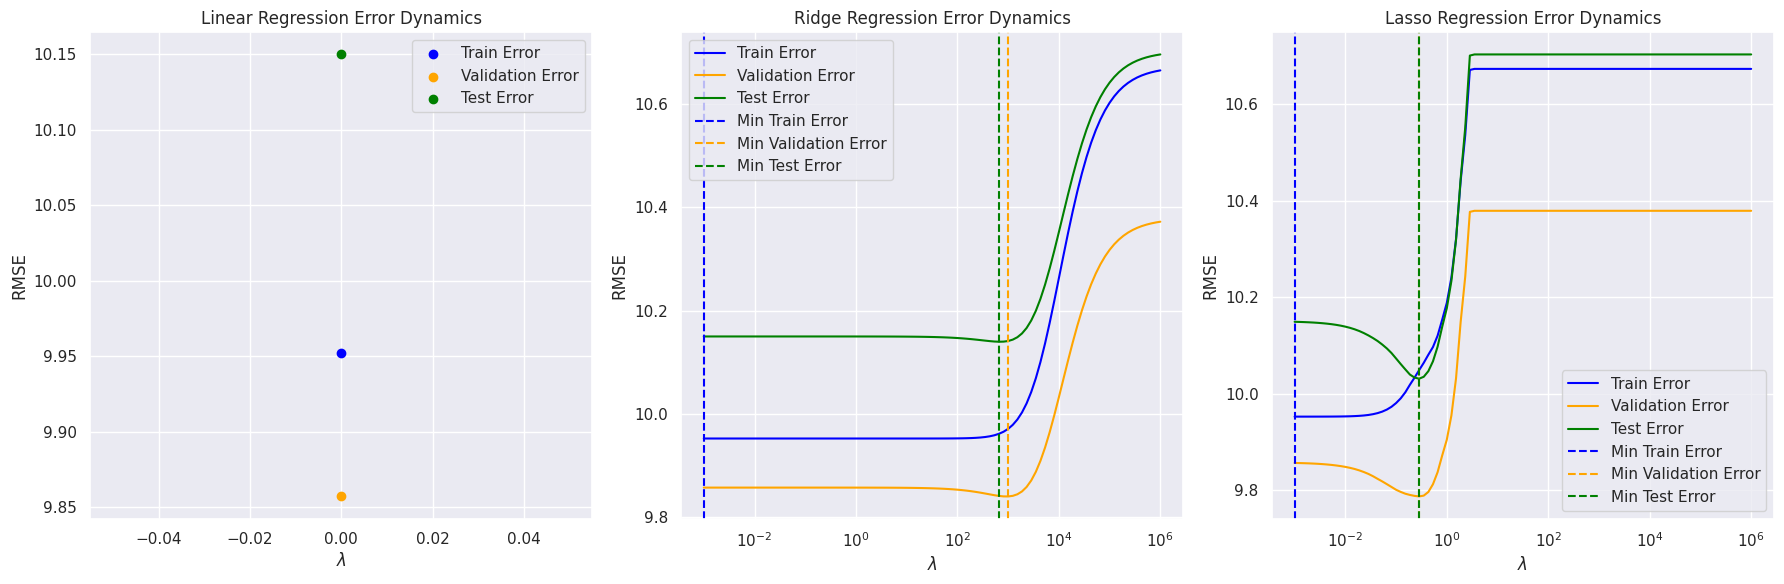

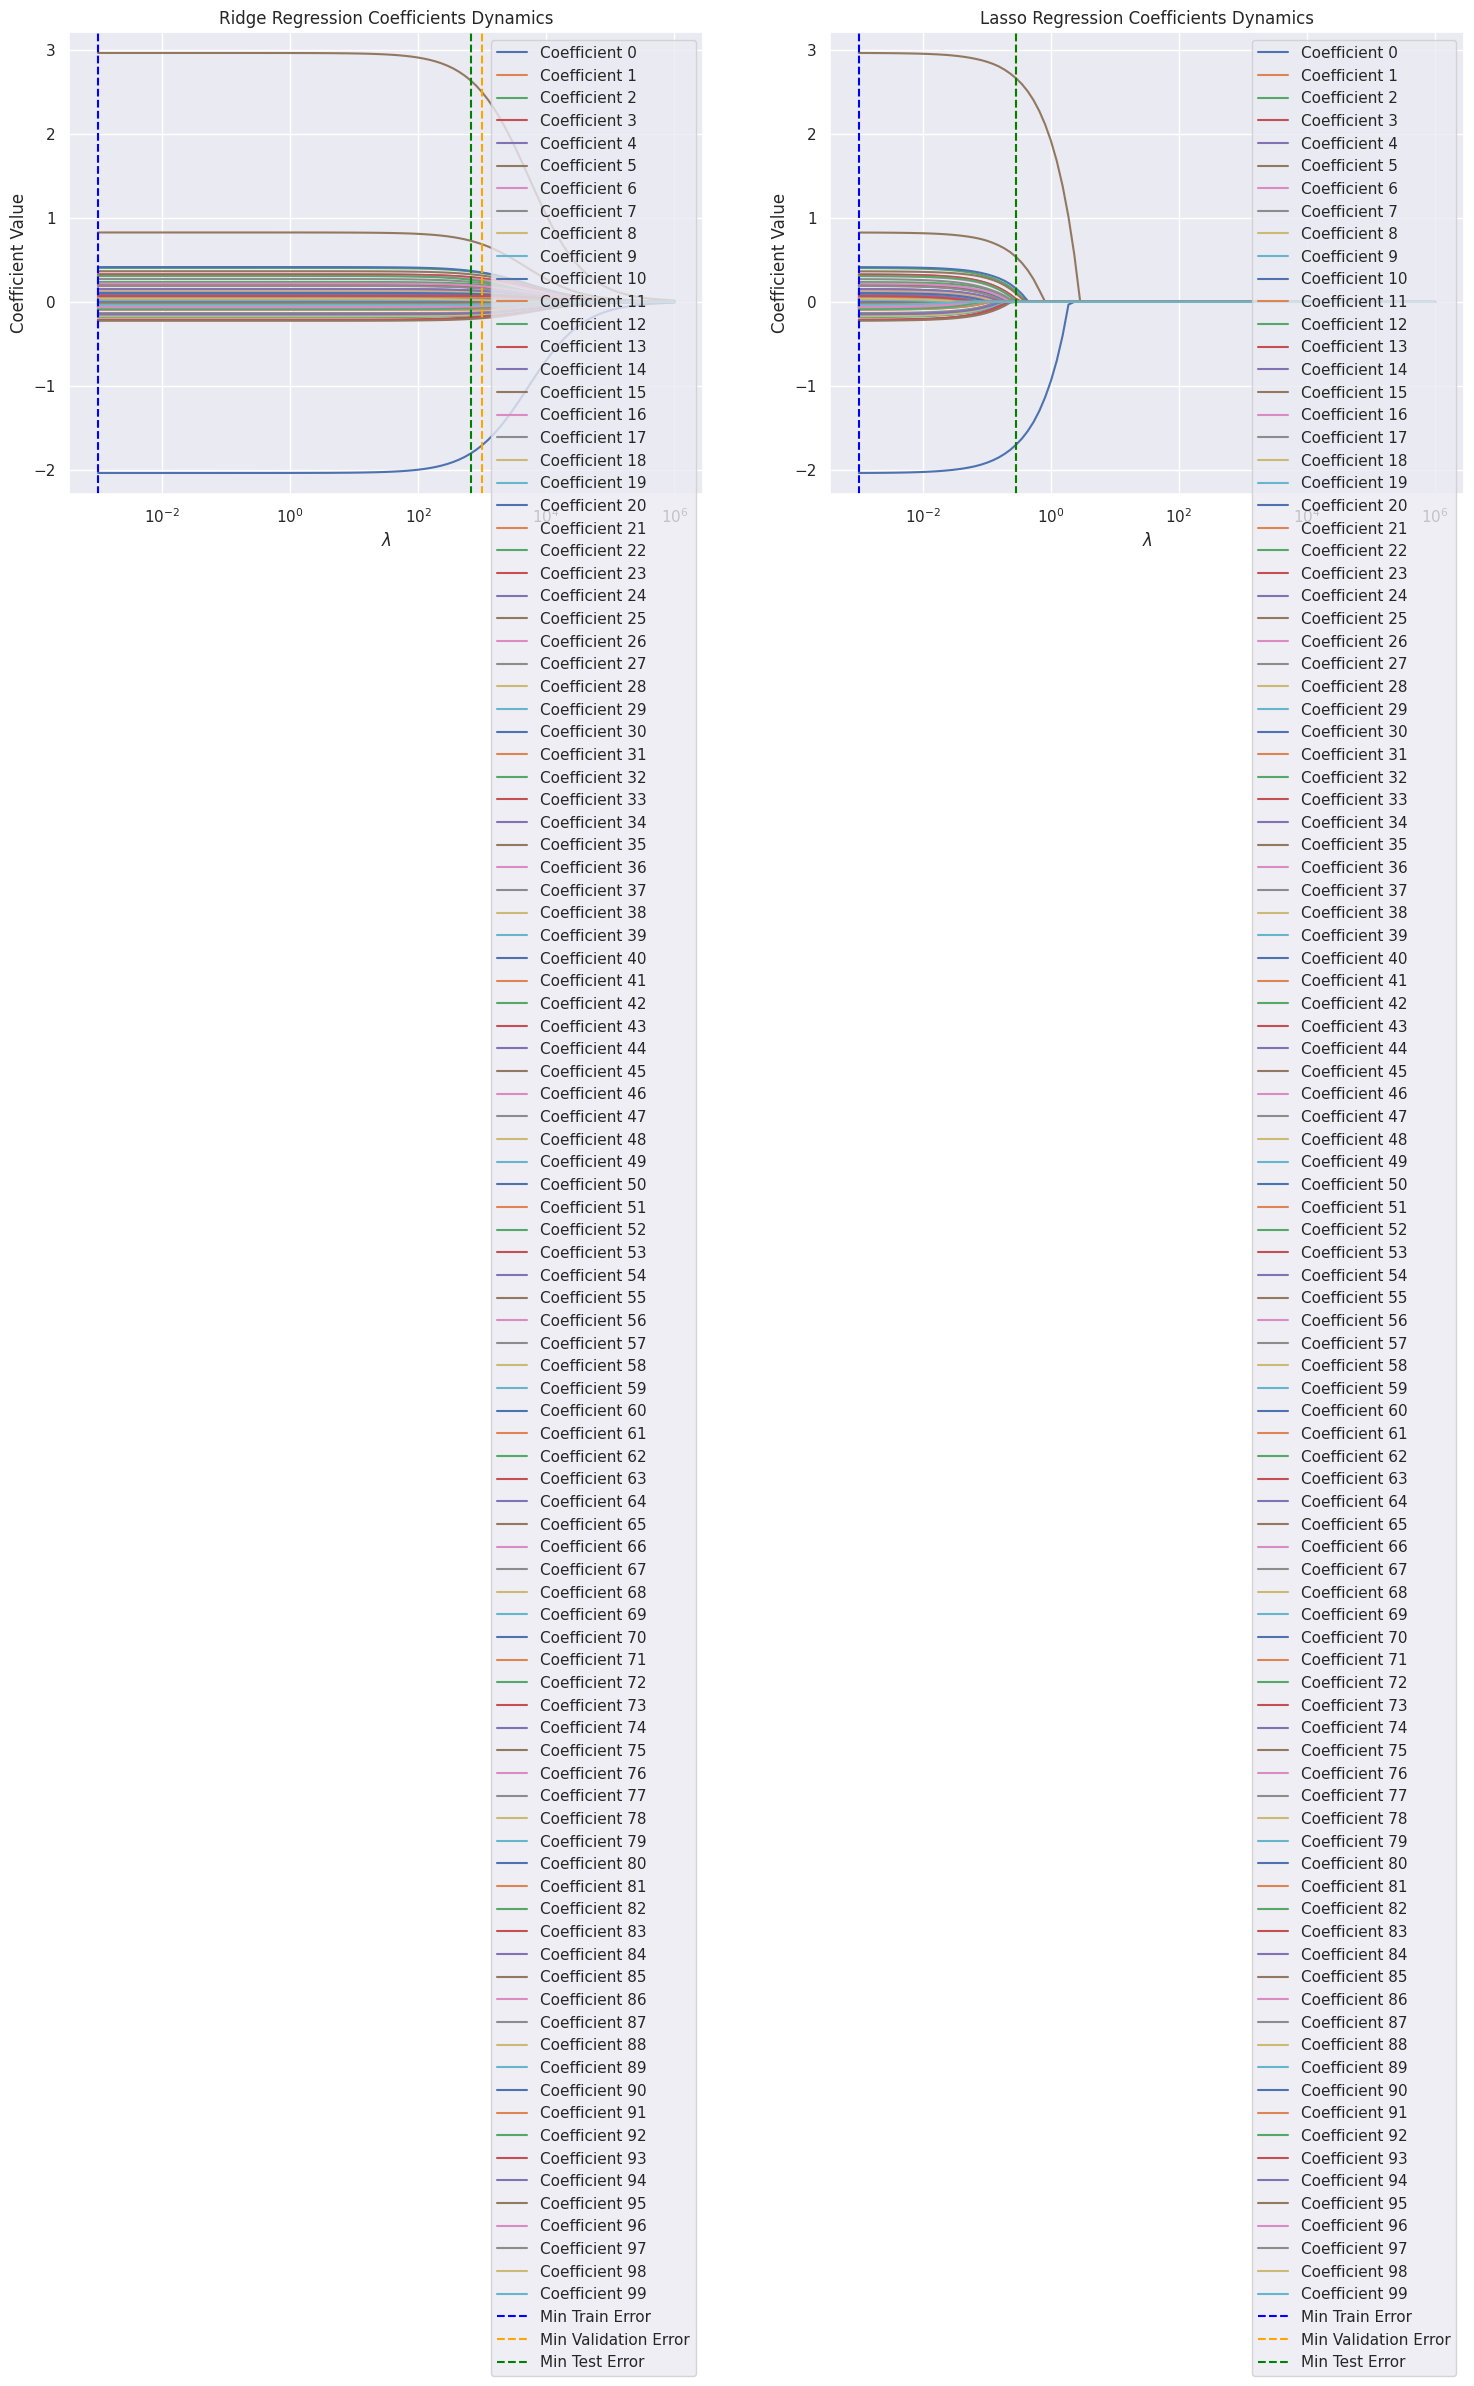

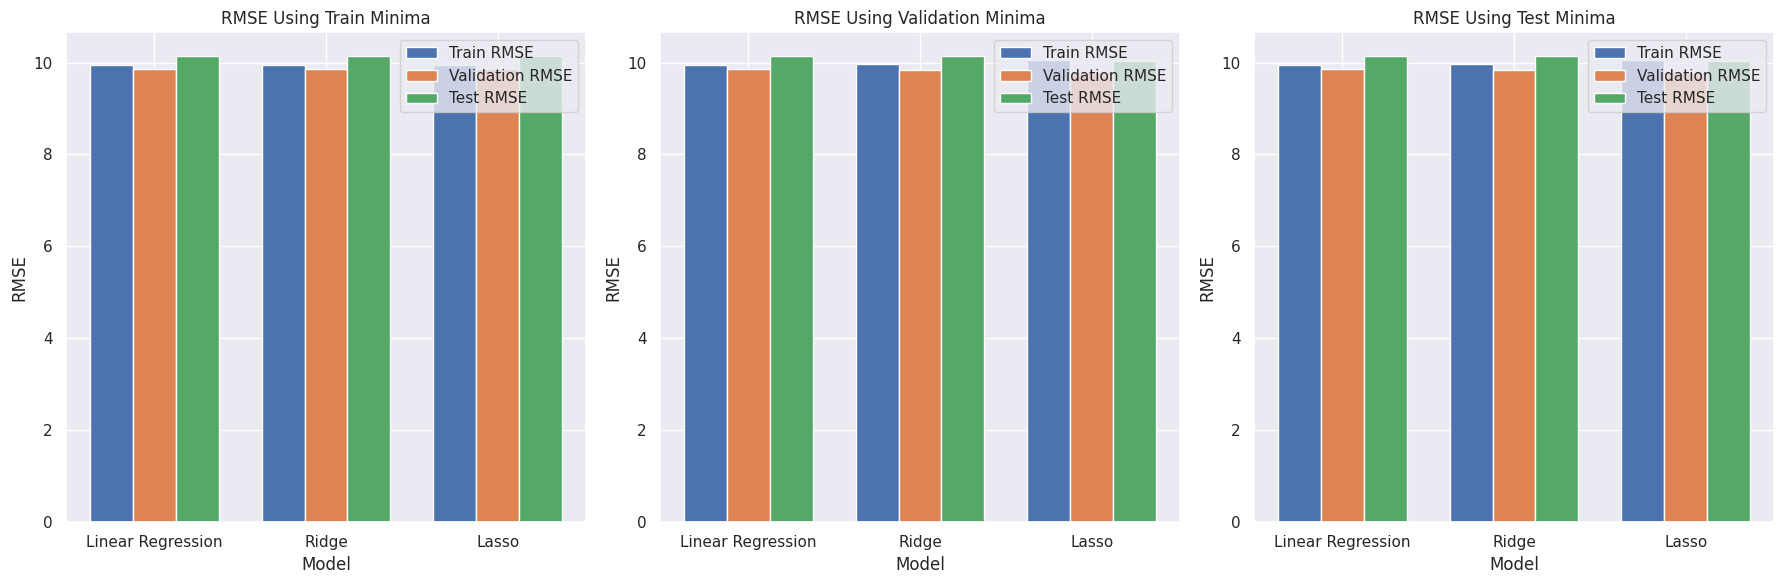


--- Summary of Errors at Minima ---


Model         Minimizing      Lambda  Train RMSE  \
0  Linear Regression                N/A         N/A    9.952180   
1              Ridge       Train Minima       0.001    9.952180   
2              Ridge  Validation Minima      1000.0    9.970916   
3              Ridge        Test Minima  657.933225    9.961272   
4              Lasso       Train Minima       0.001    9.952185   
5              Lasso  Validation Minima    0.284804   10.048520   
6              Lasso        Test Minima    0.284804   10.048520   

   Validation RMSE  Test RMSE  
0         9.857084  10.149849  
1         9.857084  10.149849  
2         9.839943  10.141059  
3         9.840981  10.139644  
4         9.856185  10.148698  
5         9.786793  10.030786  
6         9.786793  10.030786

In [32]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000
p = 100  # 100 features

# Matriz de Diseño de alta dimensionalidad
X = np.random.normal(size=(N,p))

# Solo unas pocas características son informativas
informative_features = np.array([5, 10, 15])
Y = np.matmul(X[:,informative_features], np.array([1, -2, 3])).reshape((N,1)) + np.random.normal(0,10, size=(N,1))
Y = Y.reshape(-1)

summary_df = plot_error_dynamics(X, Y, print_coefficients=False)


### Example 3: Overfitting with Polynomial Features

Overfitting occurs when a model becomes too complex, capturing noise instead of the underlying pattern. Regularization can prevent this by penalizing large coefficients.

$$
y = 2x^2 - 3x + 1 + \epsilon
$$


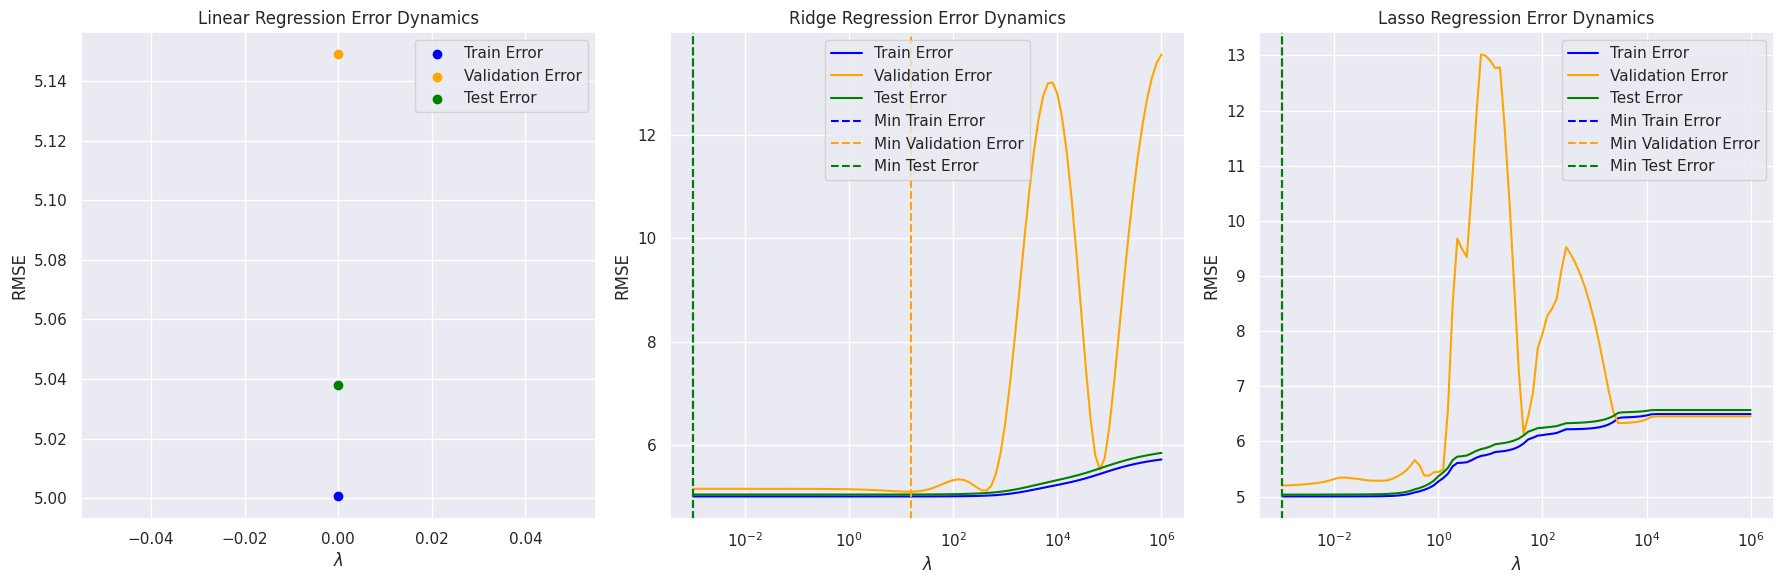

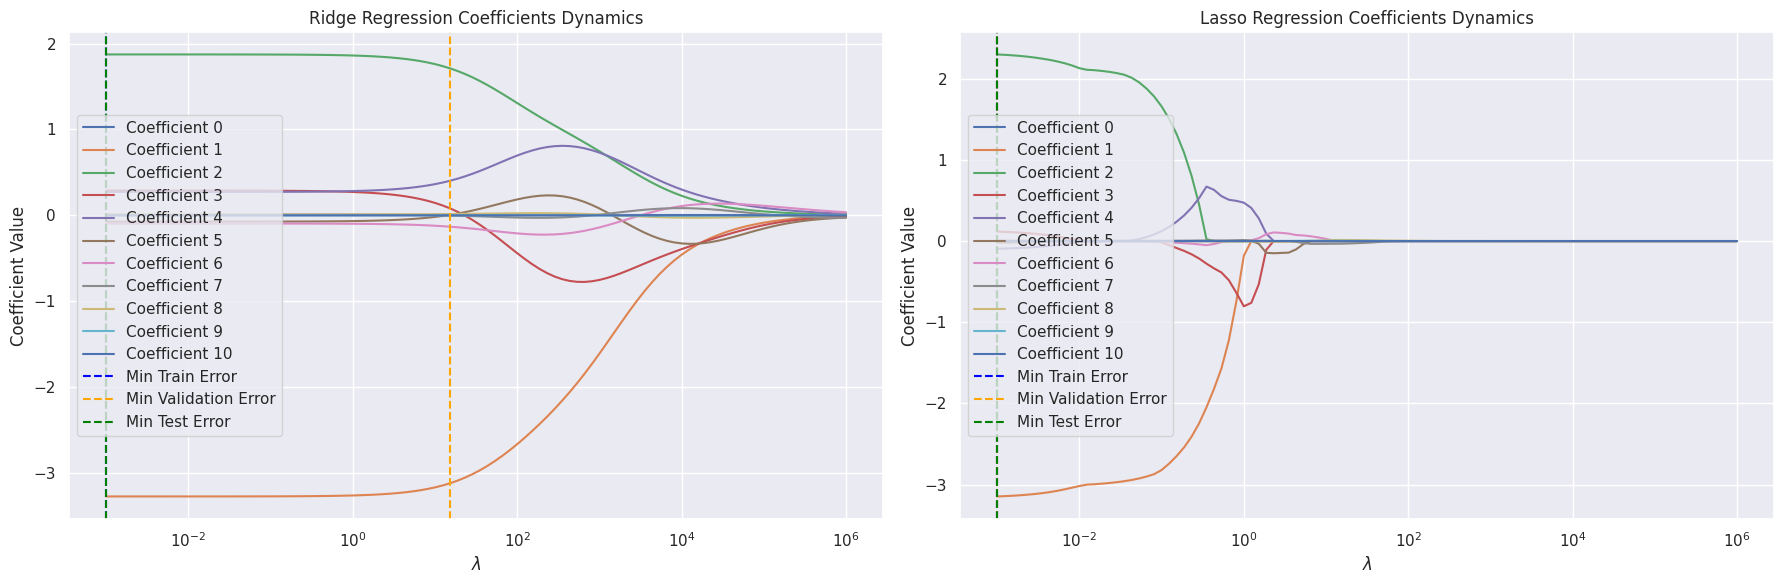

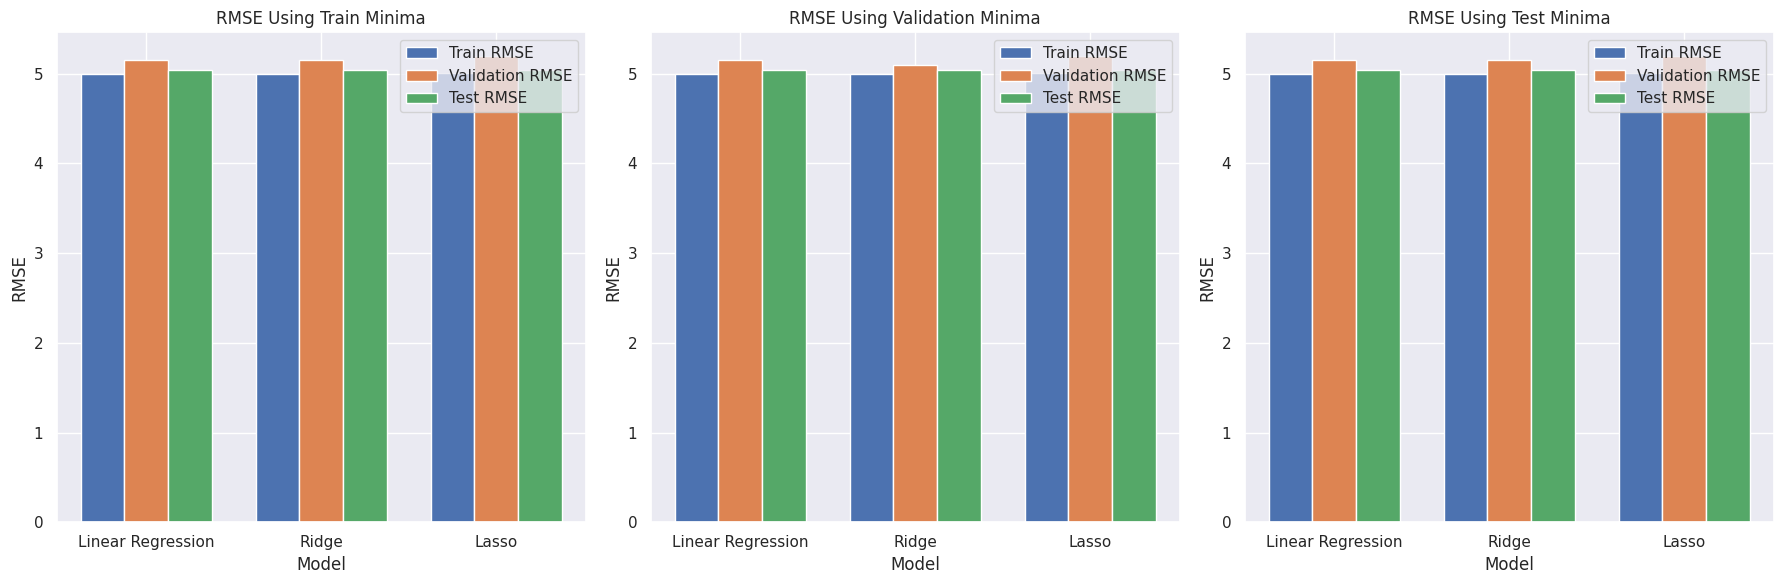


--- Summary of Errors at Minima ---


Model         Minimizing     Lambda  Train RMSE  \
0  Linear Regression                N/A        N/A    5.000563   
1              Ridge       Train Minima      0.001    5.000563   
2              Ridge  Validation Minima  15.199111    5.000757   
3              Ridge        Test Minima      0.001    5.000563   
4              Lasso       Train Minima      0.001    5.001646   
5              Lasso  Validation Minima      0.001    5.001646   
6              Lasso        Test Minima      0.001    5.001646   

   Validation RMSE  Test RMSE  
0         5.148907   5.037892  
1         5.148898   5.037893  
2         5.093100   5.038841  
3         5.148898   5.037893  
4         5.199845   5.034729  
5         5.199845   5.034729  
6         5.199845   5.034729

In [33]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 10000

# Matriz de Diseño
X = np.random.normal(size=(N,1))
eps = np.random.normal(0,5, size=(N,1))

# Simulacion de Y con un modelo lineal simple
Y = 2*X**2 - 3*X + 1 + eps
Y = Y.reshape(-1)

# Crear polinomios de alto grado para inducir sobreajuste
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

summary_df = plot_error_dynamics(X_poly, Y, print_coefficients=False)


### Example 4: Noisy Data with Irrelevant Features

In the presence of noisy data and irrelevant features, regularization helps by shrinking the coefficients of irrelevant features towards zero.

$$
y = 3x_2 - 2x_6 + 4x_{11} + \epsilon
$$


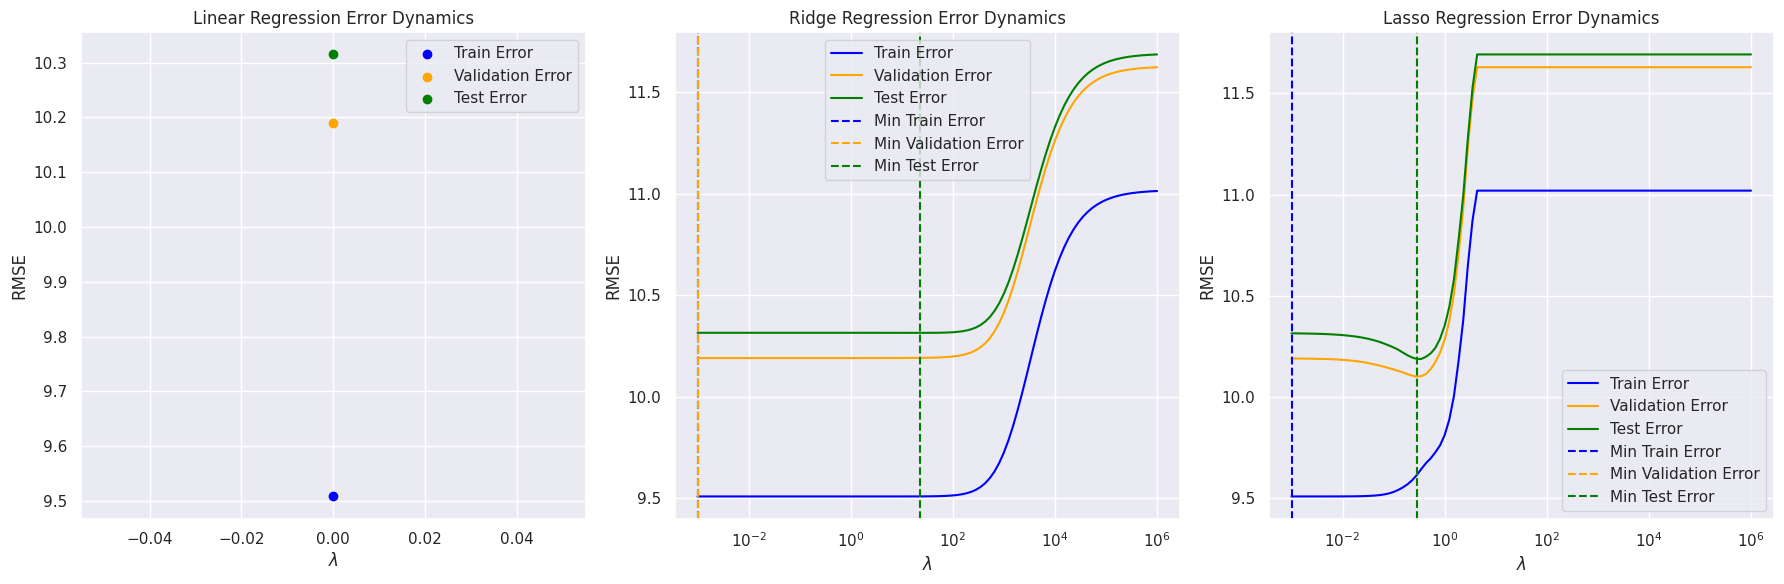

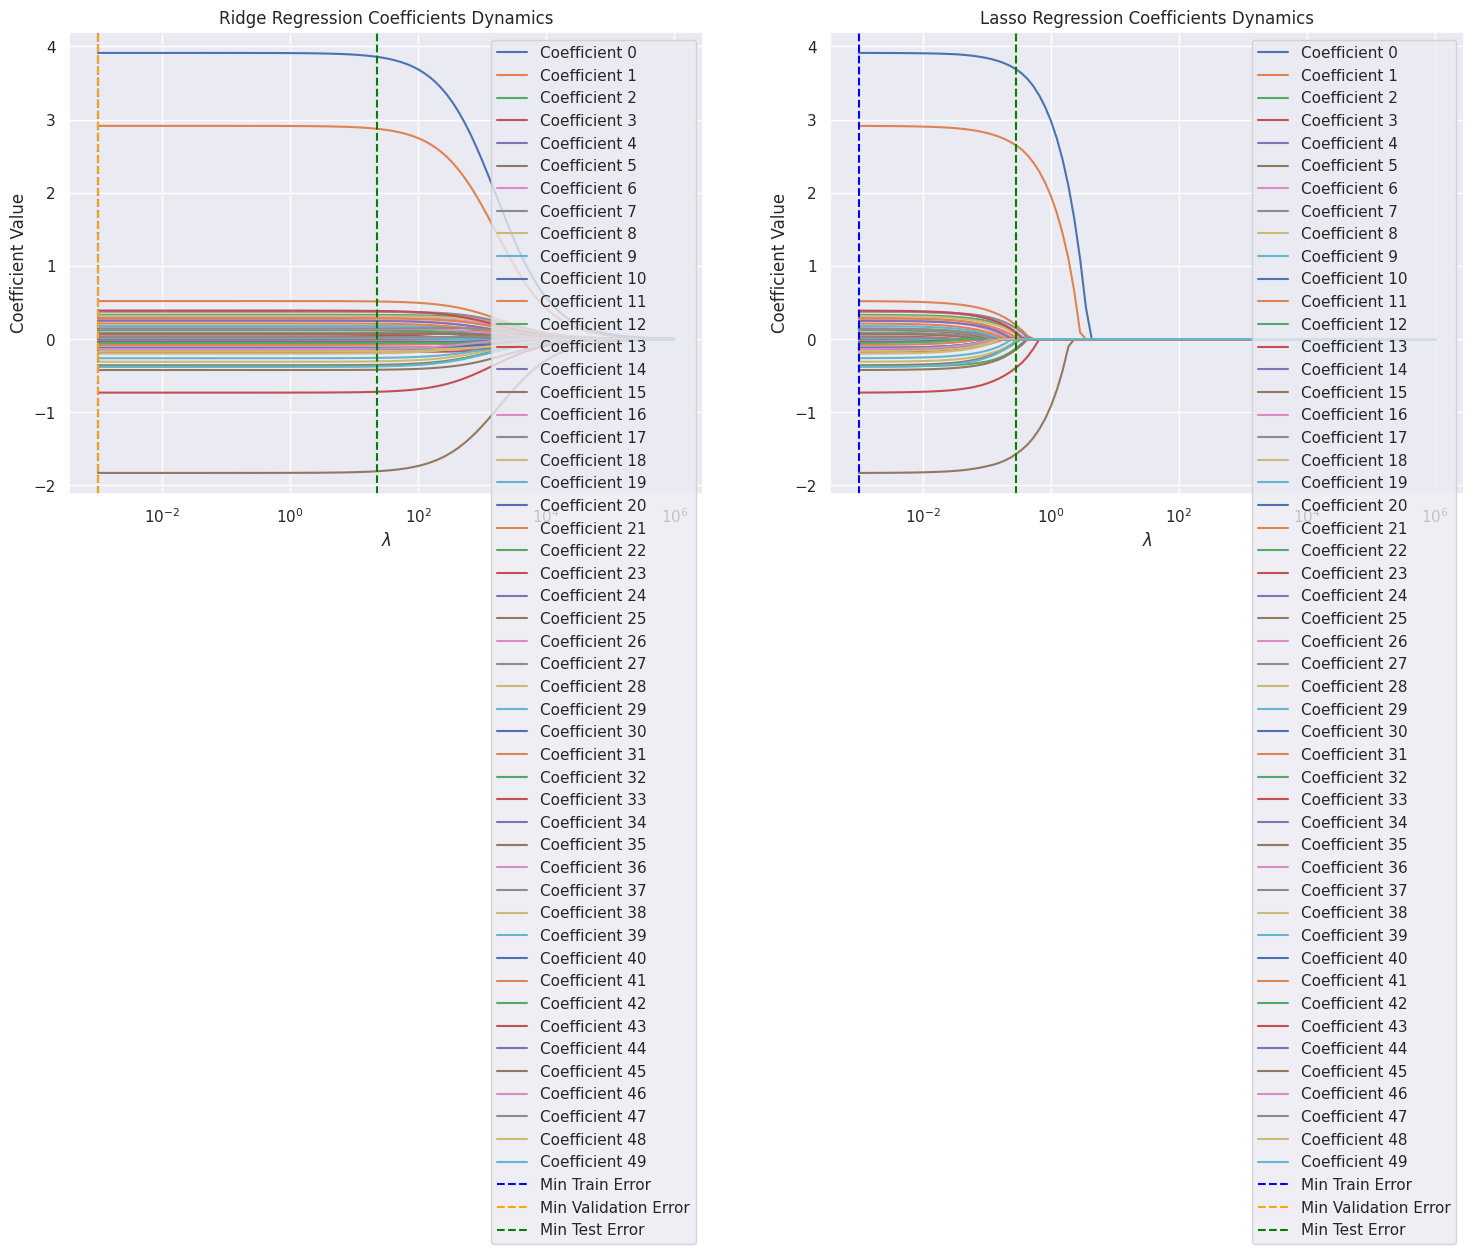

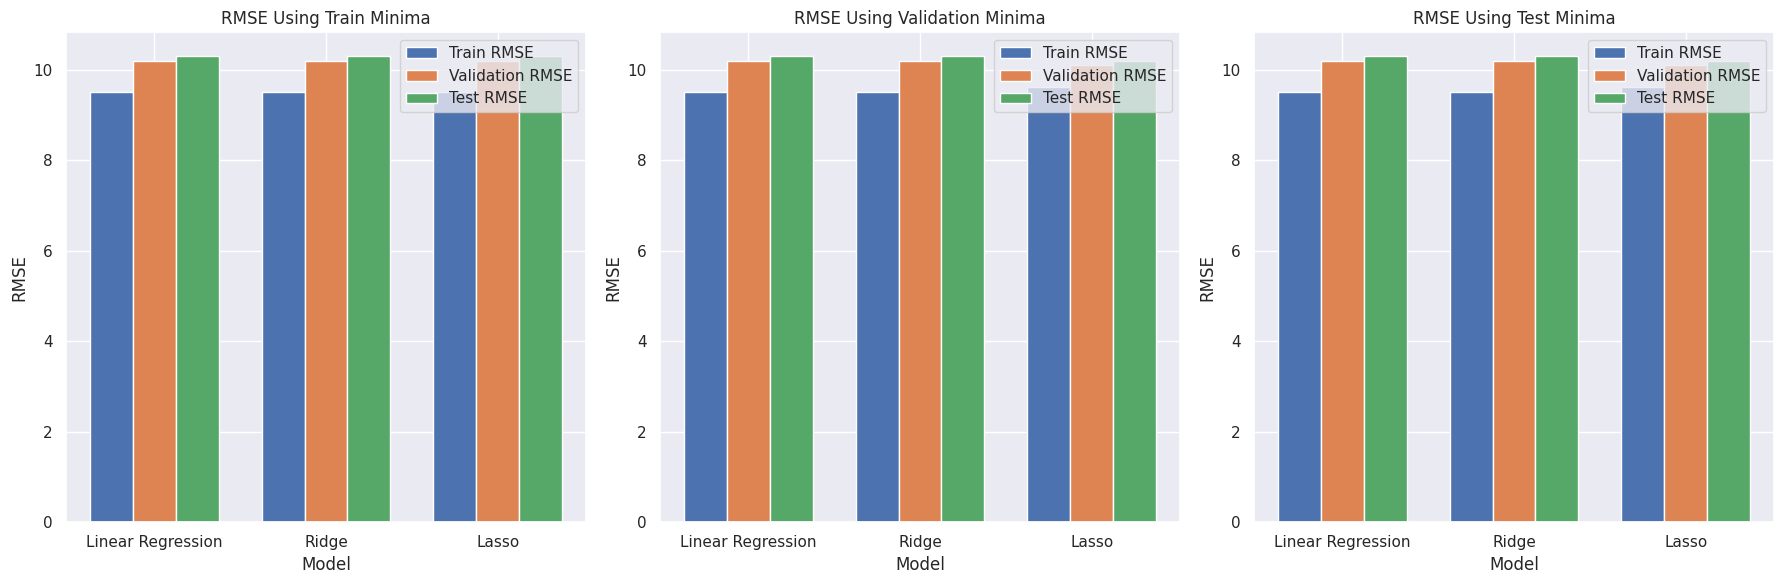


--- Summary of Errors at Minima ---


Model         Minimizing     Lambda  Train RMSE  \
0  Linear Regression                N/A        N/A    9.508173   
1              Ridge       Train Minima      0.001    9.508173   
2              Ridge  Validation Minima      0.001    9.508173   
3              Ridge        Test Minima  23.101297    9.508467   
4              Lasso       Train Minima      0.001    9.508176   
5              Lasso  Validation Minima   0.284804    9.614175   
6              Lasso        Test Minima   0.284804    9.614175   

   Validation RMSE  Test RMSE  
0        10.190552  10.315094  
1        10.190552  10.315094  
2        10.190552  10.315094  
3        10.191483  10.314851  
4        10.189825  10.314090  
5        10.100035  10.187391  
6        10.100035  10.187391

In [34]:
# Semilla para replicacion de resultados
np.random.seed(589)
N = 3000
p = 50  # 50 features

# Matriz de Diseño con muchas características irrelevantes
X = np.random.normal(size=(N,p))

# Solo 3 características son relevantes
Y = 3*X[:,1] - 2*X[:,5] + 4*X[:,10] + np.random.normal(0,10, size=N)  # Corrected noise addition
Y = Y.reshape(-1)  # This should now correctly shape Y to (10000,)

summary_df = plot_error_dynamics(X, Y, print_coefficients=False)

